In [13]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter


In [18]:
#!conda install --yes --prefix {sys.prefix} tqdm

In [2]:
import importlib
import local_constants as lc
importlib.reload(lc)

<module 'local_constants' from 'd:\\documents\\ai\\visual_ai\\labelsmoothing\\local_constants.py'>

# Download data, define model architecture

In [39]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# # MNIST Test dataset and dataloader declaration
# test_loader = torch.utils.data.DataLoader(
#     datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
#             transforms.ToTensor(),
#             ])),
#         batch_size=1, shuffle=True)

# # Define what device we are using
# print("CUDA Available: ",torch.cuda.is_available())
# device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

# # Initialize the network
model = Net().to(device)

# Then I moved MNIST to the directory I am using for visual data

# Now, look at first training a model on mnist since I don't want to download

In [40]:
optimizer_ft = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=4, gamma=0.05)
criterion = nn.CrossEntropyLoss()

# apparently you need to specify the directory where the MNIST folder sits, not the actual path to files

In [39]:
mdir = os.path.split(lc.MNIST_dir)[0]

In [40]:
mdir

'D:\\Documents\\AI\\Visual_AI\\Data\\MNIST'

In [32]:
MNIST_train = datasets.MNIST(lc.data_dir, train=True, download=False, transform=transforms.Compose([transforms.ToTensor(),]))

In [33]:
MNIST_test = datasets.MNIST(lc.data_dir, train=False, download=False, transform=transforms.Compose([transforms.ToTensor(),]))

In [34]:
train_loader = torch.utils.data.DataLoader(MNIST_train, shuffle=True, batch_size=24)

In [35]:
test_loader = torch.utils.data.DataLoader(MNIST_test, shuffle=True, batch_size=24)

In [41]:
def train(model, loader, n_epochs, optimizer, criterion=None, scheduler=None, device=None, metrics=None):
    """
    Worry about metrics later...
    """
    
    if not device:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        
    if not criterion:
        criterion = nn.CrossEntropyLoss()
    
    model.train()

    for epoch in tqdm(range(n_epochs)):
        running_loss = 0.
        running_acc = 0.

        for i, data in enumerate(loader):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_acc += torch.sum(labels == preds)
            running_loss += loss.item() * inputs.size(0)
            
#         scheduler.step()
        epoch_loss = running_loss / len(loader.dataset)
        epoch_acc = running_acc / len(loader.dataset)
        print(f"<< loss on {epoch}th epoch: {epoch_loss} >>\n<< accuracy on {epoch}th epoch: {epoch_acc}")
        
    return model
            
            
            
            
            
            
            
            

In [43]:
trained_model = train(model, train_loader, 50, optimizer_ft, criterion)

  2%|██▍                                                                                                                      | 1/50 [00:10<08:37, 10.57s/it]

<< loss on 0th epoch: 0.2500171485386789 >>
<< accuracy on 0th epoch: 0.9264833331108093


  4%|████▊                                                                                                                    | 2/50 [00:20<08:15, 10.33s/it]

<< loss on 1th epoch: 0.23268458991348742 >>
<< accuracy on 1th epoch: 0.9317499995231628


  6%|███████▎                                                                                                                 | 3/50 [00:30<07:56, 10.14s/it]

<< loss on 2th epoch: 0.21664458055701108 >>
<< accuracy on 2th epoch: 0.9353333711624146


  8%|█████████▋                                                                                                               | 4/50 [00:39<07:39, 10.00s/it]

<< loss on 3th epoch: 0.20596114575378596 >>
<< accuracy on 3th epoch: 0.9394000172615051


 10%|████████████                                                                                                             | 5/50 [00:49<07:26,  9.92s/it]

<< loss on 4th epoch: 0.19581301684435456 >>
<< accuracy on 4th epoch: 0.9412833452224731


 12%|██████████████▌                                                                                                          | 6/50 [00:59<07:17,  9.95s/it]

<< loss on 5th epoch: 0.1885715728159994 >>
<< accuracy on 5th epoch: 0.9449000358581543


 14%|████████████████▉                                                                                                        | 7/50 [01:09<07:06,  9.92s/it]

<< loss on 6th epoch: 0.1807653680915013 >>
<< accuracy on 6th epoch: 0.9460000395774841


 16%|███████████████████▎                                                                                                     | 8/50 [01:19<06:54,  9.86s/it]

<< loss on 7th epoch: 0.17226289433166384 >>
<< accuracy on 7th epoch: 0.9482166767120361


 18%|█████████████████████▊                                                                                                   | 9/50 [01:28<06:43,  9.84s/it]

<< loss on 8th epoch: 0.17003357831770555 >>
<< accuracy on 8th epoch: 0.9508333206176758


 20%|████████████████████████                                                                                                | 10/50 [01:38<06:31,  9.80s/it]

<< loss on 9th epoch: 0.16745925352843477 >>
<< accuracy on 9th epoch: 0.9511333703994751


 22%|██████████████████████████▍                                                                                             | 11/50 [01:48<06:21,  9.78s/it]

<< loss on 10th epoch: 0.1623240766084753 >>
<< accuracy on 10th epoch: 0.9521666765213013


 24%|████████████████████████████▊                                                                                           | 12/50 [01:58<06:11,  9.77s/it]

<< loss on 11th epoch: 0.15710200194958598 >>
<< accuracy on 11th epoch: 0.95496666431427


 26%|███████████████████████████████▏                                                                                        | 13/50 [02:08<06:05,  9.87s/it]

<< loss on 12th epoch: 0.1504022399773821 >>
<< accuracy on 12th epoch: 0.9556000232696533


 28%|█████████████████████████████████▌                                                                                      | 14/50 [02:18<05:56,  9.89s/it]

<< loss on 13th epoch: 0.14824130922183396 >>
<< accuracy on 13th epoch: 0.9573166966438293


 30%|████████████████████████████████████                                                                                    | 15/50 [02:27<05:44,  9.85s/it]

<< loss on 14th epoch: 0.1461748188389465 >>
<< accuracy on 14th epoch: 0.9574000239372253


 32%|██████████████████████████████████████▍                                                                                 | 16/50 [02:37<05:36,  9.89s/it]

<< loss on 15th epoch: 0.1447173201923375 >>
<< accuracy on 15th epoch: 0.9578333497047424


 34%|████████████████████████████████████████▊                                                                               | 17/50 [02:47<05:24,  9.83s/it]

<< loss on 16th epoch: 0.13898595737176947 >>
<< accuracy on 16th epoch: 0.9596666693687439


 36%|███████████████████████████████████████████▏                                                                            | 18/50 [02:57<05:15,  9.87s/it]

<< loss on 17th epoch: 0.13791453311033547 >>
<< accuracy on 17th epoch: 0.9596333503723145


 38%|█████████████████████████████████████████████▌                                                                          | 19/50 [03:07<05:06,  9.90s/it]

<< loss on 18th epoch: 0.13571660879864358 >>
<< accuracy on 18th epoch: 0.9598833322525024


 40%|████████████████████████████████████████████████                                                                        | 20/50 [03:17<04:54,  9.83s/it]

<< loss on 19th epoch: 0.13235597800961696 >>
<< accuracy on 19th epoch: 0.9610833525657654


 42%|██████████████████████████████████████████████████▍                                                                     | 21/50 [03:26<04:44,  9.80s/it]

<< loss on 20th epoch: 0.13197096059746108 >>
<< accuracy on 20th epoch: 0.9617000222206116


 44%|████████████████████████████████████████████████████▊                                                                   | 22/50 [03:36<04:32,  9.74s/it]

<< loss on 21th epoch: 0.12985683564455247 >>
<< accuracy on 21th epoch: 0.961483359336853


 46%|███████████████████████████████████████████████████████▏                                                                | 23/50 [03:46<04:22,  9.71s/it]

<< loss on 22th epoch: 0.12579653759007342 >>
<< accuracy on 22th epoch: 0.9621000289916992


 48%|█████████████████████████████████████████████████████████▌                                                              | 24/50 [03:55<04:12,  9.72s/it]

<< loss on 23th epoch: 0.12798838428505696 >>
<< accuracy on 23th epoch: 0.9627166986465454


 50%|████████████████████████████████████████████████████████████                                                            | 25/50 [04:05<04:05,  9.84s/it]

<< loss on 24th epoch: 0.12428194480482489 >>
<< accuracy on 24th epoch: 0.9632666707038879


 52%|██████████████████████████████████████████████████████████████▍                                                         | 26/50 [04:15<03:55,  9.81s/it]

<< loss on 25th epoch: 0.12310241320556961 >>
<< accuracy on 25th epoch: 0.9640166759490967


 54%|████████████████████████████████████████████████████████████████▊                                                       | 27/50 [04:25<03:45,  9.80s/it]

<< loss on 26th epoch: 0.12107711349397432 >>
<< accuracy on 26th epoch: 0.9656167030334473


 56%|███████████████████████████████████████████████████████████████████▏                                                    | 28/50 [04:35<03:34,  9.76s/it]

<< loss on 27th epoch: 0.12116176350011956 >>
<< accuracy on 27th epoch: 0.9644666910171509


 58%|█████████████████████████████████████████████████████████████████████▌                                                  | 29/50 [04:44<03:24,  9.73s/it]

<< loss on 28th epoch: 0.11964843096679542 >>
<< accuracy on 28th epoch: 0.96465003490448


 60%|████████████████████████████████████████████████████████████████████████                                                | 30/50 [04:54<03:14,  9.72s/it]

<< loss on 29th epoch: 0.1191576448810054 >>
<< accuracy on 29th epoch: 0.9654833674430847


 62%|██████████████████████████████████████████████████████████████████████████▍                                             | 31/50 [05:04<03:05,  9.76s/it]

<< loss on 30th epoch: 0.11883219936895184 >>
<< accuracy on 30th epoch: 0.965499997138977


 64%|████████████████████████████████████████████████████████████████████████████▊                                           | 32/50 [05:14<02:56,  9.79s/it]

<< loss on 31th epoch: 0.11543509394270368 >>
<< accuracy on 31th epoch: 0.9664333462715149


 66%|███████████████████████████████████████████████████████████████████████████████▏                                        | 33/50 [05:24<02:46,  9.81s/it]

<< loss on 32th epoch: 0.11539124545834493 >>
<< accuracy on 32th epoch: 0.9659500122070312


 68%|█████████████████████████████████████████████████████████████████████████████████▌                                      | 34/50 [05:33<02:36,  9.79s/it]

<< loss on 33th epoch: 0.11381819919776172 >>
<< accuracy on 33th epoch: 0.9671000242233276


 70%|████████████████████████████████████████████████████████████████████████████████████                                    | 35/50 [05:43<02:27,  9.82s/it]

<< loss on 34th epoch: 0.11317341521221679 >>
<< accuracy on 34th epoch: 0.9666500091552734


 72%|██████████████████████████████████████████████████████████████████████████████████████▍                                 | 36/50 [05:53<02:18,  9.86s/it]

<< loss on 35th epoch: 0.11023274999791756 >>
<< accuracy on 35th epoch: 0.9675833582878113


 74%|████████████████████████████████████████████████████████████████████████████████████████▊                               | 37/50 [06:03<02:09,  9.97s/it]

<< loss on 36th epoch: 0.1104939246481983 >>
<< accuracy on 36th epoch: 0.9675166606903076


 76%|███████████████████████████████████████████████████████████████████████████████████████████▏                            | 38/50 [06:13<01:58,  9.89s/it]

<< loss on 37th epoch: 0.10959861013167538 >>
<< accuracy on 37th epoch: 0.9679999947547913


 78%|█████████████████████████████████████████████████████████████████████████████████████████████▌                          | 39/50 [06:23<01:48,  9.88s/it]

<< loss on 38th epoch: 0.10805100666744402 >>
<< accuracy on 38th epoch: 0.968416690826416


 80%|████████████████████████████████████████████████████████████████████████████████████████████████                        | 40/50 [06:33<01:39,  9.90s/it]

<< loss on 39th epoch: 0.1086758331743069 >>
<< accuracy on 39th epoch: 0.9683666825294495


 82%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 41/50 [06:43<01:28,  9.86s/it]

<< loss on 40th epoch: 0.10487398240063339 >>
<< accuracy on 40th epoch: 0.9695833325386047


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████▊                   | 42/50 [06:52<01:18,  9.85s/it]

<< loss on 41th epoch: 0.10640003064430785 >>
<< accuracy on 41th epoch: 0.9687833189964294


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                | 43/50 [07:02<01:08,  9.80s/it]

<< loss on 42th epoch: 0.10518461334079038 >>
<< accuracy on 42th epoch: 0.9690666794776917


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 44/50 [07:12<00:58,  9.82s/it]

<< loss on 43th epoch: 0.10391936816686648 >>
<< accuracy on 43th epoch: 0.9691333174705505


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 45/50 [07:22<00:49,  9.84s/it]

<< loss on 44th epoch: 0.10393285019376781 >>
<< accuracy on 44th epoch: 0.9684000015258789


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 46/50 [07:32<00:39,  9.84s/it]

<< loss on 45th epoch: 0.10532124756855192 >>
<< accuracy on 45th epoch: 0.9685500264167786


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 47/50 [07:41<00:29,  9.82s/it]

<< loss on 46th epoch: 0.10138179838976358 >>
<< accuracy on 46th epoch: 0.9696666598320007


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 48/50 [07:51<00:19,  9.82s/it]

<< loss on 47th epoch: 0.10183643047375372 >>
<< accuracy on 47th epoch: 0.970133364200592


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 49/50 [08:02<00:10, 10.04s/it]

<< loss on 48th epoch: 0.102824990726111 >>
<< accuracy on 48th epoch: 0.9694833159446716


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [08:12<00:00,  9.86s/it]

<< loss on 49th epoch: 0.10337751594674774 >>
<< accuracy on 49th epoch: 0.9689333438873291


In [50]:
torch.save(trained_model, "lenet_mnist_50_epochs.pt")

# OK, not working right away. Try just the plain tutorial and use cifar

# Aha, gotta remember to zero grads before the forward pass

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = datasets.CIFAR10(root=lc.data_dir, train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=24,
                                          shuffle=True)

testset = datasets.CIFAR10(root=lc.data_dir, train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=24,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [5]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

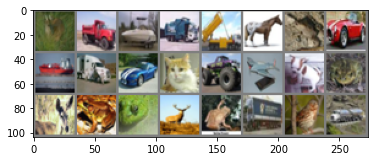

In [7]:
imshow(torchvision.utils.make_grid(images))

In [9]:
print(' '.join('%5s' % classes[labels[j]] for j in range(24)))


 deer truck  ship truck truck horse  frog   car  ship truck   car   cat truck plane   dog  frog  deer  frog  frog  deer  frog truck  bird truck


In [21]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [23]:
device

device(type='cuda')

In [28]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net_cpu = Net()
net_gpu = Net().to(device)

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer_cpu = optim.SGD(net_cpu.parameters(), lr=0.001, momentum=0.9)
optimizer_gpu = optim.SGD(net_gpu.parameters(), lr=0.001, momentum=0.9)

In [30]:
for epoch in tqdm(range(5)):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer_cpu.zero_grad()

        # forward + backward + optimize
        outputs = net_cpu(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_cpu.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

  0%|                                                                                                                                  | 0/5 [00:00<?, ?it/s]

[1,  2000] loss: 2.238


 20%|████████████████████████▍                                                                                                 | 1/5 [00:18<01:13, 18.41s/it]

[2,  2000] loss: 1.809


 40%|████████████████████████████████████████████████▊                                                                         | 2/5 [00:36<00:55, 18.44s/it]

[3,  2000] loss: 1.559


 60%|█████████████████████████████████████████████████████████████████████████▏                                                | 3/5 [00:55<00:36, 18.37s/it]

[4,  2000] loss: 1.423


 80%|█████████████████████████████████████████████████████████████████████████████████████████████████▌                        | 4/5 [01:13<00:18, 18.43s/it]

[5,  2000] loss: 1.327


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:31<00:00, 18.36s/it]

Finished Training


In [52]:
def evaluate(model, loader):
    model.eval()
    criterion = nn.CrossEntropyLoss()
    running_acc = 0.
    running_loss = 0.
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, dim=1)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        running_acc += torch.sum(preds == labels)
        
    epoch_acc = running_acc / len(loader.dataset)
    epoch_loss = running_loss / len(loader.dataset)
    
    return epoch_acc, epoch_loss
        

In [53]:
trajectories = {'train loss': [], 'test loss': [], 'train acc': [], 'test acc': []}
for epoch in tqdm(range(500)):  # loop over the dataset multiple times

    running_loss = 0.0
    running_acc = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer_gpu.zero_grad()

        # forward + backward + optimize
        outputs = net_gpu(inputs)
        _, preds = torch.max(outputs, dim=1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_gpu.step()

        # print statistics
        running_loss += loss.item()
        running_acc += torch.sum(preds == labels)
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
            
    epoch_acc = running_acc / len(trainloader.dataset)
    epoch_loss = running_loss / len(trainloader.dataset)
    test_acc, test_loss = evaluate(net_gpu, testloader)
    
    trajectories['train loss'].append(epoch_loss)
    trajectories['test loss'].append(test_loss)
    trajectories['train acc'].append(epoch_acc)
    trajectories['test acc'].append(test_acc)
    print(f"epoch accuracy: {epoch_acc}")

print('Finished Training')

  0%|                                                                                                                                | 0/500 [00:00<?, ?it/s]

[1,  2000] loss: 1.014


  0%|▏                                                                                                                     | 1/500 [00:17<2:22:29, 17.13s/it]

epoch accuracy: 0.6410799622535706
[2,  2000] loss: 0.975


  0%|▍                                                                                                                     | 2/500 [00:33<2:19:41, 16.83s/it]

epoch accuracy: 0.6556999683380127
[3,  2000] loss: 0.943


  1%|▋                                                                                                                     | 3/500 [00:49<2:17:35, 16.61s/it]

epoch accuracy: 0.6675999760627747
[4,  2000] loss: 0.913


  1%|▉                                                                                                                     | 4/500 [01:05<2:15:42, 16.42s/it]

epoch accuracy: 0.6776799559593201
[5,  2000] loss: 0.885


  1%|█▏                                                                                                                    | 5/500 [01:21<2:14:04, 16.25s/it]

epoch accuracy: 0.6889199614524841
[6,  2000] loss: 0.858


  1%|█▍                                                                                                                    | 6/500 [01:37<2:13:40, 16.24s/it]

epoch accuracy: 0.6966599822044373
[7,  2000] loss: 0.833


  1%|█▋                                                                                                                    | 7/500 [01:53<2:13:37, 16.26s/it]

epoch accuracy: 0.7079399824142456
[8,  2000] loss: 0.806


  2%|█▉                                                                                                                    | 8/500 [02:09<2:13:15, 16.25s/it]

epoch accuracy: 0.713979959487915
[9,  2000] loss: 0.781


  2%|██                                                                                                                    | 9/500 [02:26<2:13:37, 16.33s/it]

epoch accuracy: 0.7244200110435486
[10,  2000] loss: 0.765


  2%|██▎                                                                                                                  | 10/500 [02:42<2:12:41, 16.25s/it]

epoch accuracy: 0.7303999662399292
[11,  2000] loss: 0.740


  2%|██▌                                                                                                                  | 11/500 [02:58<2:12:41, 16.28s/it]

epoch accuracy: 0.7388399839401245
[12,  2000] loss: 0.722


  2%|██▊                                                                                                                  | 12/500 [03:14<2:11:52, 16.21s/it]

epoch accuracy: 0.7457000017166138
[13,  2000] loss: 0.702


  3%|███                                                                                                                  | 13/500 [03:30<2:10:58, 16.14s/it]

epoch accuracy: 0.7531999945640564
[14,  2000] loss: 0.682


  3%|███▎                                                                                                                 | 14/500 [03:46<2:09:52, 16.03s/it]

epoch accuracy: 0.7588399648666382
[15,  2000] loss: 0.664


  3%|███▌                                                                                                                 | 15/500 [04:02<2:09:23, 16.01s/it]

epoch accuracy: 0.766319990158081
[16,  2000] loss: 0.642


  3%|███▋                                                                                                                 | 16/500 [04:18<2:09:04, 16.00s/it]

epoch accuracy: 0.7734400033950806
[17,  2000] loss: 0.622


  3%|███▉                                                                                                                 | 17/500 [04:34<2:08:49, 16.00s/it]

epoch accuracy: 0.7797399759292603
[18,  2000] loss: 0.606


  4%|████▏                                                                                                                | 18/500 [04:50<2:08:07, 15.95s/it]

epoch accuracy: 0.7872799634933472
[19,  2000] loss: 0.593


  4%|████▍                                                                                                                | 19/500 [05:06<2:07:37, 15.92s/it]

epoch accuracy: 0.7905799746513367
[20,  2000] loss: 0.576


  4%|████▋                                                                                                                | 20/500 [05:22<2:07:24, 15.93s/it]

epoch accuracy: 0.7953000068664551
[21,  2000] loss: 0.558


  4%|████▉                                                                                                                | 21/500 [05:38<2:07:16, 15.94s/it]

epoch accuracy: 0.8014599680900574
[22,  2000] loss: 0.545


  4%|█████▏                                                                                                               | 22/500 [05:54<2:06:48, 15.92s/it]

epoch accuracy: 0.8061400055885315
[23,  2000] loss: 0.526


  5%|█████▍                                                                                                               | 23/500 [06:10<2:06:48, 15.95s/it]

epoch accuracy: 0.813759982585907
[24,  2000] loss: 0.512


  5%|█████▌                                                                                                               | 24/500 [06:26<2:06:47, 15.98s/it]

epoch accuracy: 0.8176400065422058
[25,  2000] loss: 0.498


  5%|█████▊                                                                                                               | 25/500 [06:42<2:06:47, 16.02s/it]

epoch accuracy: 0.8197599649429321
[26,  2000] loss: 0.484


  5%|██████                                                                                                               | 26/500 [06:58<2:07:48, 16.18s/it]

epoch accuracy: 0.8271999955177307
[27,  2000] loss: 0.472


  5%|██████▎                                                                                                              | 27/500 [07:15<2:09:03, 16.37s/it]

epoch accuracy: 0.8313199877738953
[28,  2000] loss: 0.457


  6%|██████▌                                                                                                              | 28/500 [07:32<2:09:29, 16.46s/it]

epoch accuracy: 0.834559977054596
[29,  2000] loss: 0.447


  6%|██████▊                                                                                                              | 29/500 [07:48<2:07:42, 16.27s/it]

epoch accuracy: 0.8394399881362915
[30,  2000] loss: 0.439


  6%|███████                                                                                                              | 30/500 [08:03<2:06:24, 16.14s/it]

epoch accuracy: 0.8422799706459045
[31,  2000] loss: 0.421


  6%|███████▎                                                                                                             | 31/500 [08:20<2:07:52, 16.36s/it]

epoch accuracy: 0.8477199673652649
[32,  2000] loss: 0.408


  6%|███████▍                                                                                                             | 32/500 [08:37<2:07:18, 16.32s/it]

epoch accuracy: 0.8520599603652954
[33,  2000] loss: 0.398


  7%|███████▋                                                                                                             | 33/500 [08:53<2:06:24, 16.24s/it]

epoch accuracy: 0.8569999933242798
[34,  2000] loss: 0.389


  7%|███████▉                                                                                                             | 34/500 [09:08<2:05:09, 16.11s/it]

epoch accuracy: 0.8587799668312073
[35,  2000] loss: 0.381


  7%|████████▏                                                                                                            | 35/500 [09:24<2:04:08, 16.02s/it]

epoch accuracy: 0.861579954624176
[36,  2000] loss: 0.372


  7%|████████▍                                                                                                            | 36/500 [09:40<2:03:28, 15.97s/it]

epoch accuracy: 0.8657599687576294
[37,  2000] loss: 0.362


  7%|████████▋                                                                                                            | 37/500 [09:56<2:02:43, 15.90s/it]

epoch accuracy: 0.8695600032806396
[38,  2000] loss: 0.346


  8%|████████▉                                                                                                            | 38/500 [10:12<2:02:17, 15.88s/it]

epoch accuracy: 0.8741399645805359
[39,  2000] loss: 0.341


  8%|█████████▏                                                                                                           | 39/500 [10:27<2:01:53, 15.86s/it]

epoch accuracy: 0.8755199909210205
[40,  2000] loss: 0.334


  8%|█████████▎                                                                                                           | 40/500 [10:43<2:01:29, 15.85s/it]

epoch accuracy: 0.8767199516296387
[41,  2000] loss: 0.322


  8%|█████████▌                                                                                                           | 41/500 [10:59<2:01:17, 15.85s/it]

epoch accuracy: 0.8818599581718445
[42,  2000] loss: 0.310


  8%|█████████▊                                                                                                           | 42/500 [11:15<2:01:13, 15.88s/it]

epoch accuracy: 0.8870799541473389
[43,  2000] loss: 0.313


  9%|██████████                                                                                                           | 43/500 [11:31<2:01:13, 15.92s/it]

epoch accuracy: 0.8861199617385864
[44,  2000] loss: 0.301


  9%|██████████▎                                                                                                          | 44/500 [11:48<2:02:28, 16.12s/it]

epoch accuracy: 0.8892599940299988
[45,  2000] loss: 0.295


  9%|██████████▌                                                                                                          | 45/500 [12:03<2:01:18, 16.00s/it]

epoch accuracy: 0.8921599984169006
[46,  2000] loss: 0.290


  9%|██████████▊                                                                                                          | 46/500 [12:19<2:00:29, 15.92s/it]

epoch accuracy: 0.893619954586029
[47,  2000] loss: 0.284


  9%|██████████▉                                                                                                          | 47/500 [12:35<2:00:13, 15.92s/it]

epoch accuracy: 0.895859956741333
[48,  2000] loss: 0.275


 10%|███████████▏                                                                                                         | 48/500 [12:51<2:00:45, 16.03s/it]

epoch accuracy: 0.8997599482536316
[49,  2000] loss: 0.268


 10%|███████████▍                                                                                                         | 49/500 [13:07<1:59:51, 15.95s/it]

epoch accuracy: 0.9012799859046936
[50,  2000] loss: 0.268


 10%|███████████▋                                                                                                         | 50/500 [13:23<1:59:45, 15.97s/it]

epoch accuracy: 0.8998599648475647
[51,  2000] loss: 0.266


 10%|███████████▉                                                                                                         | 51/500 [13:39<1:59:30, 15.97s/it]

epoch accuracy: 0.9028799533843994
[52,  2000] loss: 0.254


 10%|████████████▏                                                                                                        | 52/500 [13:55<1:58:40, 15.89s/it]

epoch accuracy: 0.9061999917030334
[53,  2000] loss: 0.264


 11%|████████████▍                                                                                                        | 53/500 [14:11<1:58:04, 15.85s/it]

epoch accuracy: 0.902239978313446
[54,  2000] loss: 0.239


 11%|████████████▋                                                                                                        | 54/500 [14:26<1:57:35, 15.82s/it]

epoch accuracy: 0.9115599989891052
[55,  2000] loss: 0.244


 11%|████████████▊                                                                                                        | 55/500 [14:42<1:57:31, 15.85s/it]

epoch accuracy: 0.9093999862670898
[56,  2000] loss: 0.232


 11%|█████████████                                                                                                        | 56/500 [14:58<1:57:30, 15.88s/it]

epoch accuracy: 0.913159966468811
[57,  2000] loss: 0.239


 11%|█████████████▎                                                                                                       | 57/500 [15:14<1:57:30, 15.91s/it]

epoch accuracy: 0.9122399687767029
[58,  2000] loss: 0.232


 12%|█████████████▌                                                                                                       | 58/500 [15:30<1:57:28, 15.95s/it]

epoch accuracy: 0.9142400026321411
[59,  2000] loss: 0.232


 12%|█████████████▊                                                                                                       | 59/500 [15:46<1:56:43, 15.88s/it]

epoch accuracy: 0.915340006351471
[60,  2000] loss: 0.224


 12%|██████████████                                                                                                       | 60/500 [16:02<1:56:06, 15.83s/it]

epoch accuracy: 0.9160400032997131
[61,  2000] loss: 0.218


 12%|██████████████▎                                                                                                      | 61/500 [16:17<1:55:46, 15.82s/it]

epoch accuracy: 0.9196599721908569
[62,  2000] loss: 0.212


 12%|██████████████▌                                                                                                      | 62/500 [16:34<1:56:51, 16.01s/it]

epoch accuracy: 0.9227799773216248
[63,  2000] loss: 0.220


 13%|██████████████▋                                                                                                      | 63/500 [16:51<1:58:00, 16.20s/it]

epoch accuracy: 0.9197799563407898
[64,  2000] loss: 0.192


 13%|██████████████▉                                                                                                      | 64/500 [17:07<1:57:39, 16.19s/it]

epoch accuracy: 0.9298799633979797
[65,  2000] loss: 0.208


 13%|███████████████▏                                                                                                     | 65/500 [17:23<1:56:42, 16.10s/it]

epoch accuracy: 0.924299955368042
[66,  2000] loss: 0.191


 13%|███████████████▍                                                                                                     | 66/500 [17:38<1:55:27, 15.96s/it]

epoch accuracy: 0.9292799830436707
[67,  2000] loss: 0.202


 13%|███████████████▋                                                                                                     | 67/500 [17:53<1:53:29, 15.73s/it]

epoch accuracy: 0.9262999892234802
[68,  2000] loss: 0.204


 14%|███████████████▉                                                                                                     | 68/500 [18:09<1:52:21, 15.60s/it]

epoch accuracy: 0.9258399605751038
[69,  2000] loss: 0.204


 14%|████████████████▏                                                                                                    | 69/500 [18:24<1:51:02, 15.46s/it]

epoch accuracy: 0.9254599809646606
[70,  2000] loss: 0.183


 14%|████████████████▍                                                                                                    | 70/500 [18:39<1:50:33, 15.43s/it]

epoch accuracy: 0.9337199926376343
[71,  2000] loss: 0.187


 14%|████████████████▌                                                                                                    | 71/500 [18:54<1:49:33, 15.32s/it]

epoch accuracy: 0.9306599497795105
[72,  2000] loss: 0.192


 14%|████████████████▊                                                                                                    | 72/500 [19:10<1:49:18, 15.32s/it]

epoch accuracy: 0.9318199753761292
[73,  2000] loss: 0.194


 15%|█████████████████                                                                                                    | 73/500 [19:25<1:49:04, 15.33s/it]

epoch accuracy: 0.9303999543190002
[74,  2000] loss: 0.179


 15%|█████████████████▎                                                                                                   | 74/500 [19:40<1:48:31, 15.29s/it]

epoch accuracy: 0.9346999526023865
[75,  2000] loss: 0.177


 15%|█████████████████▌                                                                                                   | 75/500 [19:55<1:48:00, 15.25s/it]

epoch accuracy: 0.9348599910736084
[76,  2000] loss: 0.181


 15%|█████████████████▊                                                                                                   | 76/500 [20:11<1:47:56, 15.27s/it]

epoch accuracy: 0.9362799525260925
[77,  2000] loss: 0.179


 15%|██████████████████                                                                                                   | 77/500 [20:26<1:47:46, 15.29s/it]

epoch accuracy: 0.9349599480628967
[78,  2000] loss: 0.180


 16%|██████████████████▎                                                                                                  | 78/500 [20:41<1:47:34, 15.29s/it]

epoch accuracy: 0.9345999956130981
[79,  2000] loss: 0.186


 16%|██████████████████▍                                                                                                  | 79/500 [20:57<1:47:19, 15.30s/it]

epoch accuracy: 0.9319799542427063
[80,  2000] loss: 0.167


 16%|██████████████████▋                                                                                                  | 80/500 [21:12<1:47:04, 15.30s/it]

epoch accuracy: 0.9398599863052368
[81,  2000] loss: 0.172


 16%|██████████████████▉                                                                                                  | 81/500 [21:27<1:46:56, 15.31s/it]

epoch accuracy: 0.9382999539375305
[82,  2000] loss: 0.166


 16%|███████████████████▏                                                                                                 | 82/500 [21:43<1:46:42, 15.32s/it]

epoch accuracy: 0.9410199522972107
[83,  2000] loss: 0.171


 17%|███████████████████▍                                                                                                 | 83/500 [21:58<1:46:12, 15.28s/it]

epoch accuracy: 0.9384199976921082
[84,  2000] loss: 0.171


 17%|███████████████████▋                                                                                                 | 84/500 [22:13<1:46:19, 15.33s/it]

epoch accuracy: 0.938319981098175
[85,  2000] loss: 0.149


 17%|███████████████████▉                                                                                                 | 85/500 [22:28<1:45:39, 15.28s/it]

epoch accuracy: 0.9457599520683289
[86,  2000] loss: 0.162


 17%|████████████████████                                                                                                 | 86/500 [22:44<1:45:25, 15.28s/it]

epoch accuracy: 0.940779983997345
[87,  2000] loss: 0.170


 17%|████████████████████▎                                                                                                | 87/500 [22:59<1:45:11, 15.28s/it]

epoch accuracy: 0.940339982509613
[88,  2000] loss: 0.165


 18%|████████████████████▌                                                                                                | 88/500 [23:14<1:44:58, 15.29s/it]

epoch accuracy: 0.9404000043869019
[89,  2000] loss: 0.139


 18%|████████████████████▊                                                                                                | 89/500 [23:30<1:45:04, 15.34s/it]

epoch accuracy: 0.9496600031852722
[90,  2000] loss: 0.173


 18%|█████████████████████                                                                                                | 90/500 [23:45<1:44:52, 15.35s/it]

epoch accuracy: 0.9396199584007263
[91,  2000] loss: 0.158


 18%|█████████████████████▎                                                                                               | 91/500 [24:00<1:44:13, 15.29s/it]

epoch accuracy: 0.9441199898719788
[92,  2000] loss: 0.153


 18%|█████████████████████▌                                                                                               | 92/500 [24:15<1:43:58, 15.29s/it]

epoch accuracy: 0.9451199769973755
[93,  2000] loss: 0.163


 19%|█████████████████████▊                                                                                               | 93/500 [24:31<1:43:29, 15.26s/it]

epoch accuracy: 0.943079948425293
[94,  2000] loss: 0.153


 19%|█████████████████████▉                                                                                               | 94/500 [24:46<1:43:09, 15.25s/it]

epoch accuracy: 0.94514000415802
[95,  2000] loss: 0.157


 19%|██████████████████████▏                                                                                              | 95/500 [25:01<1:42:51, 15.24s/it]

epoch accuracy: 0.944379985332489
[96,  2000] loss: 0.154


 19%|██████████████████████▍                                                                                              | 96/500 [25:16<1:42:32, 15.23s/it]

epoch accuracy: 0.9451599717140198
[97,  2000] loss: 0.143


 19%|██████████████████████▋                                                                                              | 97/500 [25:32<1:42:34, 15.27s/it]

epoch accuracy: 0.9501399993896484
[98,  2000] loss: 0.135


 20%|██████████████████████▉                                                                                              | 98/500 [25:47<1:42:25, 15.29s/it]

epoch accuracy: 0.9532999992370605
[99,  2000] loss: 0.144


 20%|███████████████████████▏                                                                                             | 99/500 [26:02<1:42:12, 15.29s/it]

epoch accuracy: 0.9479999542236328
[100,  2000] loss: 0.128


 20%|███████████████████████▏                                                                                            | 100/500 [26:18<1:42:11, 15.33s/it]

epoch accuracy: 0.9548400044441223
[101,  2000] loss: 0.129


 20%|███████████████████████▍                                                                                            | 101/500 [26:33<1:41:47, 15.31s/it]

epoch accuracy: 0.9545199871063232
[102,  2000] loss: 0.150


 20%|███████████████████████▋                                                                                            | 102/500 [26:48<1:41:39, 15.32s/it]

epoch accuracy: 0.9462800025939941
[103,  2000] loss: 0.153


 21%|███████████████████████▉                                                                                            | 103/500 [27:04<1:41:24, 15.33s/it]

epoch accuracy: 0.9448399543762207
[104,  2000] loss: 0.145


 21%|████████████████████████▏                                                                                           | 104/500 [27:19<1:40:58, 15.30s/it]

epoch accuracy: 0.9496199488639832
[105,  2000] loss: 0.142


 21%|████████████████████████▎                                                                                           | 105/500 [27:34<1:40:59, 15.34s/it]

epoch accuracy: 0.9493199586868286
[106,  2000] loss: 0.150


 21%|████████████████████████▌                                                                                           | 106/500 [27:50<1:40:41, 15.33s/it]

epoch accuracy: 0.9483599662780762
[107,  2000] loss: 0.138


 21%|████████████████████████▊                                                                                           | 107/500 [28:05<1:40:19, 15.32s/it]

epoch accuracy: 0.9510999917984009
[108,  2000] loss: 0.151


 22%|█████████████████████████                                                                                           | 108/500 [28:20<1:39:43, 15.26s/it]

epoch accuracy: 0.9480599761009216
[109,  2000] loss: 0.129


 22%|█████████████████████████▎                                                                                          | 109/500 [28:35<1:39:43, 15.30s/it]

epoch accuracy: 0.9542799592018127
[110,  2000] loss: 0.114


 22%|█████████████████████████▌                                                                                          | 110/500 [28:51<1:39:21, 15.28s/it]

epoch accuracy: 0.960159957408905
[111,  2000] loss: 0.149


 22%|█████████████████████████▊                                                                                          | 111/500 [29:06<1:39:05, 15.28s/it]

epoch accuracy: 0.9496199488639832
[112,  2000] loss: 0.134


 22%|█████████████████████████▉                                                                                          | 112/500 [29:21<1:38:55, 15.30s/it]

epoch accuracy: 0.9531999826431274
[113,  2000] loss: 0.154


 23%|██████████████████████████▏                                                                                         | 113/500 [29:37<1:38:55, 15.34s/it]

epoch accuracy: 0.9477799534797668
[114,  2000] loss: 0.144


 23%|██████████████████████████▍                                                                                         | 114/500 [29:52<1:38:12, 15.27s/it]

epoch accuracy: 0.9491599798202515
[115,  2000] loss: 0.121


 23%|██████████████████████████▋                                                                                         | 115/500 [30:08<1:39:47, 15.55s/it]

epoch accuracy: 0.9572199583053589
[116,  2000] loss: 0.128


 23%|██████████████████████████▉                                                                                         | 116/500 [30:23<1:38:40, 15.42s/it]

epoch accuracy: 0.9555599689483643
[117,  2000] loss: 0.126


 23%|███████████████████████████▏                                                                                        | 117/500 [30:38<1:38:14, 15.39s/it]

epoch accuracy: 0.9568399786949158
[118,  2000] loss: 0.107


 24%|███████████████████████████▍                                                                                        | 118/500 [30:54<1:37:32, 15.32s/it]

epoch accuracy: 0.9628799557685852
[119,  2000] loss: 0.118


 24%|███████████████████████████▌                                                                                        | 119/500 [31:09<1:37:11, 15.30s/it]

epoch accuracy: 0.9598599672317505
[120,  2000] loss: 0.138


 24%|███████████████████████████▊                                                                                        | 120/500 [31:24<1:36:56, 15.31s/it]

epoch accuracy: 0.9526199698448181
[121,  2000] loss: 0.154


 24%|████████████████████████████                                                                                        | 121/500 [31:40<1:38:05, 15.53s/it]

epoch accuracy: 0.9483399987220764
[122,  2000] loss: 0.148


 24%|████████████████████████████▎                                                                                       | 122/500 [31:56<1:38:35, 15.65s/it]

epoch accuracy: 0.950499951839447
[123,  2000] loss: 0.119


 25%|████████████████████████████▌                                                                                       | 123/500 [32:12<1:37:48, 15.57s/it]

epoch accuracy: 0.9583399891853333
[124,  2000] loss: 0.133


 25%|████████████████████████████▊                                                                                       | 124/500 [32:27<1:37:04, 15.49s/it]

epoch accuracy: 0.9551599621772766
[125,  2000] loss: 0.134


 25%|█████████████████████████████                                                                                       | 125/500 [32:42<1:36:12, 15.39s/it]

epoch accuracy: 0.9551799893379211
[126,  2000] loss: 0.131


 25%|█████████████████████████████▏                                                                                      | 126/500 [32:57<1:35:46, 15.37s/it]

epoch accuracy: 0.9554999470710754
[127,  2000] loss: 0.116


 25%|█████████████████████████████▍                                                                                      | 127/500 [33:13<1:35:20, 15.34s/it]

epoch accuracy: 0.9600399732589722
[128,  2000] loss: 0.130


 26%|█████████████████████████████▋                                                                                      | 128/500 [33:28<1:35:13, 15.36s/it]

epoch accuracy: 0.9556399583816528
[129,  2000] loss: 0.111


 26%|█████████████████████████████▉                                                                                      | 129/500 [33:43<1:34:43, 15.32s/it]

epoch accuracy: 0.9615199565887451
[130,  2000] loss: 0.143


 26%|██████████████████████████████▏                                                                                     | 130/500 [33:59<1:34:27, 15.32s/it]

epoch accuracy: 0.9517999887466431
[131,  2000] loss: 0.133


 26%|██████████████████████████████▍                                                                                     | 131/500 [34:14<1:33:51, 15.26s/it]

epoch accuracy: 0.9555599689483643
[132,  2000] loss: 0.119


 26%|██████████████████████████████▌                                                                                     | 132/500 [34:29<1:33:36, 15.26s/it]

epoch accuracy: 0.9584800004959106
[133,  2000] loss: 0.150


 27%|██████████████████████████████▊                                                                                     | 133/500 [34:44<1:33:20, 15.26s/it]

epoch accuracy: 0.9510599970817566
[134,  2000] loss: 0.131


 27%|███████████████████████████████                                                                                     | 134/500 [34:59<1:33:05, 15.26s/it]

epoch accuracy: 0.9558599591255188
[135,  2000] loss: 0.126


 27%|███████████████████████████████▎                                                                                    | 135/500 [35:15<1:32:50, 15.26s/it]

epoch accuracy: 0.9570599794387817
[136,  2000] loss: 0.140


 27%|███████████████████████████████▌                                                                                    | 136/500 [35:30<1:32:39, 15.27s/it]

epoch accuracy: 0.9532600045204163
[137,  2000] loss: 0.129


 27%|███████████████████████████████▊                                                                                    | 137/500 [35:45<1:32:30, 15.29s/it]

epoch accuracy: 0.9560999870300293
[138,  2000] loss: 0.101


 28%|████████████████████████████████                                                                                    | 138/500 [36:01<1:32:13, 15.29s/it]

epoch accuracy: 0.9648199677467346
[139,  2000] loss: 0.124


 28%|████████████████████████████████▏                                                                                   | 139/500 [36:16<1:32:00, 15.29s/it]

epoch accuracy: 0.958359956741333
[140,  2000] loss: 0.128


 28%|████████████████████████████████▍                                                                                   | 140/500 [36:31<1:31:31, 15.26s/it]

epoch accuracy: 0.9578999876976013
[141,  2000] loss: 0.145


 28%|████████████████████████████████▋                                                                                   | 141/500 [36:46<1:31:11, 15.24s/it]

epoch accuracy: 0.9515799880027771
[142,  2000] loss: 0.105


 28%|████████████████████████████████▉                                                                                   | 142/500 [37:02<1:31:06, 15.27s/it]

epoch accuracy: 0.9642599821090698
[143,  2000] loss: 0.120


 29%|█████████████████████████████████▏                                                                                  | 143/500 [37:17<1:31:12, 15.33s/it]

epoch accuracy: 0.9597399830818176
[144,  2000] loss: 0.118


 29%|█████████████████████████████████▍                                                                                  | 144/500 [37:33<1:31:11, 15.37s/it]

epoch accuracy: 0.9599199891090393
[145,  2000] loss: 0.116


 29%|█████████████████████████████████▋                                                                                  | 145/500 [37:48<1:30:41, 15.33s/it]

epoch accuracy: 0.9605599641799927
[146,  2000] loss: 0.131


 29%|████████████████████████████████                                                                              | 146/500 [4:37:02<424:29:55, 4316.94s/it]

epoch accuracy: 0.9568599462509155
[147,  2000] loss: 0.121


 29%|████████████████████████████████▎                                                                             | 147/500 [4:37:19<296:48:51, 3027.00s/it]

epoch accuracy: 0.9601199626922607
[148,  2000] loss: 0.143


 30%|████████████████████████████████▌                                                                             | 148/500 [4:37:36<207:41:11, 2124.07s/it]

epoch accuracy: 0.953499972820282
[149,  2000] loss: 0.146


 30%|████████████████████████████████▊                                                                             | 149/500 [4:37:53<145:27:46, 1491.93s/it]

epoch accuracy: 0.9528399705886841
[150,  2000] loss: 0.127


 30%|█████████████████████████████████                                                                             | 150/500 [4:38:09<102:00:06, 1049.16s/it]

epoch accuracy: 0.9576599597930908
[151,  2000] loss: 0.110


 30%|█████████████████████████████████▊                                                                              | 151/500 [4:38:28<71:44:12, 739.98s/it]

epoch accuracy: 0.9642399549484253
[152,  2000] loss: 0.103


 30%|██████████████████████████████████                                                                              | 152/500 [4:38:44<50:33:01, 522.93s/it]

epoch accuracy: 0.9647599458694458
[153,  2000] loss: 0.097


 31%|██████████████████████████████████▎                                                                             | 153/500 [4:39:01<35:46:46, 371.20s/it]

epoch accuracy: 0.9666000008583069
[154,  2000] loss: 0.111


 31%|██████████████████████████████████▍                                                                             | 154/500 [4:39:17<25:25:29, 264.53s/it]

epoch accuracy: 0.9624799489974976
[155,  2000] loss: 0.161


 31%|██████████████████████████████████▋                                                                             | 155/500 [4:39:33<18:12:54, 190.07s/it]

epoch accuracy: 0.9487800002098083
[156,  2000] loss: 0.137


 31%|██████████████████████████████████▉                                                                             | 156/500 [4:39:50<13:11:07, 137.99s/it]

epoch accuracy: 0.956279993057251
[157,  2000] loss: 0.141


 31%|███████████████████████████████████▍                                                                             | 157/500 [4:40:06<9:39:55, 101.44s/it]

epoch accuracy: 0.9560399651527405
[158,  2000] loss: 0.131


 32%|████████████████████████████████████                                                                              | 158/500 [4:40:22<7:12:53, 75.95s/it]

epoch accuracy: 0.9567999839782715
[159,  2000] loss: 0.158


 32%|████████████████████████████████████▎                                                                             | 159/500 [4:40:38<5:28:46, 57.85s/it]

epoch accuracy: 0.9502999782562256
[160,  2000] loss: 0.116


 32%|████████████████████████████████████▍                                                                             | 160/500 [4:40:54<4:16:31, 45.27s/it]

epoch accuracy: 0.9615199565887451
[161,  2000] loss: 0.099


 32%|████████████████████████████████████▋                                                                             | 161/500 [4:41:10<3:25:36, 36.39s/it]

epoch accuracy: 0.96697998046875
[162,  2000] loss: 0.112


 32%|████████████████████████████████████▉                                                                             | 162/500 [4:41:26<2:50:16, 30.22s/it]

epoch accuracy: 0.9638199806213379
[163,  2000] loss: 0.098


 33%|█████████████████████████████████████▏                                                                            | 163/500 [4:41:41<2:25:19, 25.88s/it]

epoch accuracy: 0.9667799472808838
[164,  2000] loss: 0.092


 33%|█████████████████████████████████████▍                                                                            | 164/500 [4:41:57<2:08:22, 22.92s/it]

epoch accuracy: 0.9684799909591675
[165,  2000] loss: 0.130


 33%|█████████████████████████████████████▌                                                                            | 165/500 [4:42:13<1:55:34, 20.70s/it]

epoch accuracy: 0.9582200050354004
[166,  2000] loss: 0.127


 33%|█████████████████████████████████████▊                                                                            | 166/500 [4:42:28<1:46:27, 19.13s/it]

epoch accuracy: 0.9584999680519104
[167,  2000] loss: 0.143


 33%|██████████████████████████████████████                                                                            | 167/500 [4:42:44<1:40:24, 18.09s/it]

epoch accuracy: 0.9544199705123901
[168,  2000] loss: 0.128


 34%|██████████████████████████████████████▎                                                                           | 168/500 [4:43:00<1:36:00, 17.35s/it]

epoch accuracy: 0.9584999680519104
[169,  2000] loss: 0.162


 34%|██████████████████████████████████████▌                                                                           | 169/500 [4:43:15<1:32:37, 16.79s/it]

epoch accuracy: 0.9486199617385864
[170,  2000] loss: 0.146


 34%|██████████████████████████████████████▊                                                                           | 170/500 [4:43:31<1:30:40, 16.49s/it]

epoch accuracy: 0.9528200030326843
[171,  2000] loss: 0.114


 34%|██████████████████████████████████████▉                                                                           | 171/500 [4:43:47<1:29:05, 16.25s/it]

epoch accuracy: 0.9619399905204773
[172,  2000] loss: 0.119


 34%|███████████████████████████████████████▏                                                                          | 172/500 [4:44:02<1:28:11, 16.13s/it]

epoch accuracy: 0.9608999490737915
[173,  2000] loss: 0.122


 35%|███████████████████████████████████████▍                                                                          | 173/500 [4:44:18<1:27:16, 16.01s/it]

epoch accuracy: 0.9595800042152405
[174,  2000] loss: 0.122


 35%|███████████████████████████████████████▋                                                                          | 174/500 [4:44:34<1:26:51, 15.99s/it]

epoch accuracy: 0.9605000019073486
[175,  2000] loss: 0.120


 35%|███████████████████████████████████████▉                                                                          | 175/500 [4:44:50<1:26:08, 15.90s/it]

epoch accuracy: 0.9620999693870544
[176,  2000] loss: 0.113


 35%|████████████████████████████████████████▏                                                                         | 176/500 [4:45:05<1:25:31, 15.84s/it]

epoch accuracy: 0.9635399580001831
[177,  2000] loss: 0.144


 35%|████████████████████████████████████████▎                                                                         | 177/500 [4:45:21<1:25:27, 15.87s/it]

epoch accuracy: 0.954319953918457
[178,  2000] loss: 0.111


 36%|████████████████████████████████████████▌                                                                         | 178/500 [4:45:37<1:24:32, 15.75s/it]

epoch accuracy: 0.9632599949836731
[179,  2000] loss: 0.132


 36%|████████████████████████████████████████▊                                                                         | 179/500 [4:45:53<1:24:08, 15.73s/it]

epoch accuracy: 0.9585399627685547
[180,  2000] loss: 0.134


 36%|█████████████████████████████████████████                                                                         | 180/500 [4:46:08<1:23:21, 15.63s/it]

epoch accuracy: 0.9575999975204468
[181,  2000] loss: 0.098


 36%|█████████████████████████████████████████▎                                                                        | 181/500 [4:46:24<1:23:14, 15.66s/it]

epoch accuracy: 0.9674999713897705
[182,  2000] loss: 0.105


 36%|█████████████████████████████████████████▍                                                                        | 182/500 [4:46:39<1:22:41, 15.60s/it]

epoch accuracy: 0.9667999744415283
[183,  2000] loss: 0.135


 37%|█████████████████████████████████████████▋                                                                        | 183/500 [4:46:55<1:23:08, 15.74s/it]

epoch accuracy: 0.9578999876976013
[184,  2000] loss: 0.143


 37%|█████████████████████████████████████████▉                                                                        | 184/500 [4:47:12<1:23:58, 15.95s/it]

epoch accuracy: 0.9558799862861633
[185,  2000] loss: 0.124


 37%|██████████████████████████████████████████▏                                                                       | 185/500 [4:47:27<1:23:10, 15.84s/it]

epoch accuracy: 0.9608599543571472
[186,  2000] loss: 0.143


 37%|██████████████████████████████████████████▍                                                                       | 186/500 [4:47:43<1:22:38, 15.79s/it]

epoch accuracy: 0.9551799893379211
[187,  2000] loss: 0.122


 37%|██████████████████████████████████████████▋                                                                       | 187/500 [4:47:58<1:21:51, 15.69s/it]

epoch accuracy: 0.9612399935722351
[188,  2000] loss: 0.144


 38%|██████████████████████████████████████████▊                                                                       | 188/500 [4:48:14<1:21:37, 15.70s/it]

epoch accuracy: 0.9563999772071838
[189,  2000] loss: 0.138


 38%|███████████████████████████████████████████                                                                       | 189/500 [4:48:30<1:21:01, 15.63s/it]

epoch accuracy: 0.9575600028038025
[190,  2000] loss: 0.128


 38%|███████████████████████████████████████████▎                                                                      | 190/500 [4:48:45<1:20:24, 15.56s/it]

epoch accuracy: 0.9602999687194824
[191,  2000] loss: 0.112


 38%|███████████████████████████████████████████▌                                                                      | 191/500 [4:49:01<1:20:38, 15.66s/it]

epoch accuracy: 0.9642799496650696
[192,  2000] loss: 0.120


 38%|███████████████████████████████████████████▊                                                                      | 192/500 [4:49:17<1:20:28, 15.68s/it]

epoch accuracy: 0.9614399671554565
[193,  2000] loss: 0.127


 39%|████████████████████████████████████████████                                                                      | 193/500 [4:49:32<1:20:22, 15.71s/it]

epoch accuracy: 0.9605399966239929
[194,  2000] loss: 0.134


 39%|████████████████████████████████████████████▏                                                                     | 194/500 [4:49:48<1:20:05, 15.70s/it]

epoch accuracy: 0.9584599733352661
[195,  2000] loss: 0.107


 39%|████████████████████████████████████████████▍                                                                     | 195/500 [4:50:04<1:19:37, 15.66s/it]

epoch accuracy: 0.964959979057312
[196,  2000] loss: 0.134


 39%|████████████████████████████████████████████▋                                                                     | 196/500 [4:50:19<1:19:06, 15.61s/it]

epoch accuracy: 0.9589200019836426
[197,  2000] loss: 0.109


 39%|████████████████████████████████████████████▉                                                                     | 197/500 [4:50:35<1:18:56, 15.63s/it]

epoch accuracy: 0.9651599526405334
[198,  2000] loss: 0.119


 40%|█████████████████████████████████████████████▏                                                                    | 198/500 [4:50:50<1:18:32, 15.60s/it]

epoch accuracy: 0.9611799716949463
[199,  2000] loss: 0.118


 40%|█████████████████████████████████████████████▎                                                                    | 199/500 [4:51:06<1:18:24, 15.63s/it]

epoch accuracy: 0.963379979133606
[200,  2000] loss: 0.114


 40%|█████████████████████████████████████████████▌                                                                    | 200/500 [4:51:22<1:18:17, 15.66s/it]

epoch accuracy: 0.9650999903678894
[201,  2000] loss: 0.124


 40%|█████████████████████████████████████████████▊                                                                    | 201/500 [4:51:37<1:17:45, 15.60s/it]

epoch accuracy: 0.9607599973678589
[202,  2000] loss: 0.123


 40%|██████████████████████████████████████████████                                                                    | 202/500 [4:51:53<1:17:25, 15.59s/it]

epoch accuracy: 0.9617799520492554
[203,  2000] loss: 0.155


 41%|██████████████████████████████████████████████▎                                                                   | 203/500 [4:52:08<1:17:18, 15.62s/it]

epoch accuracy: 0.9529799818992615
[204,  2000] loss: 0.148


 41%|██████████████████████████████████████████████▌                                                                   | 204/500 [4:52:24<1:17:09, 15.64s/it]

epoch accuracy: 0.954039990901947
[205,  2000] loss: 0.133


 41%|██████████████████████████████████████████████▋                                                                   | 205/500 [4:52:40<1:16:33, 15.57s/it]

epoch accuracy: 0.9587199687957764
[206,  2000] loss: 0.143


 41%|██████████████████████████████████████████████▉                                                                   | 206/500 [4:52:55<1:16:40, 15.65s/it]

epoch accuracy: 0.9566199779510498
[207,  2000] loss: 0.120


 41%|███████████████████████████████████████████████▏                                                                  | 207/500 [4:53:12<1:17:15, 15.82s/it]

epoch accuracy: 0.9625399708747864
[208,  2000] loss: 0.109


 42%|███████████████████████████████████████████████▍                                                                  | 208/500 [4:53:28<1:17:36, 15.95s/it]

epoch accuracy: 0.9648799896240234
[209,  2000] loss: 0.120


 42%|███████████████████████████████████████████████▋                                                                  | 209/500 [4:53:43<1:16:36, 15.80s/it]

epoch accuracy: 0.9624999761581421
[210,  2000] loss: 0.103


 42%|███████████████████████████████████████████████▉                                                                  | 210/500 [4:53:59<1:15:49, 15.69s/it]

epoch accuracy: 0.9674999713897705
[211,  2000] loss: 0.153


 42%|████████████████████████████████████████████████                                                                  | 211/500 [4:54:14<1:15:10, 15.61s/it]

epoch accuracy: 0.9550600051879883
[212,  2000] loss: 0.133


 42%|████████████████████████████████████████████████▎                                                                 | 212/500 [4:54:30<1:14:43, 15.57s/it]

epoch accuracy: 0.9592199921607971
[213,  2000] loss: 0.110


 43%|████████████████████████████████████████████████▌                                                                 | 213/500 [4:54:45<1:14:35, 15.59s/it]

epoch accuracy: 0.9649399518966675
[214,  2000] loss: 0.125


 43%|████████████████████████████████████████████████▊                                                                 | 214/500 [4:55:01<1:14:04, 15.54s/it]

epoch accuracy: 0.9621999859809875
[215,  2000] loss: 0.130


 43%|█████████████████████████████████████████████████                                                                 | 215/500 [4:55:16<1:13:41, 15.51s/it]

epoch accuracy: 0.9608599543571472
[216,  2000] loss: 0.124


 43%|█████████████████████████████████████████████████▏                                                                | 216/500 [4:55:32<1:13:31, 15.53s/it]

epoch accuracy: 0.9618799686431885
[217,  2000] loss: 0.145


 43%|█████████████████████████████████████████████████▍                                                                | 217/500 [4:55:47<1:13:24, 15.56s/it]

epoch accuracy: 0.9576599597930908
[218,  2000] loss: 0.117


 44%|█████████████████████████████████████████████████▋                                                                | 218/500 [4:56:03<1:12:58, 15.53s/it]

epoch accuracy: 0.9641799926757812
[219,  2000] loss: 0.138


 44%|█████████████████████████████████████████████████▉                                                                | 219/500 [4:56:19<1:13:08, 15.62s/it]

epoch accuracy: 0.9586799740791321
[220,  2000] loss: 0.124


 44%|██████████████████████████████████████████████████▏                                                               | 220/500 [4:56:34<1:12:57, 15.63s/it]

epoch accuracy: 0.9623199701309204
[221,  2000] loss: 0.112


 44%|██████████████████████████████████████████████████▍                                                               | 221/500 [4:56:50<1:13:00, 15.70s/it]

epoch accuracy: 0.9651399850845337
[222,  2000] loss: 0.137


 44%|██████████████████████████████████████████████████▌                                                               | 222/500 [4:57:06<1:13:02, 15.76s/it]

epoch accuracy: 0.9585599899291992
[223,  2000] loss: 0.140


 45%|██████████████████████████████████████████████████▊                                                               | 223/500 [4:57:22<1:12:46, 15.76s/it]

epoch accuracy: 0.9588199853897095
[224,  2000] loss: 0.125


 45%|███████████████████████████████████████████████████                                                               | 224/500 [4:57:38<1:12:28, 15.76s/it]

epoch accuracy: 0.961359977722168
[225,  2000] loss: 0.130


 45%|███████████████████████████████████████████████████▎                                                              | 225/500 [4:57:53<1:12:05, 15.73s/it]

epoch accuracy: 0.9597199559211731
[226,  2000] loss: 0.121


 45%|███████████████████████████████████████████████████▌                                                              | 226/500 [4:58:09<1:11:32, 15.67s/it]

epoch accuracy: 0.9614199995994568
[227,  2000] loss: 0.110


 45%|███████████████████████████████████████████████████▊                                                              | 227/500 [4:58:24<1:11:00, 15.60s/it]

epoch accuracy: 0.9659599661827087
[228,  2000] loss: 0.114


 46%|███████████████████████████████████████████████████▉                                                              | 228/500 [4:58:40<1:10:51, 15.63s/it]

epoch accuracy: 0.9638399481773376
[229,  2000] loss: 0.133


 46%|████████████████████████████████████████████████████▏                                                             | 229/500 [4:58:56<1:10:44, 15.66s/it]

epoch accuracy: 0.9615199565887451
[230,  2000] loss: 0.137


 46%|████████████████████████████████████████████████████▍                                                             | 230/500 [4:59:11<1:10:14, 15.61s/it]

epoch accuracy: 0.9605599641799927
[231,  2000] loss: 0.171


 46%|████████████████████████████████████████████████████▋                                                             | 231/500 [4:59:27<1:10:13, 15.66s/it]

epoch accuracy: 0.950439989566803
[232,  2000] loss: 0.136


 46%|████████████████████████████████████████████████████▉                                                             | 232/500 [4:59:43<1:10:03, 15.68s/it]

epoch accuracy: 0.9593999981880188
[233,  2000] loss: 0.132


 47%|█████████████████████████████████████████████████████                                                             | 233/500 [4:59:58<1:09:33, 15.63s/it]

epoch accuracy: 0.9613999724388123
[234,  2000] loss: 0.111


 47%|█████████████████████████████████████████████████████▎                                                            | 234/500 [5:00:14<1:09:15, 15.62s/it]

epoch accuracy: 0.9649399518966675
[235,  2000] loss: 0.136


 47%|█████████████████████████████████████████████████████▌                                                            | 235/500 [5:00:29<1:08:49, 15.58s/it]

epoch accuracy: 0.9605000019073486
[236,  2000] loss: 0.141


 47%|█████████████████████████████████████████████████████▊                                                            | 236/500 [5:00:45<1:08:25, 15.55s/it]

epoch accuracy: 0.9575799703598022
[237,  2000] loss: 0.153


 47%|██████████████████████████████████████████████████████                                                            | 237/500 [5:01:00<1:08:24, 15.60s/it]

epoch accuracy: 0.9555999636650085
[238,  2000] loss: 0.114


 48%|██████████████████████████████████████████████████████▎                                                           | 238/500 [5:01:16<1:08:01, 15.58s/it]

epoch accuracy: 0.9654199481010437
[239,  2000] loss: 0.098


 48%|██████████████████████████████████████████████████████▍                                                           | 239/500 [5:01:32<1:08:03, 15.65s/it]

epoch accuracy: 0.9694199562072754
[240,  2000] loss: 0.117


 48%|██████████████████████████████████████████████████████▋                                                           | 240/500 [5:01:47<1:07:40, 15.62s/it]

epoch accuracy: 0.9655199646949768
[241,  2000] loss: 0.144


 48%|██████████████████████████████████████████████████████▉                                                           | 241/500 [5:02:03<1:07:20, 15.60s/it]

epoch accuracy: 0.9583799839019775
[242,  2000] loss: 0.149


 48%|███████████████████████████████████████████████████████▏                                                          | 242/500 [5:02:19<1:07:16, 15.65s/it]

epoch accuracy: 0.9558999538421631
[243,  2000] loss: 0.133


 49%|███████████████████████████████████████████████████████▍                                                          | 243/500 [5:02:34<1:06:47, 15.59s/it]

epoch accuracy: 0.9609999656677246
[244,  2000] loss: 0.152


 49%|███████████████████████████████████████████████████████▋                                                          | 244/500 [5:02:50<1:06:43, 15.64s/it]

epoch accuracy: 0.9563599824905396
[245,  2000] loss: 0.134


 49%|███████████████████████████████████████████████████████▊                                                          | 245/500 [5:03:05<1:06:21, 15.61s/it]

epoch accuracy: 0.9605000019073486
[246,  2000] loss: 0.135


 49%|████████████████████████████████████████████████████████                                                          | 246/500 [5:03:21<1:06:06, 15.62s/it]

epoch accuracy: 0.9608199596405029
[247,  2000] loss: 0.125


 49%|████████████████████████████████████████████████████████▎                                                         | 247/500 [5:03:37<1:06:02, 15.66s/it]

epoch accuracy: 0.9624999761581421
[248,  2000] loss: 0.140


 50%|████████████████████████████████████████████████████████▌                                                         | 248/500 [5:03:53<1:05:53, 15.69s/it]

epoch accuracy: 0.9602800011634827
[249,  2000] loss: 0.126


 50%|████████████████████████████████████████████████████████▊                                                         | 249/500 [5:04:08<1:05:24, 15.64s/it]

epoch accuracy: 0.9630799889564514
[250,  2000] loss: 0.110


 50%|█████████████████████████████████████████████████████████                                                         | 250/500 [5:04:24<1:05:17, 15.67s/it]

epoch accuracy: 0.9676199555397034
[251,  2000] loss: 0.099


 50%|█████████████████████████████████████████████████████████▏                                                        | 251/500 [5:04:39<1:05:02, 15.67s/it]

epoch accuracy: 0.9705599546432495
[252,  2000] loss: 0.143


 50%|█████████████████████████████████████████████████████████▍                                                        | 252/500 [5:04:55<1:04:46, 15.67s/it]

epoch accuracy: 0.9588599801063538
[253,  2000] loss: 0.154


 51%|█████████████████████████████████████████████████████████▋                                                        | 253/500 [5:05:11<1:04:16, 15.61s/it]

epoch accuracy: 0.9568399786949158
[254,  2000] loss: 0.149


 51%|█████████████████████████████████████████████████████████▉                                                        | 254/500 [5:05:26<1:04:14, 15.67s/it]

epoch accuracy: 0.9572799801826477
[255,  2000] loss: 0.164


 51%|██████████████████████████████████████████████████████████▏                                                       | 255/500 [5:05:42<1:03:44, 15.61s/it]

epoch accuracy: 0.9531999826431274
[256,  2000] loss: 0.118


 51%|██████████████████████████████████████████████████████████▎                                                       | 256/500 [5:05:58<1:03:32, 15.63s/it]

epoch accuracy: 0.9652599692344666
[257,  2000] loss: 0.109


 51%|██████████████████████████████████████████████████████████▌                                                       | 257/500 [5:06:13<1:03:30, 15.68s/it]

epoch accuracy: 0.9676599502563477
[258,  2000] loss: 0.113


 52%|██████████████████████████████████████████████████████████▊                                                       | 258/500 [5:06:29<1:03:17, 15.69s/it]

epoch accuracy: 0.9658399820327759
[259,  2000] loss: 0.128


 52%|███████████████████████████████████████████████████████████                                                       | 259/500 [5:06:45<1:02:46, 15.63s/it]

epoch accuracy: 0.9622199535369873
[260,  2000] loss: 0.166


 52%|███████████████████████████████████████████████████████████▎                                                      | 260/500 [5:07:00<1:02:26, 15.61s/it]

epoch accuracy: 0.9545799493789673
[261,  2000] loss: 0.119


 52%|███████████████████████████████████████████████████████████▌                                                      | 261/500 [5:07:16<1:02:00, 15.57s/it]

epoch accuracy: 0.9646199941635132
[262,  2000] loss: 0.138


 52%|███████████████████████████████████████████████████████████▋                                                      | 262/500 [5:07:31<1:01:43, 15.56s/it]

epoch accuracy: 0.9612599611282349
[263,  2000] loss: 0.141


 53%|███████████████████████████████████████████████████████████▉                                                      | 263/500 [5:07:47<1:01:25, 15.55s/it]

epoch accuracy: 0.9590999484062195
[264,  2000] loss: 0.152


 53%|████████████████████████████████████████████████████████████▏                                                     | 264/500 [5:08:02<1:01:22, 15.60s/it]

epoch accuracy: 0.9565799832344055
[265,  2000] loss: 0.130


 53%|████████████████████████████████████████████████████████████▍                                                     | 265/500 [5:08:18<1:00:55, 15.56s/it]

epoch accuracy: 0.9615399837493896
[266,  2000] loss: 0.120


 53%|████████████████████████████████████████████████████████████▋                                                     | 266/500 [5:08:33<1:00:31, 15.52s/it]

epoch accuracy: 0.9642799496650696
[267,  2000] loss: 0.160


 53%|████████████████████████████████████████████████████████████▉                                                     | 267/500 [5:08:49<1:00:14, 15.51s/it]

epoch accuracy: 0.9560799598693848
[268,  2000] loss: 0.153


 54%|█████████████████████████████████████████████████████████████                                                     | 268/500 [5:09:04<1:00:15, 15.58s/it]

epoch accuracy: 0.9562199711799622
[269,  2000] loss: 0.164


 54%|██████████████████████████████████████████████████████████████▍                                                     | 269/500 [5:09:20<59:57, 15.57s/it]

epoch accuracy: 0.9543799757957458
[270,  2000] loss: 0.131


 54%|██████████████████████████████████████████████████████████████▋                                                     | 270/500 [5:09:36<59:36, 15.55s/it]

epoch accuracy: 0.9626799821853638
[271,  2000] loss: 0.115


 54%|██████████████████████████████████████████████████████████████▊                                                     | 271/500 [5:09:51<59:33, 15.61s/it]

epoch accuracy: 0.965719997882843
[272,  2000] loss: 0.131


 54%|███████████████████████████████████████████████████████████████                                                     | 272/500 [5:10:07<59:24, 15.64s/it]

epoch accuracy: 0.9620800018310547
[273,  2000] loss: 0.090


 55%|███████████████████████████████████████████████████████████████▎                                                    | 273/500 [5:10:23<59:13, 15.65s/it]

epoch accuracy: 0.9721799492835999
[274,  2000] loss: 0.114


 55%|███████████████████████████████████████████████████████████████▌                                                    | 274/500 [5:10:38<58:44, 15.59s/it]

epoch accuracy: 0.96697998046875
[275,  2000] loss: 0.120


 55%|███████████████████████████████████████████████████████████████▊                                                    | 275/500 [5:10:54<58:20, 15.56s/it]

epoch accuracy: 0.9658199548721313
[276,  2000] loss: 0.134


 55%|████████████████████████████████████████████████████████████████                                                    | 276/500 [5:11:09<57:56, 15.52s/it]

epoch accuracy: 0.96315997838974
[277,  2000] loss: 0.130


 55%|████████████████████████████████████████████████████████████████▎                                                   | 277/500 [5:11:25<57:44, 15.54s/it]

epoch accuracy: 0.963919997215271
[278,  2000] loss: 0.166


 56%|████████████████████████████████████████████████████████████████▍                                                   | 278/500 [5:11:40<57:39, 15.58s/it]

epoch accuracy: 0.9550199508666992
[279,  2000] loss: 0.190


 56%|████████████████████████████████████████████████████████████████▋                                                   | 279/500 [5:11:56<57:21, 15.57s/it]

epoch accuracy: 0.9493799805641174
[280,  2000] loss: 0.146


 56%|████████████████████████████████████████████████████████████████▉                                                   | 280/500 [5:12:12<57:13, 15.61s/it]

epoch accuracy: 0.9587999582290649
[281,  2000] loss: 0.161


 56%|█████████████████████████████████████████████████████████████████▏                                                  | 281/500 [5:12:27<56:51, 15.58s/it]

epoch accuracy: 0.9559199810028076
[282,  2000] loss: 0.132


 56%|█████████████████████████████████████████████████████████████████▍                                                  | 282/500 [5:12:43<56:31, 15.56s/it]

epoch accuracy: 0.9622599482536316
[283,  2000] loss: 0.137


 57%|█████████████████████████████████████████████████████████████████▋                                                  | 283/500 [5:12:58<56:13, 15.55s/it]

epoch accuracy: 0.9605599641799927
[284,  2000] loss: 0.151


 57%|█████████████████████████████████████████████████████████████████▉                                                  | 284/500 [5:13:14<56:09, 15.60s/it]

epoch accuracy: 0.9584599733352661
[285,  2000] loss: 0.116


 57%|██████████████████████████████████████████████████████████████████                                                  | 285/500 [5:13:30<56:03, 15.64s/it]

epoch accuracy: 0.9661200046539307
[286,  2000] loss: 0.153


 57%|██████████████████████████████████████████████████████████████████▎                                                 | 286/500 [5:13:45<55:37, 15.60s/it]

epoch accuracy: 0.958299994468689
[287,  2000] loss: 0.138


 57%|██████████████████████████████████████████████████████████████████▌                                                 | 287/500 [5:14:01<55:17, 15.58s/it]

epoch accuracy: 0.9599999785423279
[288,  2000] loss: 0.128


 58%|██████████████████████████████████████████████████████████████████▊                                                 | 288/500 [5:14:16<54:59, 15.56s/it]

epoch accuracy: 0.9635799527168274
[289,  2000] loss: 0.117


 58%|███████████████████████████████████████████████████████████████████                                                 | 289/500 [5:14:32<54:54, 15.61s/it]

epoch accuracy: 0.9654199481010437
[290,  2000] loss: 0.128


 58%|███████████████████████████████████████████████████████████████████▎                                                | 290/500 [5:14:47<54:29, 15.57s/it]

epoch accuracy: 0.9636600017547607
[291,  2000] loss: 0.130


 58%|███████████████████████████████████████████████████████████████████▌                                                | 291/500 [5:15:03<54:09, 15.55s/it]

epoch accuracy: 0.9618799686431885
[292,  2000] loss: 0.139


 58%|███████████████████████████████████████████████████████████████████▋                                                | 292/500 [5:15:19<54:32, 15.74s/it]

epoch accuracy: 0.9607999920845032
[293,  2000] loss: 0.131


 59%|███████████████████████████████████████████████████████████████████▉                                                | 293/500 [5:15:35<54:37, 15.83s/it]

epoch accuracy: 0.9626599550247192
[294,  2000] loss: 0.151


 59%|████████████████████████████████████████████████████████████████████▏                                               | 294/500 [5:15:51<54:20, 15.83s/it]

epoch accuracy: 0.9585599899291992
[295,  2000] loss: 0.156


 59%|████████████████████████████████████████████████████████████████████▍                                               | 295/500 [5:16:07<53:57, 15.79s/it]

epoch accuracy: 0.956559956073761
[296,  2000] loss: 0.131


 59%|████████████████████████████████████████████████████████████████████▋                                               | 296/500 [5:16:22<53:24, 15.71s/it]

epoch accuracy: 0.9626999497413635
[297,  2000] loss: 0.139


 59%|████████████████████████████████████████████████████████████████████▉                                               | 297/500 [5:16:38<52:55, 15.64s/it]

epoch accuracy: 0.9616999626159668
[298,  2000] loss: 0.148


 60%|█████████████████████████████████████████████████████████████████████▏                                              | 298/500 [5:16:53<52:39, 15.64s/it]

epoch accuracy: 0.9593799710273743
[299,  2000] loss: 0.130


 60%|█████████████████████████████████████████████████████████████████████▎                                              | 299/500 [5:17:09<52:29, 15.67s/it]

epoch accuracy: 0.9634799957275391
[300,  2000] loss: 0.131


 60%|█████████████████████████████████████████████████████████████████████▌                                              | 300/500 [5:17:25<52:09, 15.65s/it]

epoch accuracy: 0.9635399580001831
[301,  2000] loss: 0.142


 60%|█████████████████████████████████████████████████████████████████████▊                                              | 301/500 [5:17:40<51:45, 15.60s/it]

epoch accuracy: 0.9618799686431885
[302,  2000] loss: 0.124


 60%|██████████████████████████████████████████████████████████████████████                                              | 302/500 [5:17:56<51:37, 15.64s/it]

epoch accuracy: 0.9656399488449097
[303,  2000] loss: 0.147


 61%|██████████████████████████████████████████████████████████████████████▎                                             | 303/500 [5:18:11<51:11, 15.59s/it]

epoch accuracy: 0.9596799612045288
[304,  2000] loss: 0.162


 61%|██████████████████████████████████████████████████████████████████████▌                                             | 304/500 [5:18:27<51:03, 15.63s/it]

epoch accuracy: 0.9562199711799622
[305,  2000] loss: 0.185


 61%|██████████████████████████████████████████████████████████████████████▊                                             | 305/500 [5:18:42<50:39, 15.59s/it]

epoch accuracy: 0.9508399963378906
[306,  2000] loss: 0.138


 61%|██████████████████████████████████████████████████████████████████████▉                                             | 306/500 [5:18:58<50:17, 15.56s/it]

epoch accuracy: 0.9606999754905701
[307,  2000] loss: 0.128


 61%|███████████████████████████████████████████████████████████████████████▏                                            | 307/500 [5:19:13<49:58, 15.54s/it]

epoch accuracy: 0.9640199542045593
[308,  2000] loss: 0.153


 62%|███████████████████████████████████████████████████████████████████████▍                                            | 308/500 [5:19:29<49:58, 15.62s/it]

epoch accuracy: 0.9594599604606628
[309,  2000] loss: 0.121


 62%|███████████████████████████████████████████████████████████████████████▋                                            | 309/500 [5:19:45<49:51, 15.66s/it]

epoch accuracy: 0.9650799632072449
[310,  2000] loss: 0.151


 62%|███████████████████████████████████████████████████████████████████████▉                                            | 310/500 [5:20:01<49:38, 15.68s/it]

epoch accuracy: 0.9598199725151062
[311,  2000] loss: 0.130


 62%|████████████████████████████████████████████████████████████████████████▏                                           | 311/500 [5:20:16<49:26, 15.70s/it]

epoch accuracy: 0.9629999995231628
[312,  2000] loss: 0.133


 62%|████████████████████████████████████████████████████████████████████████▍                                           | 312/500 [5:20:32<48:59, 15.64s/it]

epoch accuracy: 0.9632999897003174
[313,  2000] loss: 0.137


 63%|████████████████████████████████████████████████████████████████████████▌                                           | 313/500 [5:20:47<48:35, 15.59s/it]

epoch accuracy: 0.961679995059967
[314,  2000] loss: 0.144


 63%|████████████████████████████████████████████████████████████████████████▊                                           | 314/500 [5:21:03<48:32, 15.66s/it]

epoch accuracy: 0.9606799483299255
[315,  2000] loss: 0.106


 63%|█████████████████████████████████████████████████████████████████████████                                           | 315/500 [5:21:19<48:21, 15.68s/it]

epoch accuracy: 0.9680399894714355
[316,  2000] loss: 0.161


 63%|█████████████████████████████████████████████████████████████████████████▎                                          | 316/500 [5:21:34<47:54, 15.62s/it]

epoch accuracy: 0.9571200013160706
[317,  2000] loss: 0.155


 63%|█████████████████████████████████████████████████████████████████████████▌                                          | 317/500 [5:21:50<47:32, 15.59s/it]

epoch accuracy: 0.9594399929046631
[318,  2000] loss: 0.141


 64%|█████████████████████████████████████████████████████████████████████████▊                                          | 318/500 [5:22:05<47:10, 15.55s/it]

epoch accuracy: 0.961139976978302
[319,  2000] loss: 0.152


 64%|██████████████████████████████████████████████████████████████████████████                                          | 319/500 [5:22:21<46:50, 15.53s/it]

epoch accuracy: 0.958899974822998
[320,  2000] loss: 0.152


 64%|██████████████████████████████████████████████████████████████████████████▏                                         | 320/500 [5:22:36<46:33, 15.52s/it]

epoch accuracy: 0.9587399959564209
[321,  2000] loss: 0.159


 64%|██████████████████████████████████████████████████████████████████████████▍                                         | 321/500 [5:22:52<46:28, 15.58s/it]

epoch accuracy: 0.9581199884414673
[322,  2000] loss: 0.159


 64%|██████████████████████████████████████████████████████████████████████████▋                                         | 322/500 [5:23:08<46:09, 15.56s/it]

epoch accuracy: 0.9578999876976013
[323,  2000] loss: 0.198


 65%|██████████████████████████████████████████████████████████████████████████▉                                         | 323/500 [5:23:23<45:53, 15.55s/it]

epoch accuracy: 0.9495999813079834
[324,  2000] loss: 0.120


 65%|███████████████████████████████████████████████████████████████████████████▏                                        | 324/500 [5:23:39<45:34, 15.54s/it]

epoch accuracy: 0.9650999903678894
[325,  2000] loss: 0.142


 65%|███████████████████████████████████████████████████████████████████████████▍                                        | 325/500 [5:23:54<45:16, 15.52s/it]

epoch accuracy: 0.960599958896637
[326,  2000] loss: 0.138


 65%|███████████████████████████████████████████████████████████████████████████▋                                        | 326/500 [5:24:10<44:58, 15.51s/it]

epoch accuracy: 0.9620800018310547
[327,  2000] loss: 0.209


 65%|███████████████████████████████████████████████████████████████████████████▊                                        | 327/500 [5:24:25<44:39, 15.49s/it]

epoch accuracy: 0.949459969997406
[328,  2000] loss: 0.148


 66%|████████████████████████████████████████████████████████████████████████████                                        | 328/500 [5:24:41<44:23, 15.48s/it]

epoch accuracy: 0.9602599740028381
[329,  2000] loss: 0.144


 66%|████████████████████████████████████████████████████████████████████████████▎                                       | 329/500 [5:24:56<44:20, 15.56s/it]

epoch accuracy: 0.9609799981117249
[330,  2000] loss: 0.133


 66%|████████████████████████████████████████████████████████████████████████████▌                                       | 330/500 [5:25:12<43:59, 15.53s/it]

epoch accuracy: 0.961959958076477
[331,  2000] loss: 0.147


 66%|████████████████████████████████████████████████████████████████████████████▊                                       | 331/500 [5:25:28<43:59, 15.62s/it]

epoch accuracy: 0.9611799716949463
[332,  2000] loss: 0.105


 66%|█████████████████████████████████████████████████████████████████████████████                                       | 332/500 [5:25:43<43:36, 15.58s/it]

epoch accuracy: 0.9698599576950073
[333,  2000] loss: 0.156


 67%|█████████████████████████████████████████████████████████████████████████████▎                                      | 333/500 [5:25:59<43:29, 15.63s/it]

epoch accuracy: 0.9590199589729309
[334,  2000] loss: 0.109


 67%|█████████████████████████████████████████████████████████████████████████████▍                                      | 334/500 [5:26:14<43:09, 15.60s/it]

epoch accuracy: 0.9691599607467651
[335,  2000] loss: 0.166


 67%|█████████████████████████████████████████████████████████████████████████████▋                                      | 335/500 [5:26:30<42:51, 15.59s/it]

epoch accuracy: 0.9562399983406067
[336,  2000] loss: 0.167


 67%|█████████████████████████████████████████████████████████████████████████████▉                                      | 336/500 [5:26:45<42:33, 15.57s/it]

epoch accuracy: 0.9563599824905396
[337,  2000] loss: 0.133


 67%|██████████████████████████████████████████████████████████████████████████████▏                                     | 337/500 [5:27:01<42:17, 15.57s/it]

epoch accuracy: 0.9638599753379822
[338,  2000] loss: 0.147


 68%|██████████████████████████████████████████████████████████████████████████████▍                                     | 338/500 [5:27:18<42:57, 15.91s/it]

epoch accuracy: 0.960379958152771
[339,  2000] loss: 0.177


 68%|██████████████████████████████████████████████████████████████████████████████▋                                     | 339/500 [5:27:34<43:01, 16.03s/it]

epoch accuracy: 0.9548799991607666
[340,  2000] loss: 0.153


 68%|██████████████████████████████████████████████████████████████████████████████▉                                     | 340/500 [5:27:50<42:42, 16.02s/it]

epoch accuracy: 0.9587000012397766
[341,  2000] loss: 0.135


 68%|███████████████████████████████████████████████████████████████████████████████                                     | 341/500 [5:28:05<42:01, 15.86s/it]

epoch accuracy: 0.9638800024986267
[342,  2000] loss: 0.145


 68%|███████████████████████████████████████████████████████████████████████████████▎                                    | 342/500 [5:28:21<41:30, 15.76s/it]

epoch accuracy: 0.9622399806976318
[343,  2000] loss: 0.154


 69%|███████████████████████████████████████████████████████████████████████████████▌                                    | 343/500 [5:28:37<41:13, 15.76s/it]

epoch accuracy: 0.9599399566650391
[344,  2000] loss: 0.151


 69%|███████████████████████████████████████████████████████████████████████████████▊                                    | 344/500 [5:28:52<40:56, 15.75s/it]

epoch accuracy: 0.9593799710273743
[345,  2000] loss: 0.165


 69%|████████████████████████████████████████████████████████████████████████████████                                    | 345/500 [5:29:08<40:39, 15.74s/it]

epoch accuracy: 0.9577399492263794
[346,  2000] loss: 0.121


 69%|████████████████████████████████████████████████████████████████████████████████▎                                   | 346/500 [5:29:24<40:29, 15.78s/it]

epoch accuracy: 0.9662599563598633
[347,  2000] loss: 0.117


 69%|████████████████████████████████████████████████████████████████████████████████▌                                   | 347/500 [5:29:40<40:12, 15.77s/it]

epoch accuracy: 0.9673599600791931
[348,  2000] loss: 0.155


 70%|████████████████████████████████████████████████████████████████████████████████▋                                   | 348/500 [5:29:55<39:47, 15.71s/it]

epoch accuracy: 0.9590199589729309
[349,  2000] loss: 0.186


 70%|████████████████████████████████████████████████████████████████████████████████▉                                   | 349/500 [5:30:11<39:23, 15.65s/it]

epoch accuracy: 0.952299952507019
[350,  2000] loss: 0.144


 70%|█████████████████████████████████████████████████████████████████████████████████▏                                  | 350/500 [5:30:26<39:02, 15.61s/it]

epoch accuracy: 0.960319995880127
[351,  2000] loss: 0.152


 70%|█████████████████████████████████████████████████████████████████████████████████▍                                  | 351/500 [5:30:42<38:41, 15.58s/it]

epoch accuracy: 0.9598199725151062
[352,  2000] loss: 0.153


 70%|█████████████████████████████████████████████████████████████████████████████████▋                                  | 352/500 [5:30:57<38:22, 15.56s/it]

epoch accuracy: 0.9602800011634827
[353,  2000] loss: 0.168


 71%|█████████████████████████████████████████████████████████████████████████████████▉                                  | 353/500 [5:31:13<38:15, 15.62s/it]

epoch accuracy: 0.9567399621009827
[354,  2000] loss: 0.164


 71%|██████████████████████████████████████████████████████████████████████████████████▏                                 | 354/500 [5:31:29<38:00, 15.62s/it]

epoch accuracy: 0.957539975643158
[355,  2000] loss: 0.168


 71%|██████████████████████████████████████████████████████████████████████████████████▎                                 | 355/500 [5:31:44<37:39, 15.58s/it]

epoch accuracy: 0.9560999870300293
[356,  2000] loss: 0.160


 71%|██████████████████████████████████████████████████████████████████████████████████▌                                 | 356/500 [5:32:00<37:23, 15.58s/it]

epoch accuracy: 0.958579957485199
[357,  2000] loss: 0.174


 71%|██████████████████████████████████████████████████████████████████████████████████▊                                 | 357/500 [5:32:16<37:16, 15.64s/it]

epoch accuracy: 0.9553999900817871
[358,  2000] loss: 0.164


 72%|███████████████████████████████████████████████████████████████████████████████████                                 | 358/500 [5:32:31<37:06, 15.68s/it]

epoch accuracy: 0.9591400027275085
[359,  2000] loss: 0.146


 72%|███████████████████████████████████████████████████████████████████████████████████▎                                | 359/500 [5:32:47<36:44, 15.64s/it]

epoch accuracy: 0.9596799612045288
[360,  2000] loss: 0.119


 72%|███████████████████████████████████████████████████████████████████████████████████▌                                | 360/500 [5:33:03<36:33, 15.67s/it]

epoch accuracy: 0.9679999947547913
[361,  2000] loss: 0.110


 72%|███████████████████████████████████████████████████████████████████████████████████▊                                | 361/500 [5:33:19<36:54, 15.93s/it]

epoch accuracy: 0.9691999554634094
[362,  2000] loss: 0.153


 72%|███████████████████████████████████████████████████████████████████████████████████▉                                | 362/500 [5:33:36<37:29, 16.30s/it]

epoch accuracy: 0.9598999619483948
[363,  2000] loss: 0.176


 73%|████████████████████████████████████████████████████████████████████████████████████▏                               | 363/500 [5:33:52<36:58, 16.19s/it]

epoch accuracy: 0.9546999931335449
[364,  2000] loss: 0.179


 73%|████████████████████████████████████████████████████████████████████████████████████▍                               | 364/500 [5:34:08<36:14, 15.99s/it]

epoch accuracy: 0.9563199877738953
[365,  2000] loss: 0.150


 73%|████████████████████████████████████████████████████████████████████████████████████▋                               | 365/500 [5:34:23<35:39, 15.85s/it]

epoch accuracy: 0.9616999626159668
[366,  2000] loss: 0.151


 73%|████████████████████████████████████████████████████████████████████████████████████▉                               | 366/500 [5:34:39<35:08, 15.74s/it]

epoch accuracy: 0.961959958076477
[367,  2000] loss: 0.153


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                              | 367/500 [5:34:55<34:53, 15.74s/it]

epoch accuracy: 0.959659993648529
[368,  2000] loss: 0.148


 74%|█████████████████████████████████████████████████████████████████████████████████████▍                              | 368/500 [5:35:10<34:30, 15.68s/it]

epoch accuracy: 0.9611199498176575
[369,  2000] loss: 0.177


 74%|█████████████████████████████████████████████████████████████████████████████████████▌                              | 369/500 [5:35:26<34:21, 15.74s/it]

epoch accuracy: 0.9550399780273438
[370,  2000] loss: 0.157


 74%|█████████████████████████████████████████████████████████████████████████████████████▊                              | 370/500 [5:35:42<34:07, 15.75s/it]

epoch accuracy: 0.9581999778747559
[371,  2000] loss: 0.148


 74%|██████████████████████████████████████████████████████████████████████████████████████                              | 371/500 [5:35:57<33:45, 15.70s/it]

epoch accuracy: 0.9587999582290649
[372,  2000] loss: 0.147


 74%|██████████████████████████████████████████████████████████████████████████████████████▎                             | 372/500 [5:36:13<33:31, 15.72s/it]

epoch accuracy: 0.9614199995994568
[373,  2000] loss: 0.128


 75%|██████████████████████████████████████████████████████████████████████████████████████▌                             | 373/500 [5:36:29<33:07, 15.65s/it]

epoch accuracy: 0.9669599533081055
[374,  2000] loss: 0.132


 75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 374/500 [5:36:44<32:53, 15.67s/it]

epoch accuracy: 0.9667999744415283
[375,  2000] loss: 0.174


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 375/500 [5:37:01<33:07, 15.90s/it]

epoch accuracy: 0.9563199877738953
[376,  2000] loss: 0.191


 75%|███████████████████████████████████████████████████████████████████████████████████████▏                            | 376/500 [5:37:17<32:47, 15.86s/it]

epoch accuracy: 0.9529199600219727
[377,  2000] loss: 0.144


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                            | 377/500 [5:37:32<32:31, 15.86s/it]

epoch accuracy: 0.9629999995231628
[378,  2000] loss: 0.150


 76%|███████████████████████████████████████████████████████████████████████████████████████▋                            | 378/500 [5:37:48<32:10, 15.83s/it]

epoch accuracy: 0.961139976978302
[379,  2000] loss: 0.183


 76%|███████████████████████████████████████████████████████████████████████████████████████▉                            | 379/500 [5:38:04<31:44, 15.74s/it]

epoch accuracy: 0.9541999697685242
[380,  2000] loss: 0.145


 76%|████████████████████████████████████████████████████████████████████████████████████████▏                           | 380/500 [5:38:19<31:21, 15.68s/it]

epoch accuracy: 0.9616199731826782
[381,  2000] loss: 0.137


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                           | 381/500 [5:38:35<30:58, 15.62s/it]

epoch accuracy: 0.9632399678230286
[382,  2000] loss: 0.126


 76%|████████████████████████████████████████████████████████████████████████████████████████▌                           | 382/500 [5:38:50<30:47, 15.66s/it]

epoch accuracy: 0.96697998046875
[383,  2000] loss: 0.155


 77%|████████████████████████████████████████████████████████████████████████████████████████▊                           | 383/500 [5:39:06<30:25, 15.61s/it]

epoch accuracy: 0.9599199891090393
[384,  2000] loss: 0.137


 77%|█████████████████████████████████████████████████████████████████████████████████████████                           | 384/500 [5:39:22<30:10, 15.61s/it]

epoch accuracy: 0.9643799662590027
[385,  2000] loss: 0.133


 77%|█████████████████████████████████████████████████████████████████████████████████████████▎                          | 385/500 [5:39:37<30:00, 15.65s/it]

epoch accuracy: 0.9650599956512451
[386,  2000] loss: 0.157


 77%|█████████████████████████████████████████████████████████████████████████████████████████▌                          | 386/500 [5:39:54<30:02, 15.81s/it]

epoch accuracy: 0.9588799476623535
[387,  2000] loss: 0.147


 77%|█████████████████████████████████████████████████████████████████████████████████████████▊                          | 387/500 [5:40:10<29:54, 15.88s/it]

epoch accuracy: 0.9612199664115906
[388,  2000] loss: 0.189


 78%|██████████████████████████████████████████████████████████████████████████████████████████                          | 388/500 [5:40:25<29:28, 15.79s/it]

epoch accuracy: 0.954259991645813
[389,  2000] loss: 0.157


 78%|██████████████████████████████████████████████████████████████████████████████████████████▏                         | 389/500 [5:40:41<29:10, 15.77s/it]

epoch accuracy: 0.9595199823379517
[390,  2000] loss: 0.150


 78%|██████████████████████████████████████████████████████████████████████████████████████████▍                         | 390/500 [5:40:56<28:45, 15.69s/it]

epoch accuracy: 0.9610199928283691
[391,  2000] loss: 0.178


 78%|██████████████████████████████████████████████████████████████████████████████████████████▋                         | 391/500 [5:41:12<28:23, 15.63s/it]

epoch accuracy: 0.9560199975967407
[392,  2000] loss: 0.155


 78%|██████████████████████████████████████████████████████████████████████████████████████████▉                         | 392/500 [5:41:28<28:14, 15.69s/it]

epoch accuracy: 0.9595999717712402
[393,  2000] loss: 0.155


 79%|███████████████████████████████████████████████████████████████████████████████████████████▏                        | 393/500 [5:41:43<27:59, 15.70s/it]

epoch accuracy: 0.9582399725914001
[394,  2000] loss: 0.189


 79%|███████████████████████████████████████████████████████████████████████████████████████████▍                        | 394/500 [5:41:59<27:46, 15.72s/it]

epoch accuracy: 0.9540199637413025
[395,  2000] loss: 0.169


 79%|███████████████████████████████████████████████████████████████████████████████████████████▋                        | 395/500 [5:42:15<27:24, 15.66s/it]

epoch accuracy: 0.957859992980957
[396,  2000] loss: 0.151


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                        | 396/500 [5:42:30<27:04, 15.62s/it]

epoch accuracy: 0.9617999792098999
[397,  2000] loss: 0.131


 79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 397/500 [5:42:46<26:51, 15.64s/it]

epoch accuracy: 0.9659199714660645
[398,  2000] loss: 0.122


 80%|████████████████████████████████████████████████████████████████████████████████████████████▎                       | 398/500 [5:43:02<26:39, 15.68s/it]

epoch accuracy: 0.9670599699020386
[399,  2000] loss: 0.180


 80%|████████████████████████████████████████████████████████████████████████████████████████████▌                       | 399/500 [5:43:17<26:17, 15.62s/it]

epoch accuracy: 0.9564399719238281
[400,  2000] loss: 0.169


 80%|████████████████████████████████████████████████████████████████████████████████████████████▊                       | 400/500 [5:43:33<26:00, 15.60s/it]

epoch accuracy: 0.9579199552536011
[401,  2000] loss: 0.162


 80%|█████████████████████████████████████████████████████████████████████████████████████████████                       | 401/500 [5:43:49<25:49, 15.66s/it]

epoch accuracy: 0.9585399627685547
[402,  2000] loss: 0.178


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                      | 402/500 [5:44:04<25:36, 15.68s/it]

epoch accuracy: 0.9576999545097351
[403,  2000] loss: 0.167


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▍                      | 403/500 [5:44:20<25:23, 15.71s/it]

epoch accuracy: 0.9569999575614929
[404,  2000] loss: 0.186


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▋                      | 404/500 [5:44:36<25:06, 15.69s/it]

epoch accuracy: 0.9543599486351013
[405,  2000] loss: 0.157


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▉                      | 405/500 [5:44:51<24:46, 15.65s/it]

epoch accuracy: 0.9608799815177917
[406,  2000] loss: 0.130


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                     | 406/500 [5:45:07<24:32, 15.67s/it]

epoch accuracy: 0.9658399820327759
[407,  2000] loss: 0.144


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                     | 407/500 [5:45:23<24:22, 15.73s/it]

epoch accuracy: 0.9627799987792969
[408,  2000] loss: 0.170


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▋                     | 408/500 [5:45:39<24:07, 15.73s/it]

epoch accuracy: 0.9580999612808228
[409,  2000] loss: 0.178


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▉                     | 409/500 [5:45:54<23:51, 15.73s/it]

epoch accuracy: 0.9558199644088745
[410,  2000] loss: 0.158


 82%|███████████████████████████████████████████████████████████████████████████████████████████████                     | 410/500 [5:46:10<23:35, 15.73s/it]

epoch accuracy: 0.9595399498939514
[411,  2000] loss: 0.127


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▎                    | 411/500 [5:46:26<23:19, 15.73s/it]

epoch accuracy: 0.9663399457931519
[412,  2000] loss: 0.152


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▌                    | 412/500 [5:46:41<22:58, 15.67s/it]

epoch accuracy: 0.9614199995994568
[413,  2000] loss: 0.179


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                    | 413/500 [5:46:57<22:39, 15.63s/it]

epoch accuracy: 0.956339955329895
[414,  2000] loss: 0.155


 83%|████████████████████████████████████████████████████████████████████████████████████████████████                    | 414/500 [5:47:12<22:21, 15.60s/it]

epoch accuracy: 0.9596199989318848
[415,  2000] loss: 0.160


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 415/500 [5:47:28<22:11, 15.66s/it]

epoch accuracy: 0.9594999551773071
[416,  2000] loss: 0.180


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 416/500 [5:47:44<21:57, 15.68s/it]

epoch accuracy: 0.9562999606132507
[417,  2000] loss: 0.188


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 417/500 [5:48:00<21:43, 15.70s/it]

epoch accuracy: 0.9548199772834778
[418,  2000] loss: 0.180


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 418/500 [5:48:15<21:28, 15.71s/it]

epoch accuracy: 0.9556399583816528
[419,  2000] loss: 0.188


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 419/500 [5:48:31<21:08, 15.66s/it]

epoch accuracy: 0.9550600051879883
[420,  2000] loss: 0.144


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 420/500 [5:48:47<20:54, 15.68s/it]

epoch accuracy: 0.9628199934959412
[421,  2000] loss: 0.169


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 421/500 [5:49:02<20:34, 15.63s/it]

epoch accuracy: 0.9571599960327148
[422,  2000] loss: 0.190


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 422/500 [5:49:18<20:18, 15.62s/it]

epoch accuracy: 0.9546200037002563
[423,  2000] loss: 0.221


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 423/500 [5:49:33<20:00, 15.60s/it]

epoch accuracy: 0.947119951248169
[424,  2000] loss: 0.189


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 424/500 [5:49:49<19:43, 15.57s/it]

epoch accuracy: 0.9539799690246582
[425,  2000] loss: 0.152


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 425/500 [5:50:04<19:31, 15.61s/it]

epoch accuracy: 0.9592599868774414
[426,  2000] loss: 0.161


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 426/500 [5:50:21<19:38, 15.93s/it]

epoch accuracy: 0.9601399898529053
[427,  2000] loss: 0.168


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████                 | 427/500 [5:50:37<19:17, 15.86s/it]

epoch accuracy: 0.9577800035476685
[428,  2000] loss: 0.195


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                | 428/500 [5:50:54<19:29, 16.25s/it]

epoch accuracy: 0.9536799788475037
[429,  2000] loss: 0.181


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                | 429/500 [5:51:11<19:33, 16.53s/it]

epoch accuracy: 0.9559800028800964
[430,  2000] loss: 0.177


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                | 430/500 [5:51:29<19:47, 16.96s/it]

epoch accuracy: 0.9569799900054932
[431,  2000] loss: 0.162


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                | 431/500 [5:51:47<19:39, 17.10s/it]

epoch accuracy: 0.9604599475860596
[432,  2000] loss: 0.155


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 432/500 [5:52:05<19:47, 17.47s/it]

epoch accuracy: 0.9600399732589722
[433,  2000] loss: 0.150


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 433/500 [5:52:22<19:13, 17.22s/it]

epoch accuracy: 0.9616999626159668
[434,  2000] loss: 0.165


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 434/500 [5:52:39<19:00, 17.28s/it]

epoch accuracy: 0.9592799544334412
[435,  2000] loss: 0.180


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 435/500 [5:52:56<18:35, 17.16s/it]

epoch accuracy: 0.9570599794387817
[436,  2000] loss: 0.151


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 436/500 [5:53:13<18:25, 17.28s/it]

epoch accuracy: 0.9624599814414978
[437,  2000] loss: 0.139


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 437/500 [5:53:32<18:36, 17.72s/it]

epoch accuracy: 0.9652400016784668
[438,  2000] loss: 0.166


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 438/500 [5:53:50<18:30, 17.91s/it]

epoch accuracy: 0.9584599733352661
[439,  2000] loss: 0.178


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 439/500 [5:54:08<18:08, 17.85s/it]

epoch accuracy: 0.9575600028038025
[440,  2000] loss: 0.173


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████              | 440/500 [5:54:24<17:19, 17.33s/it]

epoch accuracy: 0.9580199718475342
[441,  2000] loss: 0.125


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 441/500 [5:54:41<16:44, 17.02s/it]

epoch accuracy: 0.968019962310791
[442,  2000] loss: 0.180


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 442/500 [5:54:57<16:11, 16.75s/it]

epoch accuracy: 0.9567999839782715
[443,  2000] loss: 0.203


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 443/500 [5:55:13<15:41, 16.52s/it]

epoch accuracy: 0.9526399970054626
[444,  2000] loss: 0.198


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████             | 444/500 [5:55:31<15:51, 17.00s/it]

epoch accuracy: 0.9521600008010864
[445,  2000] loss: 0.185


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 445/500 [5:55:47<15:25, 16.82s/it]

epoch accuracy: 0.956059992313385
[446,  2000] loss: 0.158


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 446/500 [5:56:03<14:53, 16.55s/it]

epoch accuracy: 0.9610999822616577
[447,  2000] loss: 0.154


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 447/500 [5:56:19<14:20, 16.24s/it]

epoch accuracy: 0.9622599482536316
[448,  2000] loss: 0.139


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 448/500 [5:56:35<14:03, 16.23s/it]

epoch accuracy: 0.9655599594116211
[449,  2000] loss: 0.185


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 449/500 [5:56:52<14:04, 16.55s/it]

epoch accuracy: 0.956279993057251
[450,  2000] loss: 0.217


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 450/500 [5:57:10<14:09, 17.00s/it]

epoch accuracy: 0.9500799775123596
[451,  2000] loss: 0.159


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 451/500 [5:57:27<13:43, 16.80s/it]

epoch accuracy: 0.960919976234436
[452,  2000] loss: 0.145


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 452/500 [5:57:42<13:12, 16.51s/it]

epoch accuracy: 0.9629199504852295
[453,  2000] loss: 0.150


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████           | 453/500 [5:57:59<12:52, 16.44s/it]

epoch accuracy: 0.961899995803833
[454,  2000] loss: 0.157


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 454/500 [5:58:16<12:45, 16.65s/it]

epoch accuracy: 0.9610599875450134
[455,  2000] loss: 0.217


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 455/500 [5:58:32<12:23, 16.52s/it]

epoch accuracy: 0.9508999586105347
[456,  2000] loss: 0.204


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 456/500 [5:58:48<12:01, 16.40s/it]

epoch accuracy: 0.9525599479675293
[457,  2000] loss: 0.171


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████          | 457/500 [5:59:04<11:36, 16.19s/it]

epoch accuracy: 0.9579399824142456
[458,  2000] loss: 0.141


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 458/500 [5:59:21<11:34, 16.54s/it]

epoch accuracy: 0.9648999571800232
[459,  2000] loss: 0.113


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 459/500 [5:59:38<11:23, 16.67s/it]

epoch accuracy: 0.9692399501800537
[460,  2000] loss: 0.157


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 460/500 [5:59:54<10:57, 16.44s/it]

epoch accuracy: 0.9624599814414978
[461,  2000] loss: 0.186


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 461/500 [6:00:11<10:46, 16.56s/it]

epoch accuracy: 0.9567599892616272
[462,  2000] loss: 0.187


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 462/500 [6:00:27<10:25, 16.47s/it]

epoch accuracy: 0.9554199576377869
[463,  2000] loss: 0.184


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 463/500 [6:00:43<10:06, 16.41s/it]

epoch accuracy: 0.9555999636650085
[464,  2000] loss: 0.170


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 464/500 [6:01:01<10:04, 16.79s/it]

epoch accuracy: 0.9594199657440186
[465,  2000] loss: 0.204


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 465/500 [6:01:18<09:52, 16.93s/it]

epoch accuracy: 0.951259970664978
[466,  2000] loss: 0.136


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 466/500 [6:01:37<09:49, 17.35s/it]

epoch accuracy: 0.9642199873924255
[467,  2000] loss: 0.206


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 467/500 [6:01:53<09:19, 16.95s/it]

epoch accuracy: 0.9518199563026428
[468,  2000] loss: 0.179


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 468/500 [6:02:09<09:00, 16.89s/it]

epoch accuracy: 0.9572799801826477
[469,  2000] loss: 0.168


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 469/500 [6:02:26<08:40, 16.78s/it]

epoch accuracy: 0.9594599604606628
[470,  2000] loss: 0.170


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 470/500 [6:02:43<08:22, 16.74s/it]

epoch accuracy: 0.9589599967002869
[471,  2000] loss: 0.149


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 471/500 [6:02:59<08:03, 16.67s/it]

epoch accuracy: 0.9632200002670288
[472,  2000] loss: 0.174


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 472/500 [6:03:16<07:49, 16.76s/it]

epoch accuracy: 0.9593199491500854
[473,  2000] loss: 0.180


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 473/500 [6:03:32<07:28, 16.62s/it]

epoch accuracy: 0.9573599696159363
[474,  2000] loss: 0.167


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 474/500 [6:03:49<07:09, 16.52s/it]

epoch accuracy: 0.9599999785423279
[475,  2000] loss: 0.167


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 475/500 [6:04:05<06:49, 16.36s/it]

epoch accuracy: 0.9604399800300598
[476,  2000] loss: 0.184


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 476/500 [6:04:23<06:45, 16.91s/it]

epoch accuracy: 0.9568799734115601
[477,  2000] loss: 0.213


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 477/500 [6:04:41<06:35, 17.20s/it]

epoch accuracy: 0.9514399766921997
[478,  2000] loss: 0.190


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 478/500 [6:04:57<06:15, 17.07s/it]

epoch accuracy: 0.9564799666404724
[479,  2000] loss: 0.144


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 479/500 [6:05:14<05:55, 16.92s/it]

epoch accuracy: 0.9647199511528015
[480,  2000] loss: 0.136


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 480/500 [6:05:31<05:35, 16.79s/it]

epoch accuracy: 0.9669999480247498
[481,  2000] loss: 0.145


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 481/500 [6:05:48<05:20, 16.87s/it]

epoch accuracy: 0.9648599624633789
[482,  2000] loss: 0.149


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 482/500 [6:06:06<05:12, 17.38s/it]

epoch accuracy: 0.9625599980354309
[483,  2000] loss: 0.206


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 483/500 [6:06:23<04:51, 17.14s/it]

epoch accuracy: 0.9540599584579468
[484,  2000] loss: 0.215


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 484/500 [6:06:40<04:33, 17.10s/it]

epoch accuracy: 0.9499599933624268
[485,  2000] loss: 0.167


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 485/500 [6:06:57<04:17, 17.18s/it]

epoch accuracy: 0.9600199460983276
[486,  2000] loss: 0.199


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 486/500 [6:07:13<03:56, 16.92s/it]

epoch accuracy: 0.954319953918457
[487,  2000] loss: 0.163


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 487/500 [6:07:29<03:35, 16.60s/it]

epoch accuracy: 0.9616400003433228
[488,  2000] loss: 0.176


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 488/500 [6:07:45<03:17, 16.46s/it]

epoch accuracy: 0.9592599868774414
[489,  2000] loss: 0.186


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 489/500 [6:08:01<02:58, 16.25s/it]

epoch accuracy: 0.9558799862861633
[490,  2000] loss: 0.188


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 490/500 [6:08:17<02:41, 16.17s/it]

epoch accuracy: 0.9558599591255188
[491,  2000] loss: 0.196


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 491/500 [6:08:33<02:25, 16.19s/it]

epoch accuracy: 0.9548400044441223
[492,  2000] loss: 0.202


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 492/500 [6:08:50<02:10, 16.26s/it]

epoch accuracy: 0.9527599811553955
[493,  2000] loss: 0.189


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 493/500 [6:09:07<01:55, 16.45s/it]

epoch accuracy: 0.9553399682044983
[494,  2000] loss: 0.187


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 494/500 [6:09:24<01:39, 16.64s/it]

epoch accuracy: 0.9556599855422974
[495,  2000] loss: 0.167


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 495/500 [6:09:40<01:23, 16.61s/it]

epoch accuracy: 0.9606799483299255
[496,  2000] loss: 0.152


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 496/500 [6:09:57<01:06, 16.61s/it]

epoch accuracy: 0.9628999829292297
[497,  2000] loss: 0.177


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 497/500 [6:10:13<00:49, 16.34s/it]

epoch accuracy: 0.9591400027275085
[498,  2000] loss: 0.145


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 498/500 [6:10:30<00:33, 16.73s/it]

epoch accuracy: 0.9646199941635132
[499,  2000] loss: 0.188


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 499/500 [6:10:48<00:17, 17.04s/it]

epoch accuracy: 0.9560399651527405
[500,  2000] loss: 0.254


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [6:11:04<00:00, 44.53s/it]

epoch accuracy: 0.9468799829483032
Finished Training


In [54]:
torch.save(net_gpu.state_dict(), "lenet_cifar10_500_epochs.pt")

In [55]:
torch.save(trajectories, "lenet_cifar10_500_epochs_trajectories.pt")

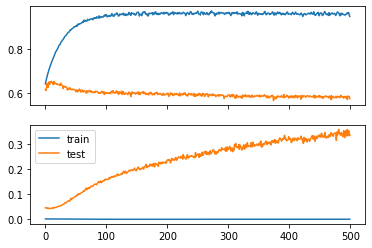

In [57]:
fig, ax = plt.subplots(2,sharex=True)

ax[0].plot(trajectories['train acc'], label='train')
ax[0].plot(trajectories['test acc'], label='test')

ax[1].plot(trajectories['train loss'], label='train')
ax[1].plot(trajectories['test loss'], label='test')

plt.legend()

In [75]:
import torchvision.models as models

In [76]:
alexnet = models.alexnet()

In [77]:
alexnet.classifier[6] = nn.Linear(in_features = 4096, out_features=10, bias=True)

In [78]:
alexnet = alexnet.to(device)

In [80]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [178]:
class Toy(nn.Module):
    def __init__(self):
        super(Toy, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=6, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        self.conv2 = nn.Conv2d(64, 192, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        self.conv3 = nn.Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.conv4 = nn.Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.conv5 = nn.Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        
        self.cls1 = nn.Sequential(nn.Dropout(), nn.Linear(256*3*3, 1024), nn.ReLU())
        self.cls2 = nn.Sequential(nn.Dropout(), nn.Linear(1024, 1024), nn.ReLU())
        self.final = nn.Linear(1024, 10)

    def forward(self, x):
        # features
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool3(F.relu(self.conv5(x)))
        # make a line
        x = x.view(x.size(0), 256*3*3)
        # classifier
        x = self.cls1(x)
        x = self.cls2(x)
        x = self.final(x)
        
#         x = x.view(-1, 16 * 5 * 5)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
        return x

In [201]:
alexnet = Toy().to(device)

In [202]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

all_train = datasets.CIFAR10(root=lc.data_dir, train=True,
                                        download=False, transform=transform)

trainset, valset = torch.utils.data.random_split(all_train, [40_000, 10_000])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True)

valloader = torch.utils.data.DataLoader(valset, batch_size=128,
                                          shuffle=True)

# testset = datasets.CIFAR10(root=lc.data_dir, train=False,
#                                         download=False, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=128,
#                                           shuffle=True)

In [203]:
criterion = nn.CrossEntropyLoss()
optimizer_alex = optim.SGD(alexnet.parameters(), lr=0.01) # no momentum
alex_lr_scheduler = lr_scheduler.StepLR(optimizer_alex, step_size=50, gamma=0.1)

In [204]:
trajectories = {'train loss': [], 'val loss': [], 'train acc': [], 'val acc': []}
counter = 0
for epoch in tqdm(range(500)):  # loop over the dataset multiple times

    running_loss = 0.0
    running_acc = 0.0
    print_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer_alex.zero_grad()

        # forward + backward + optimize
        outputs = alexnet(inputs)
        _, preds = torch.max(outputs, dim=1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_alex.step()

        # print statistics
        running_loss += loss.item()
        print_loss += loss.item()
        running_acc += torch.sum(preds == labels)
        counter += len(preds)
        
        if i % 100 == 99:
            print(f"running loss/minibatch on batch {i} of epoch {epoch}: {print_loss / 100}")
            print_loss = 0.0
        
    alex_lr_scheduler.step()

    epoch_acc = running_acc / len(trainloader.dataset)
    epoch_loss = running_loss / len(trainloader.dataset)
    val_acc, val_loss = evaluate(alexnet, valloader)
    
    trajectories['train loss'].append(epoch_loss)
#     trajectories['val loss'].append(test_loss)
    trajectories['train acc'].append(epoch_acc)
#     trajectories['val acc'].append(test_acc)
    print(f"epoch train accuracy on epoch {epoch}: {epoch_acc}")
    print(f"validation accuracy on epoch {epoch}: {val_acc}")

print('Finished Training')

  0%|                                                                                                                                | 0/500 [00:00<?, ?it/s]

running loss/minibatch on batch 99 of epoch 0: 2.302778844833374
running loss/minibatch on batch 199 of epoch 0: 2.302626488208771
running loss/minibatch on batch 299 of epoch 0: 2.3026553344726564


  0%|▏                                                                                                                     | 1/500 [00:23<3:16:20, 23.61s/it]

epoch train accuracy on epoch 0: 0.1012749969959259
validation accuracy on epoch 0: 0.09959999471902847
running loss/minibatch on batch 99 of epoch 1: 2.3024825978279115
running loss/minibatch on batch 199 of epoch 1: 2.3023910903930664
running loss/minibatch on batch 299 of epoch 1: 2.302547242641449


  0%|▍                                                                                                                     | 2/500 [00:47<3:16:18, 23.65s/it]

epoch train accuracy on epoch 1: 0.10427499562501907
validation accuracy on epoch 1: 0.10989999771118164
running loss/minibatch on batch 99 of epoch 2: 2.302377495765686
running loss/minibatch on batch 199 of epoch 2: 2.302285096645355
running loss/minibatch on batch 299 of epoch 2: 2.3021943020820617


  1%|▋                                                                                                                     | 3/500 [01:10<3:15:27, 23.60s/it]

epoch train accuracy on epoch 2: 0.11699999868869781
validation accuracy on epoch 2: 0.10639999806880951
running loss/minibatch on batch 99 of epoch 3: 2.3020864224433897
running loss/minibatch on batch 199 of epoch 3: 2.3021888160705566
running loss/minibatch on batch 299 of epoch 3: 2.301980426311493


  1%|▉                                                                                                                     | 4/500 [01:34<3:14:40, 23.55s/it]

epoch train accuracy on epoch 3: 0.1069749966263771
validation accuracy on epoch 3: 0.10459999740123749
running loss/minibatch on batch 99 of epoch 4: 2.301930787563324
running loss/minibatch on batch 199 of epoch 4: 2.3017759823799135
running loss/minibatch on batch 299 of epoch 4: 2.301785454750061


  1%|█▏                                                                                                                    | 5/500 [01:57<3:14:26, 23.57s/it]

epoch train accuracy on epoch 4: 0.11837499588727951
validation accuracy on epoch 4: 0.15479999780654907
running loss/minibatch on batch 99 of epoch 5: 2.3015121006965638
running loss/minibatch on batch 199 of epoch 5: 2.301479072570801
running loss/minibatch on batch 299 of epoch 5: 2.301350862979889


  1%|█▍                                                                                                                    | 6/500 [02:21<3:14:32, 23.63s/it]

epoch train accuracy on epoch 5: 0.15444999933242798
validation accuracy on epoch 5: 0.13979999721050262
running loss/minibatch on batch 99 of epoch 6: 2.301079852581024
running loss/minibatch on batch 199 of epoch 6: 2.300829212665558
running loss/minibatch on batch 299 of epoch 6: 2.3006939482688904


  1%|█▋                                                                                                                    | 7/500 [02:45<3:13:50, 23.59s/it]

epoch train accuracy on epoch 6: 0.1616249978542328
validation accuracy on epoch 6: 0.1598999947309494
running loss/minibatch on batch 99 of epoch 7: 2.3002895069122316
running loss/minibatch on batch 199 of epoch 7: 2.2999162912368774
running loss/minibatch on batch 299 of epoch 7: 2.2993930864334104


  2%|█▉                                                                                                                    | 8/500 [03:08<3:13:30, 23.60s/it]

epoch train accuracy on epoch 7: 0.18119999766349792
validation accuracy on epoch 7: 0.1800999939441681
running loss/minibatch on batch 99 of epoch 8: 2.2986599087715147
running loss/minibatch on batch 199 of epoch 8: 2.2979911756515503
running loss/minibatch on batch 299 of epoch 8: 2.296747965812683


  2%|██                                                                                                                    | 9/500 [03:32<3:12:58, 23.58s/it]

epoch train accuracy on epoch 8: 0.18699999153614044
validation accuracy on epoch 8: 0.1979999989271164
running loss/minibatch on batch 99 of epoch 9: 2.2950473999977112
running loss/minibatch on batch 199 of epoch 9: 2.2925970697402955
running loss/minibatch on batch 299 of epoch 9: 2.288632400035858


  2%|██▎                                                                                                                  | 10/500 [03:55<3:12:20, 23.55s/it]

epoch train accuracy on epoch 9: 0.2085999995470047
validation accuracy on epoch 9: 0.2215999960899353
running loss/minibatch on batch 99 of epoch 10: 2.2806934237480165
running loss/minibatch on batch 199 of epoch 10: 2.265571167469025
running loss/minibatch on batch 299 of epoch 10: 2.215641074180603


  2%|██▌                                                                                                                  | 11/500 [04:19<3:13:27, 23.74s/it]

epoch train accuracy on epoch 10: 0.21972499787807465
validation accuracy on epoch 10: 0.20059999823570251
running loss/minibatch on batch 99 of epoch 11: 2.103273832798004
running loss/minibatch on batch 199 of epoch 11: 2.0414032661914825
running loss/minibatch on batch 299 of epoch 11: 2.006392239332199


  2%|██▊                                                                                                                  | 12/500 [04:43<3:12:40, 23.69s/it]

epoch train accuracy on epoch 11: 0.2395000010728836
validation accuracy on epoch 11: 0.25589999556541443
running loss/minibatch on batch 99 of epoch 12: 1.9525067818164825
running loss/minibatch on batch 199 of epoch 12: 1.9309508097171784
running loss/minibatch on batch 299 of epoch 12: 1.8879203522205352


  3%|███                                                                                                                  | 13/500 [05:07<3:11:54, 23.64s/it]

epoch train accuracy on epoch 12: 0.28904998302459717
validation accuracy on epoch 12: 0.27379998564720154
running loss/minibatch on batch 99 of epoch 13: 1.8633531820774079
running loss/minibatch on batch 199 of epoch 13: 1.8271924579143524
running loss/minibatch on batch 299 of epoch 13: 1.808051154613495


  3%|███▎                                                                                                                 | 14/500 [05:30<3:11:03, 23.59s/it]

epoch train accuracy on epoch 13: 0.3200249969959259
validation accuracy on epoch 13: 0.31700000166893005
running loss/minibatch on batch 99 of epoch 14: 1.7824679803848267
running loss/minibatch on batch 199 of epoch 14: 1.7678938388824463
running loss/minibatch on batch 299 of epoch 14: 1.732395316362381


  3%|███▌                                                                                                                 | 15/500 [05:54<3:10:39, 23.59s/it]

epoch train accuracy on epoch 14: 0.34277498722076416
validation accuracy on epoch 14: 0.335099995136261
running loss/minibatch on batch 99 of epoch 15: 1.7087869668006896
running loss/minibatch on batch 199 of epoch 15: 1.703020681142807
running loss/minibatch on batch 299 of epoch 15: 1.6970845794677734


  3%|███▋                                                                                                                 | 16/500 [06:17<3:10:00, 23.55s/it]

epoch train accuracy on epoch 15: 0.3642999827861786
validation accuracy on epoch 15: 0.37359997630119324
running loss/minibatch on batch 99 of epoch 16: 1.663621277809143
running loss/minibatch on batch 199 of epoch 16: 1.678972634077072
running loss/minibatch on batch 299 of epoch 16: 1.6441671991348266


  3%|███▉                                                                                                                 | 17/500 [06:41<3:09:28, 23.54s/it]

epoch train accuracy on epoch 16: 0.3802499771118164
validation accuracy on epoch 16: 0.368399977684021
running loss/minibatch on batch 99 of epoch 17: 1.6347789192199706
running loss/minibatch on batch 199 of epoch 17: 1.6398045027256012
running loss/minibatch on batch 299 of epoch 17: 1.62152756690979


  4%|████▏                                                                                                                | 18/500 [07:04<3:09:07, 23.54s/it]

epoch train accuracy on epoch 17: 0.3909749984741211
validation accuracy on epoch 17: 0.3789999783039093
running loss/minibatch on batch 99 of epoch 18: 1.6141419279575349
running loss/minibatch on batch 199 of epoch 18: 1.6098455739021302
running loss/minibatch on batch 299 of epoch 18: 1.5901697909832


  4%|████▍                                                                                                                | 19/500 [07:28<3:08:51, 23.56s/it]

epoch train accuracy on epoch 18: 0.40264999866485596
validation accuracy on epoch 18: 0.3764999806880951
running loss/minibatch on batch 99 of epoch 19: 1.59005868434906
running loss/minibatch on batch 199 of epoch 19: 1.5720158624649048
running loss/minibatch on batch 299 of epoch 19: 1.552712960243225


  4%|████▋                                                                                                                | 20/500 [07:51<3:08:37, 23.58s/it]

epoch train accuracy on epoch 19: 0.415274977684021
validation accuracy on epoch 19: 0.4074999988079071
running loss/minibatch on batch 99 of epoch 20: 1.5247380566596984
running loss/minibatch on batch 199 of epoch 20: 1.54250692486763
running loss/minibatch on batch 299 of epoch 20: 1.540759265422821


  4%|████▉                                                                                                                | 21/500 [08:15<3:08:14, 23.58s/it]

epoch train accuracy on epoch 20: 0.42867499589920044
validation accuracy on epoch 20: 0.4170999825000763
running loss/minibatch on batch 99 of epoch 21: 1.5100742292404175
running loss/minibatch on batch 199 of epoch 21: 1.5039979696273804
running loss/minibatch on batch 299 of epoch 21: 1.5083900952339173


  4%|█████▏                                                                                                               | 22/500 [08:39<3:07:53, 23.58s/it]

epoch train accuracy on epoch 21: 0.4432999789714813
validation accuracy on epoch 21: 0.4301999807357788
running loss/minibatch on batch 99 of epoch 22: 1.4900885379314424
running loss/minibatch on batch 199 of epoch 22: 1.47659481883049
running loss/minibatch on batch 299 of epoch 22: 1.461309106349945


  5%|█████▍                                                                                                               | 23/500 [09:03<3:09:13, 23.80s/it]

epoch train accuracy on epoch 22: 0.45979997515678406
validation accuracy on epoch 22: 0.45969998836517334
running loss/minibatch on batch 99 of epoch 23: 1.4636212599277496
running loss/minibatch on batch 199 of epoch 23: 1.4384493005275727
running loss/minibatch on batch 299 of epoch 23: 1.4288657319545746


  5%|█████▌                                                                                                               | 24/500 [09:26<3:08:21, 23.74s/it]

epoch train accuracy on epoch 23: 0.46779999136924744
validation accuracy on epoch 23: 0.47929999232292175
running loss/minibatch on batch 99 of epoch 24: 1.4199948287010193
running loss/minibatch on batch 199 of epoch 24: 1.4214634430408477
running loss/minibatch on batch 299 of epoch 24: 1.4103254330158235


  5%|█████▊                                                                                                               | 25/500 [09:50<3:07:02, 23.63s/it]

epoch train accuracy on epoch 24: 0.4827999770641327
validation accuracy on epoch 24: 0.4608999788761139
running loss/minibatch on batch 99 of epoch 25: 1.408617296218872
running loss/minibatch on batch 199 of epoch 25: 1.3769271492958068
running loss/minibatch on batch 299 of epoch 25: 1.3980154120922088


  5%|██████                                                                                                               | 26/500 [10:13<3:05:59, 23.54s/it]

epoch train accuracy on epoch 25: 0.49242499470710754
validation accuracy on epoch 25: 0.45389997959136963
running loss/minibatch on batch 99 of epoch 26: 1.377161512374878
running loss/minibatch on batch 199 of epoch 26: 1.3600830054283142
running loss/minibatch on batch 299 of epoch 26: 1.3594904375076293


  5%|██████▎                                                                                                              | 27/500 [10:37<3:05:51, 23.58s/it]

epoch train accuracy on epoch 26: 0.5032749772071838
validation accuracy on epoch 26: 0.48089998960494995
running loss/minibatch on batch 99 of epoch 27: 1.352488430738449
running loss/minibatch on batch 199 of epoch 27: 1.3347390007972717
running loss/minibatch on batch 299 of epoch 27: 1.3338177037239074


  6%|██████▌                                                                                                              | 28/500 [11:02<3:08:07, 23.91s/it]

epoch train accuracy on epoch 27: 0.5142250061035156
validation accuracy on epoch 27: 0.43860000371932983
running loss/minibatch on batch 99 of epoch 28: 1.3222369122505189
running loss/minibatch on batch 199 of epoch 28: 1.3459833371639252
running loss/minibatch on batch 299 of epoch 28: 1.2948515689373017


  6%|██████▊                                                                                                              | 29/500 [11:26<3:08:40, 24.03s/it]

epoch train accuracy on epoch 28: 0.5222749710083008
validation accuracy on epoch 28: 0.502299964427948
running loss/minibatch on batch 99 of epoch 29: 1.3104361188411713
running loss/minibatch on batch 199 of epoch 29: 1.2761650335788728
running loss/minibatch on batch 299 of epoch 29: 1.2864372146129608


  6%|███████                                                                                                              | 30/500 [11:49<3:06:58, 23.87s/it]

epoch train accuracy on epoch 29: 0.5322749614715576
validation accuracy on epoch 29: 0.5175999999046326
running loss/minibatch on batch 99 of epoch 30: 1.2799614799022674
running loss/minibatch on batch 199 of epoch 30: 1.276798015832901
running loss/minibatch on batch 299 of epoch 30: 1.2740143287181853


  6%|███████▎                                                                                                             | 31/500 [12:13<3:05:41, 23.76s/it]

epoch train accuracy on epoch 30: 0.5406500101089478
validation accuracy on epoch 30: 0.5403000116348267
running loss/minibatch on batch 99 of epoch 31: 1.2462215840816497
running loss/minibatch on batch 199 of epoch 31: 1.2596803569793702
running loss/minibatch on batch 299 of epoch 31: 1.2436841797828675


  6%|███████▍                                                                                                             | 32/500 [12:36<3:04:28, 23.65s/it]

epoch train accuracy on epoch 31: 0.548550009727478
validation accuracy on epoch 31: 0.5396000146865845
running loss/minibatch on batch 99 of epoch 32: 1.242889589071274
running loss/minibatch on batch 199 of epoch 32: 1.2174232256412507
running loss/minibatch on batch 299 of epoch 32: 1.2269733154773712


  7%|███████▋                                                                                                             | 33/500 [13:00<3:04:26, 23.70s/it]

epoch train accuracy on epoch 32: 0.5564000010490417
validation accuracy on epoch 32: 0.5462999939918518
running loss/minibatch on batch 99 of epoch 33: 1.2241497343778611
running loss/minibatch on batch 199 of epoch 33: 1.192892497777939
running loss/minibatch on batch 299 of epoch 33: 1.1898754805326461


  7%|███████▉                                                                                                             | 34/500 [13:23<3:03:17, 23.60s/it]

epoch train accuracy on epoch 33: 0.5686749815940857
validation accuracy on epoch 33: 0.5493000149726868
running loss/minibatch on batch 99 of epoch 34: 1.1864587444067
running loss/minibatch on batch 199 of epoch 34: 1.1685753363370894
running loss/minibatch on batch 299 of epoch 34: 1.1856867265701294


  7%|████████▏                                                                                                            | 35/500 [13:47<3:02:28, 23.54s/it]

epoch train accuracy on epoch 34: 0.5746749639511108
validation accuracy on epoch 34: 0.5613999962806702
running loss/minibatch on batch 99 of epoch 35: 1.1553107678890229
running loss/minibatch on batch 199 of epoch 35: 1.160805377960205
running loss/minibatch on batch 299 of epoch 35: 1.1620390284061433


  7%|████████▍                                                                                                            | 36/500 [14:10<3:02:11, 23.56s/it]

epoch train accuracy on epoch 35: 0.5813499689102173
validation accuracy on epoch 35: 0.552899956703186
running loss/minibatch on batch 99 of epoch 36: 1.1491452783346177
running loss/minibatch on batch 199 of epoch 36: 1.1305305308103561
running loss/minibatch on batch 299 of epoch 36: 1.141240114569664


  7%|████████▋                                                                                                            | 37/500 [14:34<3:02:16, 23.62s/it]

epoch train accuracy on epoch 36: 0.588949978351593
validation accuracy on epoch 36: 0.5447999835014343
running loss/minibatch on batch 99 of epoch 37: 1.124174755215645
running loss/minibatch on batch 199 of epoch 37: 1.1090340894460677
running loss/minibatch on batch 299 of epoch 37: 1.114727753996849


  8%|████████▉                                                                                                            | 38/500 [14:58<3:01:36, 23.59s/it]

epoch train accuracy on epoch 37: 0.5982499718666077
validation accuracy on epoch 37: 0.5719999670982361
running loss/minibatch on batch 99 of epoch 38: 1.0945657807588578
running loss/minibatch on batch 199 of epoch 38: 1.1147495883703231
running loss/minibatch on batch 299 of epoch 38: 1.1053428155183793


  8%|█████████▏                                                                                                           | 39/500 [15:21<3:00:40, 23.52s/it]

epoch train accuracy on epoch 38: 0.6044999957084656
validation accuracy on epoch 38: 0.590499997138977
running loss/minibatch on batch 99 of epoch 39: 1.0750311654806137
running loss/minibatch on batch 199 of epoch 39: 1.0859496116638183
running loss/minibatch on batch 299 of epoch 39: 1.0807660752534867


  8%|█████████▎                                                                                                           | 40/500 [15:45<3:00:54, 23.60s/it]

epoch train accuracy on epoch 39: 0.609874963760376
validation accuracy on epoch 39: 0.5852999687194824
running loss/minibatch on batch 99 of epoch 40: 1.084001340866089
running loss/minibatch on batch 199 of epoch 40: 1.0578841543197632
running loss/minibatch on batch 299 of epoch 40: 1.0594767719507217


  8%|█████████▌                                                                                                           | 41/500 [16:08<3:00:36, 23.61s/it]

epoch train accuracy on epoch 40: 0.6172249913215637
validation accuracy on epoch 40: 0.598800003528595
running loss/minibatch on batch 99 of epoch 41: 1.0569907927513122
running loss/minibatch on batch 199 of epoch 41: 1.0245729166269302
running loss/minibatch on batch 299 of epoch 41: 1.0594204670190812


  8%|█████████▊                                                                                                           | 42/500 [16:32<2:59:43, 23.54s/it]

epoch train accuracy on epoch 41: 0.6239500045776367
validation accuracy on epoch 41: 0.604699969291687
running loss/minibatch on batch 99 of epoch 42: 1.0431469178199768
running loss/minibatch on batch 199 of epoch 42: 1.0262546974420548
running loss/minibatch on batch 299 of epoch 42: 1.024572519659996


  9%|██████████                                                                                                           | 43/500 [16:55<2:59:06, 23.52s/it]

epoch train accuracy on epoch 42: 0.6295749545097351
validation accuracy on epoch 42: 0.5722999572753906
running loss/minibatch on batch 99 of epoch 43: 1.0207218772172928
running loss/minibatch on batch 199 of epoch 43: 1.0080039554834366
running loss/minibatch on batch 299 of epoch 43: 1.0003461295366287


  9%|██████████▎                                                                                                          | 44/500 [17:19<2:58:48, 23.53s/it]

epoch train accuracy on epoch 43: 0.6372500061988831
validation accuracy on epoch 43: 0.5988999605178833
running loss/minibatch on batch 99 of epoch 44: 1.0135005098581313
running loss/minibatch on batch 199 of epoch 44: 0.9841765975952148
running loss/minibatch on batch 299 of epoch 44: 0.9935870164632797


  9%|██████████▌                                                                                                          | 45/500 [17:42<2:58:22, 23.52s/it]

epoch train accuracy on epoch 44: 0.6430749893188477
validation accuracy on epoch 44: 0.621399998664856
running loss/minibatch on batch 99 of epoch 45: 0.9840538316965103
running loss/minibatch on batch 199 of epoch 45: 0.9765251457691193
running loss/minibatch on batch 299 of epoch 45: 0.9814516061544418


  9%|██████████▊                                                                                                          | 46/500 [18:06<2:57:41, 23.48s/it]

epoch train accuracy on epoch 45: 0.6485249996185303
validation accuracy on epoch 45: 0.6304999589920044
running loss/minibatch on batch 99 of epoch 46: 0.9649092298746109
running loss/minibatch on batch 199 of epoch 46: 0.9608128947019577
running loss/minibatch on batch 299 of epoch 46: 0.9616241323947906


  9%|██████████▉                                                                                                          | 47/500 [18:29<2:57:08, 23.46s/it]

epoch train accuracy on epoch 46: 0.6552249789237976
validation accuracy on epoch 46: 0.6230999827384949
running loss/minibatch on batch 99 of epoch 47: 0.9582112872600556
running loss/minibatch on batch 199 of epoch 47: 0.9383585554361343
running loss/minibatch on batch 299 of epoch 47: 0.9484306126832962


 10%|███████████▏                                                                                                         | 48/500 [18:53<2:57:49, 23.60s/it]

epoch train accuracy on epoch 47: 0.6590249538421631
validation accuracy on epoch 47: 0.6313999891281128
running loss/minibatch on batch 99 of epoch 48: 0.9331836140155793
running loss/minibatch on batch 199 of epoch 48: 0.9219130510091782
running loss/minibatch on batch 299 of epoch 48: 0.9276435893774032


 10%|███████████▍                                                                                                         | 49/500 [19:17<2:58:21, 23.73s/it]

epoch train accuracy on epoch 48: 0.6678749918937683
validation accuracy on epoch 48: 0.6354999542236328
running loss/minibatch on batch 99 of epoch 49: 0.9101182514429093
running loss/minibatch on batch 199 of epoch 49: 0.9078491407632828
running loss/minibatch on batch 299 of epoch 49: 0.9219709157943725


 10%|███████████▋                                                                                                         | 50/500 [19:41<2:57:44, 23.70s/it]

epoch train accuracy on epoch 49: 0.6743999719619751
validation accuracy on epoch 49: 0.6372999548912048
running loss/minibatch on batch 99 of epoch 50: 0.8337354910373688
running loss/minibatch on batch 199 of epoch 50: 0.8311088079214096
running loss/minibatch on batch 299 of epoch 50: 0.8456420379877091


 10%|███████████▉                                                                                                         | 51/500 [20:04<2:56:35, 23.60s/it]

epoch train accuracy on epoch 50: 0.701574981212616
validation accuracy on epoch 50: 0.6644999980926514
running loss/minibatch on batch 99 of epoch 51: 0.8308854049444199
running loss/minibatch on batch 199 of epoch 51: 0.8184019565582276
running loss/minibatch on batch 299 of epoch 51: 0.8347158801555633


 10%|████████████▏                                                                                                        | 52/500 [20:27<2:55:42, 23.53s/it]

epoch train accuracy on epoch 51: 0.7050749659538269
validation accuracy on epoch 51: 0.6668999791145325
running loss/minibatch on batch 99 of epoch 52: 0.8289241725206375
running loss/minibatch on batch 199 of epoch 52: 0.8166016829013825
running loss/minibatch on batch 299 of epoch 52: 0.8215799844264984


 11%|████████████▍                                                                                                        | 53/500 [20:51<2:55:17, 23.53s/it]

epoch train accuracy on epoch 52: 0.707349956035614
validation accuracy on epoch 52: 0.6667999625205994
running loss/minibatch on batch 99 of epoch 53: 0.7987616467475891
running loss/minibatch on batch 199 of epoch 53: 0.8262256103754043
running loss/minibatch on batch 299 of epoch 53: 0.8348857367038727


 11%|████████████▋                                                                                                        | 54/500 [21:14<2:54:44, 23.51s/it]

epoch train accuracy on epoch 53: 0.7087500095367432
validation accuracy on epoch 53: 0.670699954032898
running loss/minibatch on batch 99 of epoch 54: 0.8125355881452561
running loss/minibatch on batch 199 of epoch 54: 0.8188040775060653
running loss/minibatch on batch 299 of epoch 54: 0.8209684413671493


 11%|████████████▊                                                                                                        | 55/500 [21:38<2:54:27, 23.52s/it]

epoch train accuracy on epoch 54: 0.7098999619483948
validation accuracy on epoch 54: 0.668999969959259
running loss/minibatch on batch 99 of epoch 55: 0.812984339594841
running loss/minibatch on batch 199 of epoch 55: 0.8197372710704803
running loss/minibatch on batch 299 of epoch 55: 0.8042764306068421


 11%|█████████████                                                                                                        | 56/500 [22:02<2:54:58, 23.64s/it]

epoch train accuracy on epoch 55: 0.710224986076355
validation accuracy on epoch 55: 0.66839998960495
running loss/minibatch on batch 99 of epoch 56: 0.8126928395032883
running loss/minibatch on batch 199 of epoch 56: 0.8151770412921906
running loss/minibatch on batch 299 of epoch 56: 0.8060079556703568


 11%|█████████████▎                                                                                                       | 57/500 [22:26<2:54:44, 23.67s/it]

epoch train accuracy on epoch 56: 0.7109749913215637
validation accuracy on epoch 56: 0.6690999865531921
running loss/minibatch on batch 99 of epoch 57: 0.7984113746881485
running loss/minibatch on batch 199 of epoch 57: 0.8207481354475021
running loss/minibatch on batch 299 of epoch 57: 0.8065591835975647


 12%|█████████████▌                                                                                                       | 58/500 [22:49<2:54:07, 23.64s/it]

epoch train accuracy on epoch 57: 0.7128250002861023
validation accuracy on epoch 57: 0.6714999675750732
running loss/minibatch on batch 99 of epoch 58: 0.8051533007621765
running loss/minibatch on batch 199 of epoch 58: 0.7973210787773133
running loss/minibatch on batch 299 of epoch 58: 0.8112156903743744


 12%|█████████████▊                                                                                                       | 59/500 [23:13<2:53:32, 23.61s/it]

epoch train accuracy on epoch 58: 0.713949978351593
validation accuracy on epoch 58: 0.6753999590873718
running loss/minibatch on batch 99 of epoch 59: 0.8014434653520585
running loss/minibatch on batch 199 of epoch 59: 0.8022567117214203
running loss/minibatch on batch 299 of epoch 59: 0.8073131138086319


 12%|██████████████                                                                                                       | 60/500 [23:36<2:52:52, 23.57s/it]

epoch train accuracy on epoch 59: 0.7124750018119812
validation accuracy on epoch 59: 0.6739000082015991
running loss/minibatch on batch 99 of epoch 60: 0.7908754640817642
running loss/minibatch on batch 199 of epoch 60: 0.8074640411138535
running loss/minibatch on batch 299 of epoch 60: 0.8049232798814774


 12%|██████████████▎                                                                                                      | 61/500 [24:01<2:54:01, 23.79s/it]

epoch train accuracy on epoch 60: 0.7150999903678894
validation accuracy on epoch 60: 0.675000011920929
running loss/minibatch on batch 99 of epoch 61: 0.7911135822534561
running loss/minibatch on batch 199 of epoch 61: 0.8030988758802414
running loss/minibatch on batch 299 of epoch 61: 0.7974443036317825


 12%|██████████████▌                                                                                                      | 62/500 [24:24<2:53:27, 23.76s/it]

epoch train accuracy on epoch 61: 0.715999960899353
validation accuracy on epoch 61: 0.6751999855041504
running loss/minibatch on batch 99 of epoch 62: 0.7954131972789764
running loss/minibatch on batch 199 of epoch 62: 0.7862930071353912
running loss/minibatch on batch 299 of epoch 62: 0.8114076924324035


 13%|██████████████▋                                                                                                      | 63/500 [24:48<2:52:59, 23.75s/it]

epoch train accuracy on epoch 62: 0.7181999683380127
validation accuracy on epoch 62: 0.6775000095367432
running loss/minibatch on batch 99 of epoch 63: 0.7946637910604477
running loss/minibatch on batch 199 of epoch 63: 0.7821197789907456
running loss/minibatch on batch 299 of epoch 63: 0.7999640774726867


 13%|██████████████▉                                                                                                      | 64/500 [25:12<2:52:12, 23.70s/it]

epoch train accuracy on epoch 63: 0.7177749872207642
validation accuracy on epoch 63: 0.6739999651908875
running loss/minibatch on batch 99 of epoch 64: 0.7844251108169555
running loss/minibatch on batch 199 of epoch 64: 0.7927701407670975
running loss/minibatch on batch 299 of epoch 64: 0.7908173716068267


 13%|███████████████▏                                                                                                     | 65/500 [25:35<2:51:23, 23.64s/it]

epoch train accuracy on epoch 64: 0.7202749848365784
validation accuracy on epoch 64: 0.6783999800682068
running loss/minibatch on batch 99 of epoch 65: 0.7913765150308609
running loss/minibatch on batch 199 of epoch 65: 0.7819488000869751
running loss/minibatch on batch 299 of epoch 65: 0.7847772735357285


 13%|███████████████▍                                                                                                     | 66/500 [25:59<2:50:47, 23.61s/it]

epoch train accuracy on epoch 65: 0.7207249999046326
validation accuracy on epoch 65: 0.6764000058174133
running loss/minibatch on batch 99 of epoch 66: 0.7821532130241394
running loss/minibatch on batch 199 of epoch 66: 0.7891419202089309
running loss/minibatch on batch 299 of epoch 66: 0.7850661104917527


 13%|███████████████▋                                                                                                     | 67/500 [26:22<2:50:49, 23.67s/it]

epoch train accuracy on epoch 66: 0.7214249968528748
validation accuracy on epoch 66: 0.6814000010490417
running loss/minibatch on batch 99 of epoch 67: 0.7885801720619202
running loss/minibatch on batch 199 of epoch 67: 0.7765934020280838
running loss/minibatch on batch 299 of epoch 67: 0.7849285584688187


 14%|███████████████▉                                                                                                     | 68/500 [26:46<2:50:57, 23.74s/it]

epoch train accuracy on epoch 67: 0.7222749590873718
validation accuracy on epoch 67: 0.6794999837875366
running loss/minibatch on batch 99 of epoch 68: 0.7727540588378906
running loss/minibatch on batch 199 of epoch 68: 0.782991064786911
running loss/minibatch on batch 299 of epoch 68: 0.7817253643274307


 14%|████████████████▏                                                                                                    | 69/500 [27:10<2:50:41, 23.76s/it]

epoch train accuracy on epoch 68: 0.7215499877929688
validation accuracy on epoch 68: 0.6803999543190002
running loss/minibatch on batch 99 of epoch 69: 0.7673755407333374
running loss/minibatch on batch 199 of epoch 69: 0.7721783155202866
running loss/minibatch on batch 299 of epoch 69: 0.788335382938385


 14%|████████████████▍                                                                                                    | 70/500 [27:34<2:50:39, 23.81s/it]

epoch train accuracy on epoch 69: 0.7243750095367432
validation accuracy on epoch 69: 0.6818000078201294
running loss/minibatch on batch 99 of epoch 70: 0.7718608522415161
running loss/minibatch on batch 199 of epoch 70: 0.7652443307638168
running loss/minibatch on batch 299 of epoch 70: 0.7854859554767608


 14%|████████████████▌                                                                                                    | 71/500 [27:58<2:50:20, 23.82s/it]

epoch train accuracy on epoch 70: 0.726224958896637
validation accuracy on epoch 70: 0.6793000102043152
running loss/minibatch on batch 99 of epoch 71: 0.7853047400712967
running loss/minibatch on batch 199 of epoch 71: 0.7670457750558853
running loss/minibatch on batch 299 of epoch 71: 0.7625436902046203


 14%|████████████████▊                                                                                                    | 72/500 [28:22<2:50:02, 23.84s/it]

epoch train accuracy on epoch 71: 0.7270249724388123
validation accuracy on epoch 71: 0.6818999648094177
running loss/minibatch on batch 99 of epoch 72: 0.7831737530231476
running loss/minibatch on batch 199 of epoch 72: 0.7572454220056534
running loss/minibatch on batch 299 of epoch 72: 0.7753696024417878


 15%|█████████████████                                                                                                    | 73/500 [28:46<2:49:29, 23.82s/it]

epoch train accuracy on epoch 72: 0.7277249693870544
validation accuracy on epoch 72: 0.6850999593734741
running loss/minibatch on batch 99 of epoch 73: 0.7771935623884201
running loss/minibatch on batch 199 of epoch 73: 0.7645351678133011
running loss/minibatch on batch 299 of epoch 73: 0.7649258810281754


 15%|█████████████████▎                                                                                                   | 74/500 [29:09<2:48:44, 23.77s/it]

epoch train accuracy on epoch 73: 0.7279499769210815
validation accuracy on epoch 73: 0.6830999851226807
running loss/minibatch on batch 99 of epoch 74: 0.7653690350055694
running loss/minibatch on batch 199 of epoch 74: 0.7669149315357209
running loss/minibatch on batch 299 of epoch 74: 0.7676013529300689


 15%|█████████████████▌                                                                                                   | 75/500 [29:33<2:48:24, 23.77s/it]

epoch train accuracy on epoch 74: 0.7287499904632568
validation accuracy on epoch 74: 0.6834999918937683
running loss/minibatch on batch 99 of epoch 75: 0.7680457156896591
running loss/minibatch on batch 199 of epoch 75: 0.75967335999012
running loss/minibatch on batch 299 of epoch 75: 0.7650384223461151


 15%|█████████████████▊                                                                                                   | 76/500 [29:57<2:47:59, 23.77s/it]

epoch train accuracy on epoch 75: 0.7300999760627747
validation accuracy on epoch 75: 0.6832000017166138
running loss/minibatch on batch 99 of epoch 76: 0.7573576337099075
running loss/minibatch on batch 199 of epoch 76: 0.7680158686637878
running loss/minibatch on batch 299 of epoch 76: 0.758749440908432


 15%|██████████████████                                                                                                   | 77/500 [30:21<2:47:38, 23.78s/it]

epoch train accuracy on epoch 76: 0.7303499579429626
validation accuracy on epoch 76: 0.684499979019165
running loss/minibatch on batch 99 of epoch 77: 0.7535337114334106
running loss/minibatch on batch 199 of epoch 77: 0.7588891083002091
running loss/minibatch on batch 299 of epoch 77: 0.7631995993852615


 16%|██████████████████▎                                                                                                  | 78/500 [30:44<2:46:57, 23.74s/it]

epoch train accuracy on epoch 77: 0.7333250045776367
validation accuracy on epoch 77: 0.6850999593734741
running loss/minibatch on batch 99 of epoch 78: 0.7614823561906815
running loss/minibatch on batch 199 of epoch 78: 0.7647259658575059
running loss/minibatch on batch 299 of epoch 78: 0.7454807430505752


 16%|██████████████████▍                                                                                                  | 79/500 [31:08<2:46:20, 23.71s/it]

epoch train accuracy on epoch 78: 0.733299970626831
validation accuracy on epoch 78: 0.6858999729156494
running loss/minibatch on batch 99 of epoch 79: 0.7496266698837281
running loss/minibatch on batch 199 of epoch 79: 0.7585395610332489
running loss/minibatch on batch 299 of epoch 79: 0.7561214971542358


 16%|██████████████████▋                                                                                                  | 80/500 [31:32<2:46:13, 23.75s/it]

epoch train accuracy on epoch 79: 0.733424961566925
validation accuracy on epoch 79: 0.6890999674797058
running loss/minibatch on batch 99 of epoch 80: 0.759232097864151
running loss/minibatch on batch 199 of epoch 80: 0.7401112771034241
running loss/minibatch on batch 299 of epoch 80: 0.7518452906608581


 16%|██████████████████▉                                                                                                  | 81/500 [31:57<2:49:38, 24.29s/it]

epoch train accuracy on epoch 80: 0.7347750067710876
validation accuracy on epoch 80: 0.6890999674797058
running loss/minibatch on batch 99 of epoch 81: 0.7424476486444473
running loss/minibatch on batch 199 of epoch 81: 0.7475695770978927
running loss/minibatch on batch 299 of epoch 81: 0.7584963390231132


 16%|███████████████████▏                                                                                                 | 82/500 [32:23<2:52:13, 24.72s/it]

epoch train accuracy on epoch 81: 0.7355999946594238
validation accuracy on epoch 81: 0.6890000104904175
running loss/minibatch on batch 99 of epoch 82: 0.7557112777233124
running loss/minibatch on batch 199 of epoch 82: 0.7399979817867279
running loss/minibatch on batch 299 of epoch 82: 0.7518460422754287


 17%|███████████████████▍                                                                                                 | 83/500 [32:48<2:52:50, 24.87s/it]

epoch train accuracy on epoch 82: 0.7363249659538269
validation accuracy on epoch 82: 0.6904999613761902
running loss/minibatch on batch 99 of epoch 83: 0.7441183644533157
running loss/minibatch on batch 199 of epoch 83: 0.7452238786220551
running loss/minibatch on batch 299 of epoch 83: 0.7481001925468445


 17%|███████████████████▋                                                                                                 | 84/500 [33:12<2:50:27, 24.59s/it]

epoch train accuracy on epoch 83: 0.7361999750137329
validation accuracy on epoch 83: 0.6920999884605408
running loss/minibatch on batch 99 of epoch 84: 0.7446108025312423
running loss/minibatch on batch 199 of epoch 84: 0.7502229315042496
running loss/minibatch on batch 299 of epoch 84: 0.7357760971784592


 17%|███████████████████▉                                                                                                 | 85/500 [33:36<2:48:36, 24.38s/it]

epoch train accuracy on epoch 84: 0.737975001335144
validation accuracy on epoch 84: 0.6944999694824219
running loss/minibatch on batch 99 of epoch 85: 0.7487358921766281
running loss/minibatch on batch 199 of epoch 85: 0.7286230129003525
running loss/minibatch on batch 299 of epoch 85: 0.7460725003480911


 17%|████████████████████                                                                                                 | 86/500 [34:00<2:46:42, 24.16s/it]

epoch train accuracy on epoch 85: 0.7391499876976013
validation accuracy on epoch 85: 0.69159996509552
running loss/minibatch on batch 99 of epoch 86: 0.7525396907329559
running loss/minibatch on batch 199 of epoch 86: 0.7178902006149293
running loss/minibatch on batch 299 of epoch 86: 0.7448033934831619


 17%|████████████████████▎                                                                                                | 87/500 [34:24<2:46:24, 24.17s/it]

epoch train accuracy on epoch 86: 0.739799976348877
validation accuracy on epoch 86: 0.6922999620437622
running loss/minibatch on batch 99 of epoch 87: 0.7513662976026535
running loss/minibatch on batch 199 of epoch 87: 0.7252810263633728
running loss/minibatch on batch 299 of epoch 87: 0.737963753938675


 18%|████████████████████▌                                                                                                | 88/500 [34:50<2:49:39, 24.71s/it]

epoch train accuracy on epoch 87: 0.7426499724388123
validation accuracy on epoch 87: 0.6951999664306641
running loss/minibatch on batch 99 of epoch 88: 0.7302841997146606
running loss/minibatch on batch 199 of epoch 88: 0.7446003592014313
running loss/minibatch on batch 299 of epoch 88: 0.7290201765298844


 18%|████████████████████▊                                                                                                | 89/500 [35:14<2:48:30, 24.60s/it]

epoch train accuracy on epoch 88: 0.7424749732017517
validation accuracy on epoch 88: 0.6933000087738037
running loss/minibatch on batch 99 of epoch 89: 0.7349836230278015
running loss/minibatch on batch 199 of epoch 89: 0.7352876651287079
running loss/minibatch on batch 299 of epoch 89: 0.7244978642463684


 18%|█████████████████████                                                                                                | 90/500 [35:39<2:48:03, 24.59s/it]

epoch train accuracy on epoch 89: 0.7425249814987183
validation accuracy on epoch 89: 0.6900999546051025
running loss/minibatch on batch 99 of epoch 90: 0.7244050389528275
running loss/minibatch on batch 199 of epoch 90: 0.7370892840623856
running loss/minibatch on batch 299 of epoch 90: 0.7283430224657059


 18%|█████████████████████▎                                                                                               | 91/500 [36:03<2:46:23, 24.41s/it]

epoch train accuracy on epoch 90: 0.7439999580383301
validation accuracy on epoch 90: 0.6972999572753906
running loss/minibatch on batch 99 of epoch 91: 0.7340571856498719
running loss/minibatch on batch 199 of epoch 91: 0.7229823607206345
running loss/minibatch on batch 299 of epoch 91: 0.7294840550422669


 18%|█████████████████████▌                                                                                               | 92/500 [36:27<2:45:05, 24.28s/it]

epoch train accuracy on epoch 91: 0.745074987411499
validation accuracy on epoch 91: 0.693399965763092
running loss/minibatch on batch 99 of epoch 92: 0.7155889010429383
running loss/minibatch on batch 199 of epoch 92: 0.7352185356616974
running loss/minibatch on batch 299 of epoch 92: 0.724478240609169


 19%|█████████████████████▊                                                                                               | 93/500 [36:52<2:47:35, 24.71s/it]

epoch train accuracy on epoch 92: 0.7441499829292297
validation accuracy on epoch 92: 0.6929000020027161
running loss/minibatch on batch 99 of epoch 93: 0.7247535747289657
running loss/minibatch on batch 199 of epoch 93: 0.7231244206428528
running loss/minibatch on batch 299 of epoch 93: 0.7234073889255523


 19%|█████████████████████▉                                                                                               | 94/500 [37:17<2:46:00, 24.53s/it]

epoch train accuracy on epoch 93: 0.746275007724762
validation accuracy on epoch 93: 0.6967999935150146
running loss/minibatch on batch 99 of epoch 94: 0.7244865679740906
running loss/minibatch on batch 199 of epoch 94: 0.7308196198940277
running loss/minibatch on batch 299 of epoch 94: 0.7075499945878982


 19%|██████████████████████▏                                                                                              | 95/500 [37:40<2:44:03, 24.30s/it]

epoch train accuracy on epoch 94: 0.7468000054359436
validation accuracy on epoch 94: 0.696399986743927
running loss/minibatch on batch 99 of epoch 95: 0.7124038940668106
running loss/minibatch on batch 199 of epoch 95: 0.7148606759309769
running loss/minibatch on batch 299 of epoch 95: 0.7248274058103561


 19%|██████████████████████▍                                                                                              | 96/500 [38:05<2:43:54, 24.34s/it]

epoch train accuracy on epoch 95: 0.74652498960495
validation accuracy on epoch 95: 0.6977999806404114
running loss/minibatch on batch 99 of epoch 96: 0.7223046913743019
running loss/minibatch on batch 199 of epoch 96: 0.7117880511283875
running loss/minibatch on batch 299 of epoch 96: 0.7155241966247559


 19%|██████████████████████▋                                                                                              | 97/500 [38:29<2:42:38, 24.22s/it]

epoch train accuracy on epoch 96: 0.748449981212616
validation accuracy on epoch 96: 0.698199987411499
running loss/minibatch on batch 99 of epoch 97: 0.7108248430490494
running loss/minibatch on batch 199 of epoch 97: 0.7087636563181877
running loss/minibatch on batch 299 of epoch 97: 0.7187065491080284


 20%|██████████████████████▉                                                                                              | 98/500 [38:53<2:42:45, 24.29s/it]

epoch train accuracy on epoch 97: 0.74857497215271
validation accuracy on epoch 97: 0.6987999677658081
running loss/minibatch on batch 99 of epoch 98: 0.7171791827678681
running loss/minibatch on batch 199 of epoch 98: 0.7067857021093369
running loss/minibatch on batch 299 of epoch 98: 0.7156745374202729


 20%|███████████████████████▏                                                                                             | 99/500 [39:17<2:41:39, 24.19s/it]

epoch train accuracy on epoch 98: 0.7494249939918518
validation accuracy on epoch 98: 0.6979999542236328
running loss/minibatch on batch 99 of epoch 99: 0.7115176078677178
running loss/minibatch on batch 199 of epoch 99: 0.7179680132865905
running loss/minibatch on batch 299 of epoch 99: 0.7045055413246155


 20%|███████████████████████▏                                                                                            | 100/500 [39:42<2:41:45, 24.26s/it]

epoch train accuracy on epoch 99: 0.750249981880188
validation accuracy on epoch 99: 0.7009999752044678
running loss/minibatch on batch 99 of epoch 100: 0.7090083038806916
running loss/minibatch on batch 199 of epoch 100: 0.6980508399009705
running loss/minibatch on batch 299 of epoch 100: 0.6988063311576843


 20%|███████████████████████▍                                                                                            | 101/500 [40:05<2:40:42, 24.17s/it]

epoch train accuracy on epoch 100: 0.7546749711036682
validation accuracy on epoch 100: 0.703499972820282
running loss/minibatch on batch 99 of epoch 101: 0.6914626142382622
running loss/minibatch on batch 199 of epoch 101: 0.6935593178868293
running loss/minibatch on batch 299 of epoch 101: 0.7133734303712845


 20%|███████████████████████▋                                                                                            | 102/500 [40:29<2:39:26, 24.04s/it]

epoch train accuracy on epoch 101: 0.7543999552726746
validation accuracy on epoch 101: 0.703000009059906
running loss/minibatch on batch 99 of epoch 102: 0.7028466215729714
running loss/minibatch on batch 199 of epoch 102: 0.6996321183443069
running loss/minibatch on batch 299 of epoch 102: 0.6984204241633415


 21%|███████████████████████▉                                                                                            | 103/500 [40:54<2:39:49, 24.15s/it]

epoch train accuracy on epoch 102: 0.7540749907493591
validation accuracy on epoch 102: 0.703499972820282
running loss/minibatch on batch 99 of epoch 103: 0.7033662930130958
running loss/minibatch on batch 199 of epoch 103: 0.6966850137710572
running loss/minibatch on batch 299 of epoch 103: 0.69935611307621


 21%|████████████████████████▏                                                                                           | 104/500 [41:18<2:39:34, 24.18s/it]

epoch train accuracy on epoch 103: 0.7551499605178833
validation accuracy on epoch 103: 0.7014999985694885
running loss/minibatch on batch 99 of epoch 104: 0.7094111233949661
running loss/minibatch on batch 199 of epoch 104: 0.7048721843957901
running loss/minibatch on batch 299 of epoch 104: 0.6827582603693009


 21%|████████████████████████▎                                                                                           | 105/500 [41:42<2:39:07, 24.17s/it]

epoch train accuracy on epoch 104: 0.7546499967575073
validation accuracy on epoch 104: 0.7026999592781067
running loss/minibatch on batch 99 of epoch 105: 0.7071008843183517
running loss/minibatch on batch 199 of epoch 105: 0.6935803264379501
running loss/minibatch on batch 299 of epoch 105: 0.698183985054493


 21%|████████████████████████▌                                                                                           | 106/500 [42:06<2:37:52, 24.04s/it]

epoch train accuracy on epoch 105: 0.755174994468689
validation accuracy on epoch 105: 0.7032999992370605
running loss/minibatch on batch 99 of epoch 106: 0.701317697763443
running loss/minibatch on batch 199 of epoch 106: 0.7034344393014907
running loss/minibatch on batch 299 of epoch 106: 0.6927531683444976


 21%|████████████████████████▊                                                                                           | 107/500 [42:30<2:37:09, 23.99s/it]

epoch train accuracy on epoch 106: 0.7547999620437622
validation accuracy on epoch 106: 0.7026999592781067
running loss/minibatch on batch 99 of epoch 107: 0.6974089074134827
running loss/minibatch on batch 199 of epoch 107: 0.7025683522224426
running loss/minibatch on batch 299 of epoch 107: 0.7003316593170166


 22%|█████████████████████████                                                                                           | 108/500 [42:54<2:37:47, 24.15s/it]

epoch train accuracy on epoch 107: 0.7546499967575073
validation accuracy on epoch 107: 0.7035999894142151
running loss/minibatch on batch 99 of epoch 108: 0.6983092623949051
running loss/minibatch on batch 199 of epoch 108: 0.6981987389922142
running loss/minibatch on batch 299 of epoch 108: 0.6995153892040252


 22%|█████████████████████████▎                                                                                          | 109/500 [43:18<2:37:25, 24.16s/it]

epoch train accuracy on epoch 108: 0.7550999522209167
validation accuracy on epoch 108: 0.7041999697685242
running loss/minibatch on batch 99 of epoch 109: 0.6956570899486542
running loss/minibatch on batch 199 of epoch 109: 0.7097344505786896
running loss/minibatch on batch 299 of epoch 109: 0.6880317625403404


 22%|█████████████████████████▌                                                                                          | 110/500 [43:42<2:36:44, 24.11s/it]

epoch train accuracy on epoch 109: 0.7547000050544739
validation accuracy on epoch 109: 0.7038999795913696
running loss/minibatch on batch 99 of epoch 110: 0.6875584584474563
running loss/minibatch on batch 199 of epoch 110: 0.7014784920215607
running loss/minibatch on batch 299 of epoch 110: 0.7019020515680313


 22%|█████████████████████████▊                                                                                          | 111/500 [44:06<2:35:45, 24.02s/it]

epoch train accuracy on epoch 110: 0.7550249695777893
validation accuracy on epoch 110: 0.7037000060081482
running loss/minibatch on batch 99 of epoch 111: 0.6937772703170776
running loss/minibatch on batch 199 of epoch 111: 0.7054654842615128
running loss/minibatch on batch 299 of epoch 111: 0.6988413196802139


 22%|█████████████████████████▉                                                                                          | 112/500 [44:30<2:35:02, 23.98s/it]

epoch train accuracy on epoch 111: 0.7554999589920044
validation accuracy on epoch 111: 0.7017999887466431
running loss/minibatch on batch 99 of epoch 112: 0.6817487081885338
running loss/minibatch on batch 199 of epoch 112: 0.6973601767420768
running loss/minibatch on batch 299 of epoch 112: 0.7158251786231995


 23%|██████████████████████████▏                                                                                         | 113/500 [44:54<2:35:18, 24.08s/it]

epoch train accuracy on epoch 112: 0.7556250095367432
validation accuracy on epoch 112: 0.7031999826431274
running loss/minibatch on batch 99 of epoch 113: 0.6882939743995666
running loss/minibatch on batch 199 of epoch 113: 0.6904673433303833
running loss/minibatch on batch 299 of epoch 113: 0.7046685609221458


 23%|██████████████████████████▍                                                                                         | 114/500 [45:18<2:34:52, 24.07s/it]

epoch train accuracy on epoch 113: 0.755649983882904
validation accuracy on epoch 113: 0.7037000060081482
running loss/minibatch on batch 99 of epoch 114: 0.687209105193615
running loss/minibatch on batch 199 of epoch 114: 0.700672835111618
running loss/minibatch on batch 299 of epoch 114: 0.7012048333883285


 23%|██████████████████████████▋                                                                                         | 115/500 [45:42<2:34:16, 24.04s/it]

epoch train accuracy on epoch 114: 0.7557500004768372
validation accuracy on epoch 114: 0.7032999992370605
running loss/minibatch on batch 99 of epoch 115: 0.7001021784543991
running loss/minibatch on batch 199 of epoch 115: 0.6885529887676239
running loss/minibatch on batch 299 of epoch 115: 0.7035362237691879


 23%|██████████████████████████▉                                                                                         | 116/500 [46:06<2:33:52, 24.04s/it]

epoch train accuracy on epoch 115: 0.7557249665260315
validation accuracy on epoch 115: 0.7040999531745911
running loss/minibatch on batch 99 of epoch 116: 0.7020274889469147
running loss/minibatch on batch 199 of epoch 116: 0.6867294120788574
running loss/minibatch on batch 299 of epoch 116: 0.701449256837368


 23%|███████████████████████████▏                                                                                        | 117/500 [46:31<2:33:43, 24.08s/it]

epoch train accuracy on epoch 116: 0.7560749650001526
validation accuracy on epoch 116: 0.7037000060081482
running loss/minibatch on batch 99 of epoch 117: 0.697458319067955
running loss/minibatch on batch 199 of epoch 117: 0.6994114044308662
running loss/minibatch on batch 299 of epoch 117: 0.6932431691884995


 24%|███████████████████████████▍                                                                                        | 118/500 [46:54<2:32:56, 24.02s/it]

epoch train accuracy on epoch 117: 0.7559249997138977
validation accuracy on epoch 117: 0.7046999931335449
running loss/minibatch on batch 99 of epoch 118: 0.6846904450654984
running loss/minibatch on batch 199 of epoch 118: 0.7007142800092697
running loss/minibatch on batch 299 of epoch 118: 0.708498677611351


 24%|███████████████████████████▌                                                                                        | 119/500 [47:19<2:33:15, 24.13s/it]

epoch train accuracy on epoch 118: 0.7560999989509583
validation accuracy on epoch 118: 0.7037000060081482
running loss/minibatch on batch 99 of epoch 119: 0.6876495185494423
running loss/minibatch on batch 199 of epoch 119: 0.7028910306096077
running loss/minibatch on batch 299 of epoch 119: 0.6959579086303711


 24%|███████████████████████████▊                                                                                        | 120/500 [47:43<2:32:14, 24.04s/it]

epoch train accuracy on epoch 119: 0.7560499906539917
validation accuracy on epoch 119: 0.7026999592781067
running loss/minibatch on batch 99 of epoch 120: 0.6922593832015991
running loss/minibatch on batch 199 of epoch 120: 0.7027278614044189
running loss/minibatch on batch 299 of epoch 120: 0.6900751158595085


 24%|████████████████████████████                                                                                        | 121/500 [48:06<2:31:18, 23.95s/it]

epoch train accuracy on epoch 120: 0.7559249997138977
validation accuracy on epoch 120: 0.704800009727478
running loss/minibatch on batch 99 of epoch 121: 0.6999623459577561
running loss/minibatch on batch 199 of epoch 121: 0.6831734275817871
running loss/minibatch on batch 299 of epoch 121: 0.7074751818180084


 24%|████████████████████████████▎                                                                                       | 122/500 [48:30<2:30:49, 23.94s/it]

epoch train accuracy on epoch 121: 0.756974995136261
validation accuracy on epoch 121: 0.7042999863624573
running loss/minibatch on batch 99 of epoch 122: 0.688002634048462
running loss/minibatch on batch 199 of epoch 122: 0.7013895118236542
running loss/minibatch on batch 299 of epoch 122: 0.696139226257801


 25%|████████████████████████████▌                                                                                       | 123/500 [48:55<2:32:06, 24.21s/it]

epoch train accuracy on epoch 122: 0.7564499974250793
validation accuracy on epoch 122: 0.703499972820282
running loss/minibatch on batch 99 of epoch 123: 0.6927101901173591
running loss/minibatch on batch 199 of epoch 123: 0.7079908326268196
running loss/minibatch on batch 299 of epoch 123: 0.6908753138780593


 25%|████████████████████████████▊                                                                                       | 124/500 [49:19<2:30:59, 24.10s/it]

epoch train accuracy on epoch 123: 0.7563250064849854
validation accuracy on epoch 123: 0.705299973487854
running loss/minibatch on batch 99 of epoch 124: 0.6932044756412507
running loss/minibatch on batch 199 of epoch 124: 0.7036656016111373
running loss/minibatch on batch 299 of epoch 124: 0.6867327556014061


 25%|█████████████████████████████                                                                                       | 125/500 [49:43<2:29:49, 23.97s/it]

epoch train accuracy on epoch 124: 0.7563499808311462
validation accuracy on epoch 124: 0.7044999599456787
running loss/minibatch on batch 99 of epoch 125: 0.6822899642586708
running loss/minibatch on batch 199 of epoch 125: 0.6961709153652191
running loss/minibatch on batch 299 of epoch 125: 0.7020636901259423


 25%|█████████████████████████████▏                                                                                      | 126/500 [50:07<2:30:09, 24.09s/it]

epoch train accuracy on epoch 125: 0.7565749883651733
validation accuracy on epoch 125: 0.7046999931335449
running loss/minibatch on batch 99 of epoch 126: 0.7007600882649422
running loss/minibatch on batch 199 of epoch 126: 0.6882224264740944
running loss/minibatch on batch 299 of epoch 126: 0.6881879913806915


 25%|█████████████████████████████▍                                                                                      | 127/500 [50:31<2:30:12, 24.16s/it]

epoch train accuracy on epoch 126: 0.7575249671936035
validation accuracy on epoch 126: 0.7035999894142151
running loss/minibatch on batch 99 of epoch 127: 0.7003230363130569
running loss/minibatch on batch 199 of epoch 127: 0.6912288433313369
running loss/minibatch on batch 299 of epoch 127: 0.6912349584698677


 26%|█████████████████████████████▋                                                                                      | 128/500 [50:55<2:29:11, 24.06s/it]

epoch train accuracy on epoch 127: 0.7567999958992004
validation accuracy on epoch 127: 0.7048999667167664
running loss/minibatch on batch 99 of epoch 128: 0.6824350643157959
running loss/minibatch on batch 199 of epoch 128: 0.7043707734346389
running loss/minibatch on batch 299 of epoch 128: 0.6939310684800148


 26%|█████████████████████████████▉                                                                                      | 129/500 [51:19<2:28:16, 23.98s/it]

epoch train accuracy on epoch 128: 0.7573249936103821
validation accuracy on epoch 128: 0.7050999999046326
running loss/minibatch on batch 99 of epoch 129: 0.6977913516759873
running loss/minibatch on batch 199 of epoch 129: 0.6989512494206429
running loss/minibatch on batch 299 of epoch 129: 0.6870895573496818


 26%|██████████████████████████████▏                                                                                     | 130/500 [51:43<2:27:52, 23.98s/it]

epoch train accuracy on epoch 129: 0.7573750019073486
validation accuracy on epoch 129: 0.7055000066757202
running loss/minibatch on batch 99 of epoch 130: 0.6916243225336075
running loss/minibatch on batch 199 of epoch 130: 0.6960396316647529
running loss/minibatch on batch 299 of epoch 130: 0.6983237659931183


 26%|██████████████████████████████▍                                                                                     | 131/500 [52:07<2:27:08, 23.93s/it]

epoch train accuracy on epoch 130: 0.7573249936103821
validation accuracy on epoch 130: 0.7045999765396118
running loss/minibatch on batch 99 of epoch 131: 0.684275074005127
running loss/minibatch on batch 199 of epoch 131: 0.6899548441171646
running loss/minibatch on batch 299 of epoch 131: 0.7068020230531693


 26%|██████████████████████████████▌                                                                                     | 132/500 [52:31<2:26:30, 23.89s/it]

epoch train accuracy on epoch 131: 0.7568999528884888
validation accuracy on epoch 131: 0.7035999894142151
running loss/minibatch on batch 99 of epoch 132: 0.6876383918523788
running loss/minibatch on batch 199 of epoch 132: 0.7020895001292229
running loss/minibatch on batch 299 of epoch 132: 0.6872825118899345


 27%|██████████████████████████████▊                                                                                     | 133/500 [52:55<2:26:48, 24.00s/it]

epoch train accuracy on epoch 132: 0.7569499611854553
validation accuracy on epoch 132: 0.7058999538421631
running loss/minibatch on batch 99 of epoch 133: 0.7021958702802658
running loss/minibatch on batch 199 of epoch 133: 0.6945888125896453
running loss/minibatch on batch 299 of epoch 133: 0.6828809905052186


 27%|███████████████████████████████                                                                                     | 134/500 [53:19<2:26:19, 23.99s/it]

epoch train accuracy on epoch 133: 0.757224977016449
validation accuracy on epoch 133: 0.7046999931335449
running loss/minibatch on batch 99 of epoch 134: 0.6940770959854126
running loss/minibatch on batch 199 of epoch 134: 0.6843097537755967
running loss/minibatch on batch 299 of epoch 134: 0.7013090920448303


 27%|███████████████████████████████▎                                                                                    | 135/500 [53:42<2:25:24, 23.90s/it]

epoch train accuracy on epoch 134: 0.7576999664306641
validation accuracy on epoch 134: 0.704800009727478
running loss/minibatch on batch 99 of epoch 135: 0.7128013670444489
running loss/minibatch on batch 199 of epoch 135: 0.6779812857508659
running loss/minibatch on batch 299 of epoch 135: 0.685255560874939


 27%|███████████████████████████████▌                                                                                    | 136/500 [54:06<2:25:02, 23.91s/it]

epoch train accuracy on epoch 135: 0.7571749687194824
validation accuracy on epoch 135: 0.7049999833106995
running loss/minibatch on batch 99 of epoch 136: 0.6871285045146942
running loss/minibatch on batch 199 of epoch 136: 0.7004683202505112
running loss/minibatch on batch 299 of epoch 136: 0.6886387652158737


 27%|███████████████████████████████▊                                                                                    | 137/500 [54:30<2:24:19, 23.85s/it]

epoch train accuracy on epoch 136: 0.7583499550819397
validation accuracy on epoch 136: 0.7058999538421631
running loss/minibatch on batch 99 of epoch 137: 0.7025720500946044
running loss/minibatch on batch 199 of epoch 137: 0.6901322132349015
running loss/minibatch on batch 299 of epoch 137: 0.6904608684778214


 28%|████████████████████████████████                                                                                    | 138/500 [54:54<2:23:51, 23.84s/it]

epoch train accuracy on epoch 137: 0.7581250071525574
validation accuracy on epoch 137: 0.7048999667167664
running loss/minibatch on batch 99 of epoch 138: 0.7055547940731048
running loss/minibatch on batch 199 of epoch 138: 0.69265654951334
running loss/minibatch on batch 299 of epoch 138: 0.6820517760515213


 28%|████████████████████████████████▏                                                                                   | 139/500 [55:18<2:23:15, 23.81s/it]

epoch train accuracy on epoch 138: 0.7582749724388123
validation accuracy on epoch 138: 0.7049999833106995
running loss/minibatch on batch 99 of epoch 139: 0.6851227480173111
running loss/minibatch on batch 199 of epoch 139: 0.7056686705350876
running loss/minibatch on batch 299 of epoch 139: 0.6802522480487824


 28%|████████████████████████████████▍                                                                                   | 140/500 [55:42<2:23:55, 23.99s/it]

epoch train accuracy on epoch 139: 0.7577999830245972
validation accuracy on epoch 139: 0.7055999636650085
running loss/minibatch on batch 99 of epoch 140: 0.6859385764598847
running loss/minibatch on batch 199 of epoch 140: 0.6989273113012314
running loss/minibatch on batch 299 of epoch 140: 0.6904960209131241


 28%|████████████████████████████████▋                                                                                   | 141/500 [56:07<2:26:01, 24.41s/it]

epoch train accuracy on epoch 140: 0.7587999701499939
validation accuracy on epoch 140: 0.7044999599456787
running loss/minibatch on batch 99 of epoch 141: 0.6982105594873428
running loss/minibatch on batch 199 of epoch 141: 0.6798777908086777
running loss/minibatch on batch 299 of epoch 141: 0.6937202593684196


 28%|████████████████████████████████▉                                                                                   | 142/500 [56:32<2:26:09, 24.49s/it]

epoch train accuracy on epoch 141: 0.7584499716758728
validation accuracy on epoch 141: 0.7045999765396118
running loss/minibatch on batch 99 of epoch 142: 0.7031806123256683
running loss/minibatch on batch 199 of epoch 142: 0.6838060241937637
running loss/minibatch on batch 299 of epoch 142: 0.6907397532463073


 29%|█████████████████████████████████▏                                                                                  | 143/500 [56:57<2:25:48, 24.50s/it]

epoch train accuracy on epoch 142: 0.7585249543190002
validation accuracy on epoch 142: 0.7057999968528748
running loss/minibatch on batch 99 of epoch 143: 0.6801598465442658
running loss/minibatch on batch 199 of epoch 143: 0.6971408751606941
running loss/minibatch on batch 299 of epoch 143: 0.6923566237092018


 29%|█████████████████████████████████▍                                                                                  | 144/500 [57:21<2:24:17, 24.32s/it]

epoch train accuracy on epoch 143: 0.7587999701499939
validation accuracy on epoch 143: 0.7042999863624573
running loss/minibatch on batch 99 of epoch 144: 0.6885500010848046
running loss/minibatch on batch 199 of epoch 144: 0.6807178711891174
running loss/minibatch on batch 299 of epoch 144: 0.7040978735685348


 29%|█████████████████████████████████▋                                                                                  | 145/500 [57:45<2:23:16, 24.22s/it]

epoch train accuracy on epoch 144: 0.7589499950408936
validation accuracy on epoch 144: 0.7040999531745911
running loss/minibatch on batch 99 of epoch 145: 0.6942178601026535
running loss/minibatch on batch 199 of epoch 145: 0.6915941947698593
running loss/minibatch on batch 299 of epoch 145: 0.6884399628639222


 29%|█████████████████████████████████▊                                                                                  | 146/500 [58:09<2:22:54, 24.22s/it]

epoch train accuracy on epoch 145: 0.7584249973297119
validation accuracy on epoch 145: 0.7057999968528748
running loss/minibatch on batch 99 of epoch 146: 0.6916876658797264
running loss/minibatch on batch 199 of epoch 146: 0.7029319733381272
running loss/minibatch on batch 299 of epoch 146: 0.6739105880260468


 29%|██████████████████████████████████                                                                                  | 147/500 [58:33<2:22:50, 24.28s/it]

epoch train accuracy on epoch 146: 0.758899986743927
validation accuracy on epoch 146: 0.7057999968528748
running loss/minibatch on batch 99 of epoch 147: 0.6873497116565704
running loss/minibatch on batch 199 of epoch 147: 0.6911904215812683
running loss/minibatch on batch 299 of epoch 147: 0.695174822807312


 30%|██████████████████████████████████▎                                                                                 | 148/500 [58:58<2:23:35, 24.48s/it]

epoch train accuracy on epoch 147: 0.7585249543190002
validation accuracy on epoch 147: 0.7053999900817871
running loss/minibatch on batch 99 of epoch 148: 0.6936388564109802
running loss/minibatch on batch 199 of epoch 148: 0.6822676604986191
running loss/minibatch on batch 299 of epoch 148: 0.6942753490805625


 30%|██████████████████████████████████▌                                                                                 | 149/500 [59:23<2:24:33, 24.71s/it]

epoch train accuracy on epoch 148: 0.7582749724388123
validation accuracy on epoch 148: 0.7048999667167664
running loss/minibatch on batch 99 of epoch 149: 0.667575369477272
running loss/minibatch on batch 199 of epoch 149: 0.7065255600214004
running loss/minibatch on batch 299 of epoch 149: 0.6989512926340103


 30%|██████████████████████████████████▊                                                                                 | 150/500 [59:48<2:23:33, 24.61s/it]

epoch train accuracy on epoch 149: 0.7591249942779541
validation accuracy on epoch 149: 0.705299973487854
running loss/minibatch on batch 99 of epoch 150: 0.6874738931655884
running loss/minibatch on batch 199 of epoch 150: 0.6828871858119965
running loss/minibatch on batch 299 of epoch 150: 0.6934513092041016


 30%|██████████████████████████████████▍                                                                               | 151/500 [1:00:13<2:23:37, 24.69s/it]

epoch train accuracy on epoch 150: 0.7589249610900879
validation accuracy on epoch 150: 0.7059999704360962
running loss/minibatch on batch 99 of epoch 151: 0.6784153079986572
running loss/minibatch on batch 199 of epoch 151: 0.6934014308452606
running loss/minibatch on batch 299 of epoch 151: 0.692301938533783


 30%|██████████████████████████████████▋                                                                               | 152/500 [1:00:37<2:22:33, 24.58s/it]

epoch train accuracy on epoch 151: 0.7588749527931213
validation accuracy on epoch 151: 0.7060999870300293
running loss/minibatch on batch 99 of epoch 152: 0.6956146687269211
running loss/minibatch on batch 199 of epoch 152: 0.6923678579926491
running loss/minibatch on batch 299 of epoch 152: 0.6783217972517014


 31%|██████████████████████████████████▉                                                                               | 153/500 [1:01:01<2:21:28, 24.46s/it]

epoch train accuracy on epoch 152: 0.7590749859809875
validation accuracy on epoch 152: 0.7058999538421631
running loss/minibatch on batch 99 of epoch 153: 0.6931869277358055
running loss/minibatch on batch 199 of epoch 153: 0.6778061544895172
running loss/minibatch on batch 299 of epoch 153: 0.6904731488227844


 31%|███████████████████████████████████                                                                               | 154/500 [1:01:25<2:20:09, 24.31s/it]

epoch train accuracy on epoch 153: 0.758774995803833
validation accuracy on epoch 153: 0.7059999704360962
running loss/minibatch on batch 99 of epoch 154: 0.6819155922532082
running loss/minibatch on batch 199 of epoch 154: 0.7025035214424133
running loss/minibatch on batch 299 of epoch 154: 0.679804009795189


 31%|███████████████████████████████████▎                                                                              | 155/500 [1:01:49<2:19:23, 24.24s/it]

epoch train accuracy on epoch 154: 0.7590999603271484
validation accuracy on epoch 154: 0.7066999673843384
running loss/minibatch on batch 99 of epoch 155: 0.6937618023157119
running loss/minibatch on batch 199 of epoch 155: 0.6899189952015877
running loss/minibatch on batch 299 of epoch 155: 0.6770915377140045


 31%|███████████████████████████████████▌                                                                              | 156/500 [1:02:14<2:19:12, 24.28s/it]

epoch train accuracy on epoch 155: 0.7590999603271484
validation accuracy on epoch 155: 0.7059999704360962
running loss/minibatch on batch 99 of epoch 156: 0.6872034594416618
running loss/minibatch on batch 199 of epoch 156: 0.6910041499137879
running loss/minibatch on batch 299 of epoch 156: 0.684511529803276


 31%|███████████████████████████████████▊                                                                              | 157/500 [1:02:38<2:18:23, 24.21s/it]

epoch train accuracy on epoch 156: 0.7590999603271484
validation accuracy on epoch 156: 0.7063999772071838
running loss/minibatch on batch 99 of epoch 157: 0.6872673350572586
running loss/minibatch on batch 199 of epoch 157: 0.6961917436122894
running loss/minibatch on batch 299 of epoch 157: 0.6837850481271743


 32%|████████████████████████████████████                                                                              | 158/500 [1:03:02<2:17:35, 24.14s/it]

epoch train accuracy on epoch 157: 0.7592999935150146
validation accuracy on epoch 157: 0.7059999704360962
running loss/minibatch on batch 99 of epoch 158: 0.685594145655632
running loss/minibatch on batch 199 of epoch 158: 0.6836037772893906
running loss/minibatch on batch 299 of epoch 158: 0.6915963685512543


 32%|████████████████████████████████████▎                                                                             | 159/500 [1:03:25<2:16:46, 24.07s/it]

epoch train accuracy on epoch 158: 0.759024977684021
validation accuracy on epoch 158: 0.70660001039505
running loss/minibatch on batch 99 of epoch 159: 0.679452294409275
running loss/minibatch on batch 199 of epoch 159: 0.7015103632211686
running loss/minibatch on batch 299 of epoch 159: 0.6844654059410096


 32%|████████████████████████████████████▍                                                                             | 160/500 [1:03:49<2:16:06, 24.02s/it]

epoch train accuracy on epoch 159: 0.7589249610900879
validation accuracy on epoch 159: 0.7063999772071838
running loss/minibatch on batch 99 of epoch 160: 0.6825693076848984
running loss/minibatch on batch 199 of epoch 160: 0.698386419415474
running loss/minibatch on batch 299 of epoch 160: 0.6846515697240829


 32%|████████████████████████████████████▋                                                                             | 161/500 [1:04:13<2:15:36, 24.00s/it]

epoch train accuracy on epoch 160: 0.7592499852180481
validation accuracy on epoch 160: 0.7069000005722046
running loss/minibatch on batch 99 of epoch 161: 0.6922116023302078
running loss/minibatch on batch 199 of epoch 161: 0.6748558840155602
running loss/minibatch on batch 299 of epoch 161: 0.7008438560366631


 32%|████████████████████████████████████▉                                                                             | 162/500 [1:04:37<2:15:00, 23.97s/it]

epoch train accuracy on epoch 161: 0.7592999935150146
validation accuracy on epoch 161: 0.7064999938011169
running loss/minibatch on batch 99 of epoch 162: 0.6839535766839981
running loss/minibatch on batch 199 of epoch 162: 0.694684362411499
running loss/minibatch on batch 299 of epoch 162: 0.6905317205190659


 33%|█████████████████████████████████████▏                                                                            | 163/500 [1:05:02<2:15:20, 24.10s/it]

epoch train accuracy on epoch 162: 0.7592499852180481
validation accuracy on epoch 162: 0.7062000036239624
running loss/minibatch on batch 99 of epoch 163: 0.6845370453596115
running loss/minibatch on batch 199 of epoch 163: 0.6924741411209107
running loss/minibatch on batch 299 of epoch 163: 0.6870410841703415


 33%|█████████████████████████████████████▍                                                                            | 164/500 [1:05:27<2:17:03, 24.47s/it]

epoch train accuracy on epoch 163: 0.7592999935150146
validation accuracy on epoch 163: 0.7062999606132507
running loss/minibatch on batch 99 of epoch 164: 0.6793177396059036
running loss/minibatch on batch 199 of epoch 164: 0.687718134522438
running loss/minibatch on batch 299 of epoch 164: 0.6983755278587341


 33%|█████████████████████████████████████▌                                                                            | 165/500 [1:05:54<2:20:30, 25.16s/it]

epoch train accuracy on epoch 164: 0.7593749761581421
validation accuracy on epoch 164: 0.7062999606132507
running loss/minibatch on batch 99 of epoch 165: 0.693467578291893
running loss/minibatch on batch 199 of epoch 165: 0.6932928466796875
running loss/minibatch on batch 299 of epoch 165: 0.6774774444103241


 33%|█████████████████████████████████████▊                                                                            | 166/500 [1:06:18<2:19:10, 25.00s/it]

epoch train accuracy on epoch 165: 0.7590000033378601
validation accuracy on epoch 165: 0.7063999772071838
running loss/minibatch on batch 99 of epoch 166: 0.6980497944355011
running loss/minibatch on batch 199 of epoch 166: 0.6829112845659256
running loss/minibatch on batch 299 of epoch 166: 0.684865914285183


 33%|██████████████████████████████████████                                                                            | 167/500 [1:06:43<2:17:25, 24.76s/it]

epoch train accuracy on epoch 166: 0.759274959564209
validation accuracy on epoch 166: 0.7064999938011169
running loss/minibatch on batch 99 of epoch 167: 0.6910823231935501
running loss/minibatch on batch 199 of epoch 167: 0.6872240921854973
running loss/minibatch on batch 299 of epoch 167: 0.6873214554786682


 34%|██████████████████████████████████████▎                                                                           | 168/500 [1:07:07<2:16:00, 24.58s/it]

epoch train accuracy on epoch 167: 0.759274959564209
validation accuracy on epoch 167: 0.7064999938011169
running loss/minibatch on batch 99 of epoch 168: 0.6781772935390472
running loss/minibatch on batch 199 of epoch 168: 0.6914852625131607
running loss/minibatch on batch 299 of epoch 168: 0.6898390233516694


 34%|██████████████████████████████████████▌                                                                           | 169/500 [1:07:31<2:14:51, 24.45s/it]

epoch train accuracy on epoch 168: 0.7593500018119812
validation accuracy on epoch 168: 0.7063999772071838
running loss/minibatch on batch 99 of epoch 169: 0.690617926120758
running loss/minibatch on batch 199 of epoch 169: 0.6920001250505448
running loss/minibatch on batch 299 of epoch 169: 0.6822428232431412


 34%|██████████████████████████████████████▊                                                                           | 170/500 [1:07:55<2:14:08, 24.39s/it]

epoch train accuracy on epoch 169: 0.7593249678611755
validation accuracy on epoch 169: 0.7062999606132507
running loss/minibatch on batch 99 of epoch 170: 0.6918464457988739
running loss/minibatch on batch 199 of epoch 170: 0.6868327394127846
running loss/minibatch on batch 299 of epoch 170: 0.6886902073025704


 34%|██████████████████████████████████████▉                                                                           | 171/500 [1:08:20<2:13:56, 24.43s/it]

epoch train accuracy on epoch 170: 0.7593249678611755
validation accuracy on epoch 170: 0.7062000036239624
running loss/minibatch on batch 99 of epoch 171: 0.6969222205877305
running loss/minibatch on batch 199 of epoch 171: 0.6939868396520614
running loss/minibatch on batch 299 of epoch 171: 0.6726004761457444


 34%|███████████████████████████████████████▏                                                                          | 172/500 [1:08:44<2:13:26, 24.41s/it]

epoch train accuracy on epoch 171: 0.7592499852180481
validation accuracy on epoch 171: 0.70660001039505
running loss/minibatch on batch 99 of epoch 172: 0.6799977815151215
running loss/minibatch on batch 199 of epoch 172: 0.6834764146804809
running loss/minibatch on batch 299 of epoch 172: 0.692467699944973


 35%|███████████████████████████████████████▍                                                                          | 173/500 [1:09:09<2:13:08, 24.43s/it]

epoch train accuracy on epoch 172: 0.7593500018119812
validation accuracy on epoch 172: 0.7069000005722046
running loss/minibatch on batch 99 of epoch 173: 0.6756574994325638
running loss/minibatch on batch 199 of epoch 173: 0.6828818148374558
running loss/minibatch on batch 299 of epoch 173: 0.7027782797813416


 35%|███████████████████████████████████████▋                                                                          | 174/500 [1:09:33<2:12:40, 24.42s/it]

epoch train accuracy on epoch 173: 0.7593500018119812
validation accuracy on epoch 173: 0.7066999673843384
running loss/minibatch on batch 99 of epoch 174: 0.688155609369278
running loss/minibatch on batch 199 of epoch 174: 0.6946122610569
running loss/minibatch on batch 299 of epoch 174: 0.6791597244143486


 35%|███████████████████████████████████████▉                                                                          | 175/500 [1:09:57<2:12:13, 24.41s/it]

epoch train accuracy on epoch 174: 0.7593249678611755
validation accuracy on epoch 174: 0.7062999606132507
running loss/minibatch on batch 99 of epoch 175: 0.6933652251958847
running loss/minibatch on batch 199 of epoch 175: 0.6940850394964219
running loss/minibatch on batch 299 of epoch 175: 0.6676780518889427


 35%|████████████████████████████████████████▏                                                                         | 176/500 [1:10:22<2:12:09, 24.47s/it]

epoch train accuracy on epoch 175: 0.7593500018119812
validation accuracy on epoch 175: 0.7062999606132507
running loss/minibatch on batch 99 of epoch 176: 0.6892403167486191
running loss/minibatch on batch 199 of epoch 176: 0.6895796447992325
running loss/minibatch on batch 299 of epoch 176: 0.6843632093071937


 35%|████████████████████████████████████████▎                                                                         | 177/500 [1:10:46<2:11:46, 24.48s/it]

epoch train accuracy on epoch 176: 0.7595250010490417
validation accuracy on epoch 176: 0.7063999772071838
running loss/minibatch on batch 99 of epoch 177: 0.6961246210336686
running loss/minibatch on batch 199 of epoch 177: 0.6873672091960907
running loss/minibatch on batch 299 of epoch 177: 0.6779607701301574


 36%|████████████████████████████████████████▌                                                                         | 178/500 [1:11:11<2:11:25, 24.49s/it]

epoch train accuracy on epoch 177: 0.7592499852180481
validation accuracy on epoch 177: 0.7062000036239624
running loss/minibatch on batch 99 of epoch 178: 0.6843413683772087
running loss/minibatch on batch 199 of epoch 178: 0.6964362108707428
running loss/minibatch on batch 299 of epoch 178: 0.6793923544883728


 36%|████████████████████████████████████████▊                                                                         | 179/500 [1:11:35<2:11:01, 24.49s/it]

epoch train accuracy on epoch 178: 0.7597500085830688
validation accuracy on epoch 178: 0.70660001039505
running loss/minibatch on batch 99 of epoch 179: 0.6927911245822906
running loss/minibatch on batch 199 of epoch 179: 0.6789137703180314
running loss/minibatch on batch 299 of epoch 179: 0.696129560470581


 36%|█████████████████████████████████████████                                                                         | 180/500 [1:12:00<2:10:30, 24.47s/it]

epoch train accuracy on epoch 179: 0.7593249678611755
validation accuracy on epoch 179: 0.7064999938011169
running loss/minibatch on batch 99 of epoch 180: 0.6854751092195511
running loss/minibatch on batch 199 of epoch 180: 0.6817764520645142
running loss/minibatch on batch 299 of epoch 180: 0.7018494486808777


 36%|█████████████████████████████████████████▎                                                                        | 181/500 [1:12:25<2:10:36, 24.57s/it]

epoch train accuracy on epoch 180: 0.7594499588012695
validation accuracy on epoch 180: 0.7067999839782715
running loss/minibatch on batch 99 of epoch 181: 0.690616266131401
running loss/minibatch on batch 199 of epoch 181: 0.6766246986389161
running loss/minibatch on batch 299 of epoch 181: 0.7007048153877258


 36%|█████████████████████████████████████████▍                                                                        | 182/500 [1:12:49<2:10:23, 24.60s/it]

epoch train accuracy on epoch 181: 0.7593500018119812
validation accuracy on epoch 181: 0.7063999772071838
running loss/minibatch on batch 99 of epoch 182: 0.6808611208200455
running loss/minibatch on batch 199 of epoch 182: 0.6832693296670914
running loss/minibatch on batch 299 of epoch 182: 0.6946328058838844


 37%|█████████████████████████████████████████▋                                                                        | 183/500 [1:13:14<2:09:52, 24.58s/it]

epoch train accuracy on epoch 182: 0.7595750093460083
validation accuracy on epoch 182: 0.70660001039505
running loss/minibatch on batch 99 of epoch 183: 0.6922892826795578
running loss/minibatch on batch 199 of epoch 183: 0.6857914382219314
running loss/minibatch on batch 299 of epoch 183: 0.6841514390707016


 37%|█████████████████████████████████████████▉                                                                        | 184/500 [1:13:38<2:09:22, 24.57s/it]

epoch train accuracy on epoch 183: 0.7594999670982361
validation accuracy on epoch 183: 0.7067999839782715
running loss/minibatch on batch 99 of epoch 184: 0.6940983653068542
running loss/minibatch on batch 199 of epoch 184: 0.6750715571641922
running loss/minibatch on batch 299 of epoch 184: 0.6953759628534317


 37%|██████████████████████████████████████████▏                                                                       | 185/500 [1:14:03<2:08:54, 24.56s/it]

epoch train accuracy on epoch 184: 0.7590999603271484
validation accuracy on epoch 184: 0.7063999772071838
running loss/minibatch on batch 99 of epoch 185: 0.6915604215860367
running loss/minibatch on batch 199 of epoch 185: 0.6733707308769226
running loss/minibatch on batch 299 of epoch 185: 0.6949359130859375


 37%|██████████████████████████████████████████▍                                                                       | 186/500 [1:14:28<2:08:48, 24.61s/it]

epoch train accuracy on epoch 185: 0.7592499852180481
validation accuracy on epoch 185: 0.7066999673843384
running loss/minibatch on batch 99 of epoch 186: 0.6893285700678825
running loss/minibatch on batch 199 of epoch 186: 0.6840501382946969
running loss/minibatch on batch 299 of epoch 186: 0.6936366921663284


 37%|██████████████████████████████████████████▋                                                                       | 187/500 [1:14:52<2:08:23, 24.61s/it]

epoch train accuracy on epoch 186: 0.7595750093460083
validation accuracy on epoch 186: 0.70660001039505
running loss/minibatch on batch 99 of epoch 187: 0.6882772621512413
running loss/minibatch on batch 199 of epoch 187: 0.683761023581028
running loss/minibatch on batch 299 of epoch 187: 0.695854332447052


 38%|██████████████████████████████████████████▊                                                                       | 188/500 [1:15:17<2:08:04, 24.63s/it]

epoch train accuracy on epoch 187: 0.7592999935150146
validation accuracy on epoch 187: 0.7066999673843384
running loss/minibatch on batch 99 of epoch 188: 0.6838432005047799
running loss/minibatch on batch 199 of epoch 188: 0.698481313586235
running loss/minibatch on batch 299 of epoch 188: 0.6783969873189926


 38%|███████████████████████████████████████████                                                                       | 189/500 [1:15:42<2:07:37, 24.62s/it]

epoch train accuracy on epoch 188: 0.7592999935150146
validation accuracy on epoch 188: 0.7067999839782715
running loss/minibatch on batch 99 of epoch 189: 0.6937809184193611
running loss/minibatch on batch 199 of epoch 189: 0.6930177283287048
running loss/minibatch on batch 299 of epoch 189: 0.676697233915329


 38%|███████████████████████████████████████████▎                                                                      | 190/500 [1:16:06<2:07:04, 24.60s/it]

epoch train accuracy on epoch 189: 0.7594749927520752
validation accuracy on epoch 189: 0.7062999606132507
running loss/minibatch on batch 99 of epoch 190: 0.6776753079891205
running loss/minibatch on batch 199 of epoch 190: 0.6945305496454239
running loss/minibatch on batch 299 of epoch 190: 0.6964436930418014


 38%|███████████████████████████████████████████▌                                                                      | 191/500 [1:16:31<2:06:52, 24.64s/it]

epoch train accuracy on epoch 190: 0.7592499852180481
validation accuracy on epoch 190: 0.7064999938011169
running loss/minibatch on batch 99 of epoch 191: 0.6942472743988037
running loss/minibatch on batch 199 of epoch 191: 0.6922172585129738
running loss/minibatch on batch 299 of epoch 191: 0.6751000857353211


 38%|███████████████████████████████████████████▊                                                                      | 192/500 [1:16:55<2:06:27, 24.64s/it]

epoch train accuracy on epoch 191: 0.7593749761581421
validation accuracy on epoch 191: 0.7066999673843384
running loss/minibatch on batch 99 of epoch 192: 0.6855651688575745
running loss/minibatch on batch 199 of epoch 192: 0.6873277935385704
running loss/minibatch on batch 299 of epoch 192: 0.6856211957335472


 39%|████████████████████████████████████████████                                                                      | 193/500 [1:17:20<2:05:56, 24.61s/it]

epoch train accuracy on epoch 192: 0.7596249580383301
validation accuracy on epoch 192: 0.7062999606132507
running loss/minibatch on batch 99 of epoch 193: 0.6821485793590546
running loss/minibatch on batch 199 of epoch 193: 0.6882183969020843
running loss/minibatch on batch 299 of epoch 193: 0.6898019137978554


 39%|████████████████████████████████████████████▏                                                                     | 194/500 [1:17:45<2:05:27, 24.60s/it]

epoch train accuracy on epoch 193: 0.7596499919891357
validation accuracy on epoch 193: 0.7067999839782715
running loss/minibatch on batch 99 of epoch 194: 0.6928202641010285
running loss/minibatch on batch 199 of epoch 194: 0.6908659759163857
running loss/minibatch on batch 299 of epoch 194: 0.6793829560279846


 39%|████████████████████████████████████████████▍                                                                     | 195/500 [1:18:09<2:04:56, 24.58s/it]

epoch train accuracy on epoch 194: 0.7593249678611755
validation accuracy on epoch 194: 0.70660001039505
running loss/minibatch on batch 99 of epoch 195: 0.6875289788842202
running loss/minibatch on batch 199 of epoch 195: 0.6825017926096916
running loss/minibatch on batch 299 of epoch 195: 0.6870271396636963


 39%|████████████████████████████████████████████▋                                                                     | 196/500 [1:18:34<2:04:47, 24.63s/it]

epoch train accuracy on epoch 195: 0.7594499588012695
validation accuracy on epoch 195: 0.7064999938011169
running loss/minibatch on batch 99 of epoch 196: 0.686576432287693
running loss/minibatch on batch 199 of epoch 196: 0.6876125806570053
running loss/minibatch on batch 299 of epoch 196: 0.6831381231546402


 39%|████████████████████████████████████████████▉                                                                     | 197/500 [1:18:58<2:04:17, 24.61s/it]

epoch train accuracy on epoch 196: 0.7597500085830688
validation accuracy on epoch 196: 0.70660001039505
running loss/minibatch on batch 99 of epoch 197: 0.6903181374073029
running loss/minibatch on batch 199 of epoch 197: 0.6819315749406815
running loss/minibatch on batch 299 of epoch 197: 0.6847776943445205


 40%|█████████████████████████████████████████████▏                                                                    | 198/500 [1:19:24<2:04:38, 24.76s/it]

epoch train accuracy on epoch 197: 0.7597749829292297
validation accuracy on epoch 197: 0.7069000005722046
running loss/minibatch on batch 99 of epoch 198: 0.6784491994976998
running loss/minibatch on batch 199 of epoch 198: 0.6748672190308571
running loss/minibatch on batch 299 of epoch 198: 0.6981490904092789


 40%|█████████████████████████████████████████████▎                                                                    | 199/500 [1:19:48<2:04:19, 24.78s/it]

epoch train accuracy on epoch 198: 0.7597500085830688
validation accuracy on epoch 198: 0.7062000036239624
running loss/minibatch on batch 99 of epoch 199: 0.6968590566515922
running loss/minibatch on batch 199 of epoch 199: 0.6756917291879654
running loss/minibatch on batch 299 of epoch 199: 0.6897268235683441


 40%|█████████████████████████████████████████████▌                                                                    | 200/500 [1:20:13<2:03:41, 24.74s/it]

epoch train accuracy on epoch 199: 0.7597500085830688
validation accuracy on epoch 199: 0.70660001039505
running loss/minibatch on batch 99 of epoch 200: 0.6914447224140168
running loss/minibatch on batch 199 of epoch 200: 0.6797461479902267
running loss/minibatch on batch 299 of epoch 200: 0.6893602108955383


 40%|█████████████████████████████████████████████▊                                                                    | 201/500 [1:20:38<2:03:19, 24.75s/it]

epoch train accuracy on epoch 200: 0.7595750093460083
validation accuracy on epoch 200: 0.70660001039505
running loss/minibatch on batch 99 of epoch 201: 0.6895643413066864
running loss/minibatch on batch 199 of epoch 201: 0.6805573689937592
running loss/minibatch on batch 299 of epoch 201: 0.6914312323927879


 40%|██████████████████████████████████████████████                                                                    | 202/500 [1:21:02<2:02:46, 24.72s/it]

epoch train accuracy on epoch 201: 0.7597000002861023
validation accuracy on epoch 201: 0.70660001039505
running loss/minibatch on batch 99 of epoch 202: 0.6850221359729767
running loss/minibatch on batch 199 of epoch 202: 0.6875298756361008
running loss/minibatch on batch 299 of epoch 202: 0.6918114250898362


 41%|██████████████████████████████████████████████▎                                                                   | 203/500 [1:21:27<2:02:07, 24.67s/it]

epoch train accuracy on epoch 202: 0.7597249746322632
validation accuracy on epoch 202: 0.70660001039505
running loss/minibatch on batch 99 of epoch 203: 0.6819908985495567
running loss/minibatch on batch 199 of epoch 203: 0.6936869013309479
running loss/minibatch on batch 299 of epoch 203: 0.6877927583456039


 41%|██████████████████████████████████████████████▌                                                                   | 204/500 [1:21:52<2:01:35, 24.65s/it]

epoch train accuracy on epoch 203: 0.7597500085830688
validation accuracy on epoch 203: 0.70660001039505
running loss/minibatch on batch 99 of epoch 204: 0.6888758173584938
running loss/minibatch on batch 199 of epoch 204: 0.6794214564561843
running loss/minibatch on batch 299 of epoch 204: 0.6904359900951386


 41%|██████████████████████████████████████████████▋                                                                   | 205/500 [1:22:16<2:01:10, 24.65s/it]

epoch train accuracy on epoch 204: 0.7598499655723572
validation accuracy on epoch 204: 0.70660001039505
running loss/minibatch on batch 99 of epoch 205: 0.6915719395875931
running loss/minibatch on batch 199 of epoch 205: 0.6964039105176926
running loss/minibatch on batch 299 of epoch 205: 0.6738770791888237


 41%|██████████████████████████████████████████████▉                                                                   | 206/500 [1:22:41<2:00:56, 24.68s/it]

epoch train accuracy on epoch 205: 0.7598499655723572
validation accuracy on epoch 205: 0.7066999673843384
running loss/minibatch on batch 99 of epoch 206: 0.6822781354188919
running loss/minibatch on batch 199 of epoch 206: 0.6952671521902084
running loss/minibatch on batch 299 of epoch 206: 0.686946591436863


 41%|███████████████████████████████████████████████▏                                                                  | 207/500 [1:23:06<2:00:21, 24.65s/it]

epoch train accuracy on epoch 206: 0.7597000002861023
validation accuracy on epoch 206: 0.7066999673843384
running loss/minibatch on batch 99 of epoch 207: 0.6845844432711601
running loss/minibatch on batch 199 of epoch 207: 0.6887708178162575
running loss/minibatch on batch 299 of epoch 207: 0.6833558648824691


 42%|███████████████████████████████████████████████▍                                                                  | 208/500 [1:23:30<1:59:49, 24.62s/it]

epoch train accuracy on epoch 207: 0.7597500085830688
validation accuracy on epoch 207: 0.7066999673843384
running loss/minibatch on batch 99 of epoch 208: 0.6872414615750313
running loss/minibatch on batch 199 of epoch 208: 0.6844866651296616
running loss/minibatch on batch 299 of epoch 208: 0.6895382651686668


 42%|███████████████████████████████████████████████▋                                                                  | 209/500 [1:23:55<1:59:16, 24.59s/it]

epoch train accuracy on epoch 208: 0.7597749829292297
validation accuracy on epoch 208: 0.70660001039505
running loss/minibatch on batch 99 of epoch 209: 0.6962550163269043
running loss/minibatch on batch 199 of epoch 209: 0.6750337126851081
running loss/minibatch on batch 299 of epoch 209: 0.6902129545807838


 42%|███████████████████████████████████████████████▉                                                                  | 210/500 [1:24:19<1:58:51, 24.59s/it]

epoch train accuracy on epoch 209: 0.7597000002861023
validation accuracy on epoch 209: 0.70660001039505
running loss/minibatch on batch 99 of epoch 210: 0.6834880179166793
running loss/minibatch on batch 199 of epoch 210: 0.6867445313930511
running loss/minibatch on batch 299 of epoch 210: 0.6900932878255844


 42%|████████████████████████████████████████████████                                                                  | 211/500 [1:24:44<1:58:48, 24.67s/it]

epoch train accuracy on epoch 210: 0.7598249912261963
validation accuracy on epoch 210: 0.7064999938011169
running loss/minibatch on batch 99 of epoch 211: 0.6882698026299476
running loss/minibatch on batch 199 of epoch 211: 0.6895606577396393
running loss/minibatch on batch 299 of epoch 211: 0.6842703545093536


 42%|████████████████████████████████████████████████▎                                                                 | 212/500 [1:25:09<1:58:13, 24.63s/it]

epoch train accuracy on epoch 211: 0.7597999572753906
validation accuracy on epoch 211: 0.70660001039505
running loss/minibatch on batch 99 of epoch 212: 0.6763312703371048
running loss/minibatch on batch 199 of epoch 212: 0.6916467916965484
running loss/minibatch on batch 299 of epoch 212: 0.6880844634771347


 43%|████████████████████████████████████████████████▌                                                                 | 213/500 [1:25:33<1:57:39, 24.60s/it]

epoch train accuracy on epoch 212: 0.7597999572753906
validation accuracy on epoch 212: 0.7064999938011169
running loss/minibatch on batch 99 of epoch 213: 0.694643457531929
running loss/minibatch on batch 199 of epoch 213: 0.6910659277439117
running loss/minibatch on batch 299 of epoch 213: 0.6734070435166359


 43%|████████████████████████████████████████████████▊                                                                 | 214/500 [1:25:58<1:57:07, 24.57s/it]

epoch train accuracy on epoch 213: 0.7597749829292297
validation accuracy on epoch 213: 0.7064999938011169
running loss/minibatch on batch 99 of epoch 214: 0.6931660187244415
running loss/minibatch on batch 199 of epoch 214: 0.6946526765823364
running loss/minibatch on batch 299 of epoch 214: 0.6788701230287552


 43%|█████████████████████████████████████████████████                                                                 | 215/500 [1:26:22<1:56:42, 24.57s/it]

epoch train accuracy on epoch 214: 0.7597999572753906
validation accuracy on epoch 214: 0.7064999938011169
running loss/minibatch on batch 99 of epoch 215: 0.6911762887239457
running loss/minibatch on batch 199 of epoch 215: 0.687300916314125
running loss/minibatch on batch 299 of epoch 215: 0.6824613043665886


 43%|█████████████████████████████████████████████████▏                                                                | 216/500 [1:26:47<1:56:32, 24.62s/it]

epoch train accuracy on epoch 215: 0.7597249746322632
validation accuracy on epoch 215: 0.7064999938011169
running loss/minibatch on batch 99 of epoch 216: 0.7029096806049346
running loss/minibatch on batch 199 of epoch 216: 0.6781419867277145
running loss/minibatch on batch 299 of epoch 216: 0.6760072362422943


 43%|█████████████████████████████████████████████████▍                                                                | 217/500 [1:27:12<1:56:10, 24.63s/it]

epoch train accuracy on epoch 216: 0.7597000002861023
validation accuracy on epoch 216: 0.7064999938011169
running loss/minibatch on batch 99 of epoch 217: 0.687525038421154
running loss/minibatch on batch 199 of epoch 217: 0.6883617627620697
running loss/minibatch on batch 299 of epoch 217: 0.69016233086586


 44%|█████████████████████████████████████████████████▋                                                                | 218/500 [1:27:37<1:56:30, 24.79s/it]

epoch train accuracy on epoch 217: 0.7597249746322632
validation accuracy on epoch 217: 0.70660001039505
running loss/minibatch on batch 99 of epoch 218: 0.6893524146080017
running loss/minibatch on batch 199 of epoch 218: 0.687081019282341
running loss/minibatch on batch 299 of epoch 218: 0.6833280390501022


 44%|█████████████████████████████████████████████████▉                                                                | 219/500 [1:28:01<1:55:58, 24.76s/it]

epoch train accuracy on epoch 218: 0.7597749829292297
validation accuracy on epoch 218: 0.70660001039505
running loss/minibatch on batch 99 of epoch 219: 0.6903899973630905
running loss/minibatch on batch 199 of epoch 219: 0.6798503017425537
running loss/minibatch on batch 299 of epoch 219: 0.6909773969650268


 44%|██████████████████████████████████████████████████▏                                                               | 220/500 [1:28:26<1:55:29, 24.75s/it]

epoch train accuracy on epoch 219: 0.7596499919891357
validation accuracy on epoch 219: 0.70660001039505
running loss/minibatch on batch 99 of epoch 220: 0.6890746241807938
running loss/minibatch on batch 199 of epoch 220: 0.6845467862486839
running loss/minibatch on batch 299 of epoch 220: 0.6875650098919869


 44%|██████████████████████████████████████████████████▍                                                               | 221/500 [1:28:51<1:55:04, 24.75s/it]

epoch train accuracy on epoch 220: 0.7597249746322632
validation accuracy on epoch 220: 0.70660001039505
running loss/minibatch on batch 99 of epoch 221: 0.6771507874131203
running loss/minibatch on batch 199 of epoch 221: 0.6966429686546326
running loss/minibatch on batch 299 of epoch 221: 0.6850467181205749


 44%|██████████████████████████████████████████████████▌                                                               | 222/500 [1:29:15<1:54:24, 24.69s/it]

epoch train accuracy on epoch 221: 0.7597749829292297
validation accuracy on epoch 221: 0.70660001039505
running loss/minibatch on batch 99 of epoch 222: 0.6880635231733322
running loss/minibatch on batch 199 of epoch 222: 0.6863079136610031
running loss/minibatch on batch 299 of epoch 222: 0.6888267138600349


 45%|██████████████████████████████████████████████████▊                                                               | 223/500 [1:29:40<1:53:44, 24.64s/it]

epoch train accuracy on epoch 222: 0.7597249746322632
validation accuracy on epoch 222: 0.70660001039505
running loss/minibatch on batch 99 of epoch 223: 0.6758941692113877
running loss/minibatch on batch 199 of epoch 223: 0.694813697040081
running loss/minibatch on batch 299 of epoch 223: 0.6873400932550431


 45%|███████████████████████████████████████████████████                                                               | 224/500 [1:30:05<1:53:11, 24.61s/it]

epoch train accuracy on epoch 223: 0.7596499919891357
validation accuracy on epoch 223: 0.70660001039505
running loss/minibatch on batch 99 of epoch 224: 0.6663625562191009
running loss/minibatch on batch 199 of epoch 224: 0.7001902678608894
running loss/minibatch on batch 299 of epoch 224: 0.6952681022882462


 45%|███████████████████████████████████████████████████▎                                                              | 225/500 [1:30:29<1:52:45, 24.60s/it]

epoch train accuracy on epoch 224: 0.7598499655723572
validation accuracy on epoch 224: 0.70660001039505
running loss/minibatch on batch 99 of epoch 225: 0.6961770814657211
running loss/minibatch on batch 199 of epoch 225: 0.6809650546312332
running loss/minibatch on batch 299 of epoch 225: 0.6859784054756165


 45%|███████████████████████████████████████████████████▌                                                              | 226/500 [1:30:54<1:52:22, 24.61s/it]

epoch train accuracy on epoch 225: 0.7597749829292297
validation accuracy on epoch 225: 0.70660001039505
running loss/minibatch on batch 99 of epoch 226: 0.6782105159759522
running loss/minibatch on batch 199 of epoch 226: 0.6915571630001068
running loss/minibatch on batch 299 of epoch 226: 0.6899740609526634


 45%|███████████████████████████████████████████████████▊                                                              | 227/500 [1:31:18<1:51:48, 24.57s/it]

epoch train accuracy on epoch 226: 0.7596499919891357
validation accuracy on epoch 226: 0.70660001039505
running loss/minibatch on batch 99 of epoch 227: 0.6895449897646904
running loss/minibatch on batch 199 of epoch 227: 0.679059914946556
running loss/minibatch on batch 299 of epoch 227: 0.6922814181447029


 46%|███████████████████████████████████████████████████▉                                                              | 228/500 [1:31:43<1:51:23, 24.57s/it]

epoch train accuracy on epoch 227: 0.7597749829292297
validation accuracy on epoch 227: 0.70660001039505
running loss/minibatch on batch 99 of epoch 228: 0.6783607995510101
running loss/minibatch on batch 199 of epoch 228: 0.6863990953564644
running loss/minibatch on batch 299 of epoch 228: 0.6907526904344559


 46%|████████████████████████████████████████████████████▏                                                             | 229/500 [1:32:07<1:50:49, 24.54s/it]

epoch train accuracy on epoch 228: 0.7596749663352966
validation accuracy on epoch 228: 0.70660001039505
running loss/minibatch on batch 99 of epoch 229: 0.6826360109448433
running loss/minibatch on batch 199 of epoch 229: 0.6922634482383728
running loss/minibatch on batch 299 of epoch 229: 0.6883643805980683


 46%|████████████████████████████████████████████████████▍                                                             | 230/500 [1:32:32<1:50:31, 24.56s/it]

epoch train accuracy on epoch 229: 0.7597000002861023
validation accuracy on epoch 229: 0.70660001039505
running loss/minibatch on batch 99 of epoch 230: 0.688870213329792
running loss/minibatch on batch 199 of epoch 230: 0.686482467353344
running loss/minibatch on batch 299 of epoch 230: 0.6890433037281036


 46%|████████████████████████████████████████████████████▋                                                             | 231/500 [1:32:56<1:50:12, 24.58s/it]

epoch train accuracy on epoch 230: 0.7597500085830688
validation accuracy on epoch 230: 0.70660001039505
running loss/minibatch on batch 99 of epoch 231: 0.6851883494853973
running loss/minibatch on batch 199 of epoch 231: 0.6921730428934098
running loss/minibatch on batch 299 of epoch 231: 0.6801723909378051


 46%|████████████████████████████████████████████████████▉                                                             | 232/500 [1:33:21<1:49:46, 24.58s/it]

epoch train accuracy on epoch 231: 0.7596249580383301
validation accuracy on epoch 231: 0.70660001039505
running loss/minibatch on batch 99 of epoch 232: 0.6882480704784393
running loss/minibatch on batch 199 of epoch 232: 0.6842399421334266
running loss/minibatch on batch 299 of epoch 232: 0.6929542702436448


 47%|█████████████████████████████████████████████████████                                                             | 233/500 [1:33:46<1:49:46, 24.67s/it]

epoch train accuracy on epoch 232: 0.7596249580383301
validation accuracy on epoch 232: 0.70660001039505
running loss/minibatch on batch 99 of epoch 233: 0.6885457569360733
running loss/minibatch on batch 199 of epoch 233: 0.6820418009161949
running loss/minibatch on batch 299 of epoch 233: 0.688060245513916


 47%|█████████████████████████████████████████████████████▎                                                            | 234/500 [1:34:11<1:49:24, 24.68s/it]

epoch train accuracy on epoch 233: 0.7598999738693237
validation accuracy on epoch 233: 0.70660001039505
running loss/minibatch on batch 99 of epoch 234: 0.7013437297940254
running loss/minibatch on batch 199 of epoch 234: 0.6841535288095474
running loss/minibatch on batch 299 of epoch 234: 0.6765441310405731


 47%|█████████████████████████████████████████████████████▌                                                            | 235/500 [1:34:35<1:49:01, 24.69s/it]

epoch train accuracy on epoch 234: 0.7597999572753906
validation accuracy on epoch 234: 0.70660001039505
running loss/minibatch on batch 99 of epoch 235: 0.6850779730081559
running loss/minibatch on batch 199 of epoch 235: 0.6896661725640297
running loss/minibatch on batch 299 of epoch 235: 0.6873153680562973


 47%|█████████████████████████████████████████████████████▊                                                            | 236/500 [1:35:00<1:48:35, 24.68s/it]

epoch train accuracy on epoch 235: 0.7597500085830688
validation accuracy on epoch 235: 0.70660001039505
running loss/minibatch on batch 99 of epoch 236: 0.6768705517053604
running loss/minibatch on batch 199 of epoch 236: 0.681778310239315
running loss/minibatch on batch 299 of epoch 236: 0.6996878498792648


 47%|██████████████████████████████████████████████████████                                                            | 237/500 [1:35:24<1:47:55, 24.62s/it]

epoch train accuracy on epoch 236: 0.7597999572753906
validation accuracy on epoch 236: 0.70660001039505
running loss/minibatch on batch 99 of epoch 237: 0.6842190951108933
running loss/minibatch on batch 199 of epoch 237: 0.6888883244991303
running loss/minibatch on batch 299 of epoch 237: 0.6896833920478821


 48%|██████████████████████████████████████████████████████▎                                                           | 238/500 [1:35:49<1:47:28, 24.61s/it]

epoch train accuracy on epoch 237: 0.7597749829292297
validation accuracy on epoch 237: 0.70660001039505
running loss/minibatch on batch 99 of epoch 238: 0.6940864872932434
running loss/minibatch on batch 199 of epoch 238: 0.6845043206214905
running loss/minibatch on batch 299 of epoch 238: 0.6798973900079727


 48%|██████████████████████████████████████████████████████▍                                                           | 239/500 [1:36:14<1:46:53, 24.57s/it]

epoch train accuracy on epoch 238: 0.7596749663352966
validation accuracy on epoch 238: 0.70660001039505
running loss/minibatch on batch 99 of epoch 239: 0.677878059744835
running loss/minibatch on batch 199 of epoch 239: 0.6906362932920456
running loss/minibatch on batch 299 of epoch 239: 0.6913946741819381


 48%|██████████████████████████████████████████████████████▋                                                           | 240/500 [1:36:38<1:46:36, 24.60s/it]

epoch train accuracy on epoch 239: 0.7598249912261963
validation accuracy on epoch 239: 0.70660001039505
running loss/minibatch on batch 99 of epoch 240: 0.6817778027057648
running loss/minibatch on batch 199 of epoch 240: 0.6885031199455262
running loss/minibatch on batch 299 of epoch 240: 0.6955272561311722


 48%|██████████████████████████████████████████████████████▉                                                           | 241/500 [1:37:03<1:46:09, 24.59s/it]

epoch train accuracy on epoch 240: 0.7598499655723572
validation accuracy on epoch 240: 0.70660001039505
running loss/minibatch on batch 99 of epoch 241: 0.6716123855113983
running loss/minibatch on batch 199 of epoch 241: 0.6781790274381637
running loss/minibatch on batch 299 of epoch 241: 0.7053119224309922


 48%|███████████████████████████████████████████████████████▏                                                          | 242/500 [1:37:27<1:45:42, 24.58s/it]

epoch train accuracy on epoch 241: 0.7597000002861023
validation accuracy on epoch 241: 0.70660001039505
running loss/minibatch on batch 99 of epoch 242: 0.6845378571748734
running loss/minibatch on batch 199 of epoch 242: 0.6803399989008904
running loss/minibatch on batch 299 of epoch 242: 0.7008141845464706


 49%|███████████████████████████████████████████████████████▍                                                          | 243/500 [1:37:52<1:45:08, 24.55s/it]

epoch train accuracy on epoch 242: 0.7597249746322632
validation accuracy on epoch 242: 0.70660001039505
running loss/minibatch on batch 99 of epoch 243: 0.6865433365106582
running loss/minibatch on batch 199 of epoch 243: 0.6819749969244003
running loss/minibatch on batch 299 of epoch 243: 0.6941720381379127


 49%|███████████████████████████████████████████████████████▋                                                          | 244/500 [1:38:16<1:44:47, 24.56s/it]

epoch train accuracy on epoch 243: 0.7596749663352966
validation accuracy on epoch 243: 0.70660001039505
running loss/minibatch on batch 99 of epoch 244: 0.6845143896341324
running loss/minibatch on batch 199 of epoch 244: 0.6883412989974022
running loss/minibatch on batch 299 of epoch 244: 0.6906818598508835


 49%|███████████████████████████████████████████████████████▊                                                          | 245/500 [1:38:41<1:44:31, 24.59s/it]

epoch train accuracy on epoch 244: 0.7598249912261963
validation accuracy on epoch 244: 0.70660001039505
running loss/minibatch on batch 99 of epoch 245: 0.695397221148014
running loss/minibatch on batch 199 of epoch 245: 0.6864878034591675
running loss/minibatch on batch 299 of epoch 245: 0.6788990038633347


 49%|████████████████████████████████████████████████████████                                                          | 246/500 [1:39:06<1:44:06, 24.59s/it]

epoch train accuracy on epoch 245: 0.7597749829292297
validation accuracy on epoch 245: 0.70660001039505
running loss/minibatch on batch 99 of epoch 246: 0.6965995252132415
running loss/minibatch on batch 199 of epoch 246: 0.6882617473602295
running loss/minibatch on batch 299 of epoch 246: 0.6777524775266648


 49%|████████████████████████████████████████████████████████▎                                                         | 247/500 [1:39:30<1:43:33, 24.56s/it]

epoch train accuracy on epoch 246: 0.7597000002861023
validation accuracy on epoch 246: 0.70660001039505
running loss/minibatch on batch 99 of epoch 247: 0.689446542263031
running loss/minibatch on batch 199 of epoch 247: 0.685655091702938
running loss/minibatch on batch 299 of epoch 247: 0.6884336256980896


 50%|████████████████████████████████████████████████████████▌                                                         | 248/500 [1:39:55<1:43:05, 24.55s/it]

epoch train accuracy on epoch 247: 0.7597749829292297
validation accuracy on epoch 247: 0.70660001039505
running loss/minibatch on batch 99 of epoch 248: 0.6907850712537765
running loss/minibatch on batch 199 of epoch 248: 0.688045151233673
running loss/minibatch on batch 299 of epoch 248: 0.6831485164165497


 50%|████████████████████████████████████████████████████████▊                                                         | 249/500 [1:40:19<1:42:39, 24.54s/it]

epoch train accuracy on epoch 248: 0.7597249746322632
validation accuracy on epoch 248: 0.70660001039505
running loss/minibatch on batch 99 of epoch 249: 0.6912914270162582
running loss/minibatch on batch 199 of epoch 249: 0.6851735061407089
running loss/minibatch on batch 299 of epoch 249: 0.6812927377223968


 50%|█████████████████████████████████████████████████████████                                                         | 250/500 [1:40:44<1:42:58, 24.71s/it]

epoch train accuracy on epoch 249: 0.7597000002861023
validation accuracy on epoch 249: 0.70660001039505
running loss/minibatch on batch 99 of epoch 250: 0.6815751627087593
running loss/minibatch on batch 199 of epoch 250: 0.6937900066375733
running loss/minibatch on batch 299 of epoch 250: 0.6900895065069199


 50%|█████████████████████████████████████████████████████████▏                                                        | 251/500 [1:41:09<1:42:45, 24.76s/it]

epoch train accuracy on epoch 250: 0.7598249912261963
validation accuracy on epoch 250: 0.70660001039505
running loss/minibatch on batch 99 of epoch 251: 0.6702775290608406
running loss/minibatch on batch 199 of epoch 251: 0.6963631546497345
running loss/minibatch on batch 299 of epoch 251: 0.69577527821064


 50%|█████████████████████████████████████████████████████████▍                                                        | 252/500 [1:41:34<1:42:00, 24.68s/it]

epoch train accuracy on epoch 251: 0.7598249912261963
validation accuracy on epoch 251: 0.70660001039505
running loss/minibatch on batch 99 of epoch 252: 0.691049445271492
running loss/minibatch on batch 199 of epoch 252: 0.6849512058496475
running loss/minibatch on batch 299 of epoch 252: 0.6867492753267288


 51%|█████████████████████████████████████████████████████████▋                                                        | 253/500 [1:41:58<1:41:18, 24.61s/it]

epoch train accuracy on epoch 252: 0.7598249912261963
validation accuracy on epoch 252: 0.70660001039505
running loss/minibatch on batch 99 of epoch 253: 0.6825741457939148
running loss/minibatch on batch 199 of epoch 253: 0.6879882079362869
running loss/minibatch on batch 299 of epoch 253: 0.6909987422823906


 51%|█████████████████████████████████████████████████████████▉                                                        | 254/500 [1:42:23<1:41:12, 24.68s/it]

epoch train accuracy on epoch 253: 0.7598249912261963
validation accuracy on epoch 253: 0.70660001039505
running loss/minibatch on batch 99 of epoch 254: 0.6991237437725067
running loss/minibatch on batch 199 of epoch 254: 0.6802719378471375
running loss/minibatch on batch 299 of epoch 254: 0.6874526071548462


 51%|██████████████████████████████████████████████████████████▏                                                       | 255/500 [1:42:48<1:40:40, 24.66s/it]

epoch train accuracy on epoch 254: 0.7598249912261963
validation accuracy on epoch 254: 0.70660001039505
running loss/minibatch on batch 99 of epoch 255: 0.6921050781011582
running loss/minibatch on batch 199 of epoch 255: 0.6952733635902405
running loss/minibatch on batch 299 of epoch 255: 0.6756546440720558


 51%|██████████████████████████████████████████████████████████▎                                                       | 256/500 [1:43:12<1:40:12, 24.64s/it]

epoch train accuracy on epoch 255: 0.7598249912261963
validation accuracy on epoch 255: 0.70660001039505
running loss/minibatch on batch 99 of epoch 256: 0.6946569237113
running loss/minibatch on batch 199 of epoch 256: 0.6768555399775505
running loss/minibatch on batch 299 of epoch 256: 0.689393914937973


 51%|██████████████████████████████████████████████████████████▌                                                       | 257/500 [1:43:37<1:39:30, 24.57s/it]

epoch train accuracy on epoch 256: 0.7597999572753906
validation accuracy on epoch 256: 0.70660001039505
running loss/minibatch on batch 99 of epoch 257: 0.6848571193218231
running loss/minibatch on batch 199 of epoch 257: 0.688539883196354
running loss/minibatch on batch 299 of epoch 257: 0.6882263863086701


 52%|██████████████████████████████████████████████████████████▊                                                       | 258/500 [1:44:01<1:38:28, 24.41s/it]

epoch train accuracy on epoch 257: 0.7598249912261963
validation accuracy on epoch 257: 0.70660001039505
running loss/minibatch on batch 99 of epoch 258: 0.6789640572667122
running loss/minibatch on batch 199 of epoch 258: 0.6847777336835861
running loss/minibatch on batch 299 of epoch 258: 0.6962737289071083


 52%|███████████████████████████████████████████████████████████                                                       | 259/500 [1:44:25<1:37:49, 24.36s/it]

epoch train accuracy on epoch 258: 0.7598249912261963
validation accuracy on epoch 258: 0.70660001039505
running loss/minibatch on batch 99 of epoch 259: 0.6858250087499619
running loss/minibatch on batch 199 of epoch 259: 0.6799587851762772
running loss/minibatch on batch 299 of epoch 259: 0.6921028029918671


 52%|███████████████████████████████████████████████████████████▎                                                      | 260/500 [1:44:49<1:37:07, 24.28s/it]

epoch train accuracy on epoch 259: 0.7598249912261963
validation accuracy on epoch 259: 0.70660001039505
running loss/minibatch on batch 99 of epoch 260: 0.6915923798084259
running loss/minibatch on batch 199 of epoch 260: 0.6894909626245499
running loss/minibatch on batch 299 of epoch 260: 0.6839036566019058


 52%|███████████████████████████████████████████████████████████▌                                                      | 261/500 [1:45:13<1:36:15, 24.17s/it]

epoch train accuracy on epoch 260: 0.7598249912261963
validation accuracy on epoch 260: 0.70660001039505
running loss/minibatch on batch 99 of epoch 261: 0.6794720536470413
running loss/minibatch on batch 199 of epoch 261: 0.6883265399932861
running loss/minibatch on batch 299 of epoch 261: 0.6896973490715027


 52%|███████████████████████████████████████████████████████████▋                                                      | 262/500 [1:45:37<1:35:35, 24.10s/it]

epoch train accuracy on epoch 261: 0.7597999572753906
validation accuracy on epoch 261: 0.70660001039505
running loss/minibatch on batch 99 of epoch 262: 0.6808751028776169
running loss/minibatch on batch 199 of epoch 262: 0.6797293311357498
running loss/minibatch on batch 299 of epoch 262: 0.7004812544584275


 53%|███████████████████████████████████████████████████████████▉                                                      | 263/500 [1:46:01<1:34:54, 24.03s/it]

epoch train accuracy on epoch 262: 0.7597999572753906
validation accuracy on epoch 262: 0.70660001039505
running loss/minibatch on batch 99 of epoch 263: 0.688916751742363
running loss/minibatch on batch 199 of epoch 263: 0.6873951721191406
running loss/minibatch on batch 299 of epoch 263: 0.6793352127075195


 53%|████████████████████████████████████████████████████████████▏                                                     | 264/500 [1:46:25<1:34:42, 24.08s/it]

epoch train accuracy on epoch 263: 0.7598249912261963
validation accuracy on epoch 263: 0.70660001039505
running loss/minibatch on batch 99 of epoch 264: 0.6731171944737434
running loss/minibatch on batch 199 of epoch 264: 0.702128739953041
running loss/minibatch on batch 299 of epoch 264: 0.6887788838148117


 53%|████████████████████████████████████████████████████████████▍                                                     | 265/500 [1:46:49<1:34:16, 24.07s/it]

epoch train accuracy on epoch 264: 0.7598249912261963
validation accuracy on epoch 264: 0.70660001039505
running loss/minibatch on batch 99 of epoch 265: 0.6826390412449836
running loss/minibatch on batch 199 of epoch 265: 0.6907662051916122
running loss/minibatch on batch 299 of epoch 265: 0.6864658403396606


 53%|████████████████████████████████████████████████████████████▋                                                     | 266/500 [1:47:13<1:33:43, 24.03s/it]

epoch train accuracy on epoch 265: 0.7598249912261963
validation accuracy on epoch 265: 0.70660001039505
running loss/minibatch on batch 99 of epoch 266: 0.6931320235133172
running loss/minibatch on batch 199 of epoch 266: 0.6852285957336426
running loss/minibatch on batch 299 of epoch 266: 0.6861484184861183


 53%|████████████████████████████████████████████████████████████▉                                                     | 267/500 [1:47:37<1:33:18, 24.03s/it]

epoch train accuracy on epoch 266: 0.7598249912261963
validation accuracy on epoch 266: 0.70660001039505
running loss/minibatch on batch 99 of epoch 267: 0.6883566445112228
running loss/minibatch on batch 199 of epoch 267: 0.6835257145762443
running loss/minibatch on batch 299 of epoch 267: 0.6865358945727348


 54%|█████████████████████████████████████████████████████████████                                                     | 268/500 [1:48:01<1:32:46, 23.99s/it]

epoch train accuracy on epoch 267: 0.7598249912261963
validation accuracy on epoch 267: 0.70660001039505
running loss/minibatch on batch 99 of epoch 268: 0.680728386938572
running loss/minibatch on batch 199 of epoch 268: 0.6916369903087616
running loss/minibatch on batch 299 of epoch 268: 0.6875910013914108


 54%|█████████████████████████████████████████████████████████████▎                                                    | 269/500 [1:48:25<1:32:34, 24.04s/it]

epoch train accuracy on epoch 268: 0.7598249912261963
validation accuracy on epoch 268: 0.70660001039505
running loss/minibatch on batch 99 of epoch 269: 0.6790441378951073
running loss/minibatch on batch 199 of epoch 269: 0.6785293704271317
running loss/minibatch on batch 299 of epoch 269: 0.6998339918255806


 54%|█████████████████████████████████████████████████████████████▌                                                    | 270/500 [1:48:49<1:32:13, 24.06s/it]

epoch train accuracy on epoch 269: 0.7598249912261963
validation accuracy on epoch 269: 0.70660001039505
running loss/minibatch on batch 99 of epoch 270: 0.6883592626452446
running loss/minibatch on batch 199 of epoch 270: 0.6899000817537307
running loss/minibatch on batch 299 of epoch 270: 0.6810970401763916


 54%|█████████████████████████████████████████████████████████████▊                                                    | 271/500 [1:49:13<1:31:36, 24.00s/it]

epoch train accuracy on epoch 270: 0.7598249912261963
validation accuracy on epoch 270: 0.70660001039505
running loss/minibatch on batch 99 of epoch 271: 0.6821080076694489
running loss/minibatch on batch 199 of epoch 271: 0.6957785040140152
running loss/minibatch on batch 299 of epoch 271: 0.6898629891872406


 54%|██████████████████████████████████████████████████████████████                                                    | 272/500 [1:49:37<1:31:05, 23.97s/it]

epoch train accuracy on epoch 271: 0.7598249912261963
validation accuracy on epoch 271: 0.70660001039505
running loss/minibatch on batch 99 of epoch 272: 0.6890816378593445
running loss/minibatch on batch 199 of epoch 272: 0.690057852268219
running loss/minibatch on batch 299 of epoch 272: 0.68236004114151


 55%|██████████████████████████████████████████████████████████████▏                                                   | 273/500 [1:50:01<1:30:36, 23.95s/it]

epoch train accuracy on epoch 272: 0.7597999572753906
validation accuracy on epoch 272: 0.70660001039505
running loss/minibatch on batch 99 of epoch 273: 0.6825113776326179
running loss/minibatch on batch 199 of epoch 273: 0.689974775314331
running loss/minibatch on batch 299 of epoch 273: 0.6840441760420799


 55%|██████████████████████████████████████████████████████████████▍                                                   | 274/500 [1:50:25<1:30:17, 23.97s/it]

epoch train accuracy on epoch 273: 0.7597999572753906
validation accuracy on epoch 273: 0.70660001039505
running loss/minibatch on batch 99 of epoch 274: 0.6791668936610222
running loss/minibatch on batch 199 of epoch 274: 0.6876867428421974
running loss/minibatch on batch 299 of epoch 274: 0.692951328754425


 55%|██████████████████████████████████████████████████████████████▋                                                   | 275/500 [1:50:49<1:29:51, 23.96s/it]

epoch train accuracy on epoch 274: 0.7597999572753906
validation accuracy on epoch 274: 0.70660001039505
running loss/minibatch on batch 99 of epoch 275: 0.6866840690374374
running loss/minibatch on batch 199 of epoch 275: 0.6780810314416885
running loss/minibatch on batch 299 of epoch 275: 0.6912148749828338


 55%|██████████████████████████████████████████████████████████████▉                                                   | 276/500 [1:51:13<1:29:27, 23.96s/it]

epoch train accuracy on epoch 275: 0.7598249912261963
validation accuracy on epoch 275: 0.70660001039505
running loss/minibatch on batch 99 of epoch 276: 0.6694155636429787
running loss/minibatch on batch 199 of epoch 276: 0.6941023036837578
running loss/minibatch on batch 299 of epoch 276: 0.6955592274665833


 55%|███████████████████████████████████████████████████████████████▏                                                  | 277/500 [1:51:36<1:28:55, 23.93s/it]

epoch train accuracy on epoch 276: 0.7597999572753906
validation accuracy on epoch 276: 0.70660001039505
running loss/minibatch on batch 99 of epoch 277: 0.6863053387403488
running loss/minibatch on batch 199 of epoch 277: 0.6751109647750855
running loss/minibatch on batch 299 of epoch 277: 0.7002806723117828


 56%|███████████████████████████████████████████████████████████████▍                                                  | 278/500 [1:52:00<1:28:24, 23.89s/it]

epoch train accuracy on epoch 277: 0.7597999572753906
validation accuracy on epoch 277: 0.70660001039505
running loss/minibatch on batch 99 of epoch 278: 0.6921224918961525
running loss/minibatch on batch 199 of epoch 278: 0.6837976902723313
running loss/minibatch on batch 299 of epoch 278: 0.6849344825744629


 56%|███████████████████████████████████████████████████████████████▌                                                  | 279/500 [1:52:24<1:28:08, 23.93s/it]

epoch train accuracy on epoch 278: 0.7598249912261963
validation accuracy on epoch 278: 0.70660001039505
running loss/minibatch on batch 99 of epoch 279: 0.6810254144668579
running loss/minibatch on batch 199 of epoch 279: 0.6904775649309158
running loss/minibatch on batch 299 of epoch 279: 0.6926278132200241


 56%|███████████████████████████████████████████████████████████████▊                                                  | 280/500 [1:52:48<1:27:49, 23.95s/it]

epoch train accuracy on epoch 279: 0.7597999572753906
validation accuracy on epoch 279: 0.70660001039505
running loss/minibatch on batch 99 of epoch 280: 0.7011125022172928
running loss/minibatch on batch 199 of epoch 280: 0.6771553325653076
running loss/minibatch on batch 299 of epoch 280: 0.6794325032830238


 56%|████████████████████████████████████████████████████████████████                                                  | 281/500 [1:53:12<1:27:19, 23.92s/it]

epoch train accuracy on epoch 280: 0.7598249912261963
validation accuracy on epoch 280: 0.70660001039505
running loss/minibatch on batch 99 of epoch 281: 0.6889738139510154
running loss/minibatch on batch 199 of epoch 281: 0.6685449939966202
running loss/minibatch on batch 299 of epoch 281: 0.697928152680397


 56%|████████████████████████████████████████████████████████████████▎                                                 | 282/500 [1:53:36<1:26:51, 23.91s/it]

epoch train accuracy on epoch 281: 0.7598499655723572
validation accuracy on epoch 281: 0.70660001039505
running loss/minibatch on batch 99 of epoch 282: 0.6870816347002983
running loss/minibatch on batch 199 of epoch 282: 0.6827650207281113
running loss/minibatch on batch 299 of epoch 282: 0.6878223377466202


 57%|████████████████████████████████████████████████████████████████▌                                                 | 283/500 [1:54:00<1:26:23, 23.89s/it]

epoch train accuracy on epoch 282: 0.7598499655723572
validation accuracy on epoch 282: 0.70660001039505
running loss/minibatch on batch 99 of epoch 283: 0.6763332292437554
running loss/minibatch on batch 199 of epoch 283: 0.6916867589950562
running loss/minibatch on batch 299 of epoch 283: 0.6926510435342789


 57%|████████████████████████████████████████████████████████████████▊                                                 | 284/500 [1:54:24<1:26:05, 23.92s/it]

epoch train accuracy on epoch 283: 0.7597999572753906
validation accuracy on epoch 283: 0.70660001039505
running loss/minibatch on batch 99 of epoch 284: 0.6942581349611282
running loss/minibatch on batch 199 of epoch 284: 0.6794692325592041
running loss/minibatch on batch 299 of epoch 284: 0.6869450497627259


 57%|████████████████████████████████████████████████████████████████▉                                                 | 285/500 [1:54:48<1:25:38, 23.90s/it]

epoch train accuracy on epoch 284: 0.7598249912261963
validation accuracy on epoch 284: 0.70660001039505
running loss/minibatch on batch 99 of epoch 285: 0.6728336840867997
running loss/minibatch on batch 199 of epoch 285: 0.6894077831506729
running loss/minibatch on batch 299 of epoch 285: 0.695181529223919


 57%|█████████████████████████████████████████████████████████████████▏                                                | 286/500 [1:55:12<1:25:14, 23.90s/it]

epoch train accuracy on epoch 285: 0.7598499655723572
validation accuracy on epoch 285: 0.70660001039505
running loss/minibatch on batch 99 of epoch 286: 0.6895953756570816
running loss/minibatch on batch 199 of epoch 286: 0.6882232996821404
running loss/minibatch on batch 299 of epoch 286: 0.6843514347076416


 57%|█████████████████████████████████████████████████████████████████▍                                                | 287/500 [1:55:35<1:24:48, 23.89s/it]

epoch train accuracy on epoch 286: 0.7598249912261963
validation accuracy on epoch 286: 0.70660001039505
running loss/minibatch on batch 99 of epoch 287: 0.6778481715917587
running loss/minibatch on batch 199 of epoch 287: 0.6997398367524147
running loss/minibatch on batch 299 of epoch 287: 0.6781587442755699


 58%|█████████████████████████████████████████████████████████████████▋                                                | 288/500 [1:55:59<1:24:19, 23.87s/it]

epoch train accuracy on epoch 287: 0.7598249912261963
validation accuracy on epoch 287: 0.70660001039505
running loss/minibatch on batch 99 of epoch 288: 0.6883874994516372
running loss/minibatch on batch 199 of epoch 288: 0.6901125657558441
running loss/minibatch on batch 299 of epoch 288: 0.6828914648294448


 58%|█████████████████████████████████████████████████████████████████▉                                                | 289/500 [1:56:23<1:24:02, 23.90s/it]

epoch train accuracy on epoch 288: 0.7598499655723572
validation accuracy on epoch 288: 0.70660001039505
running loss/minibatch on batch 99 of epoch 289: 0.6955678617954254
running loss/minibatch on batch 199 of epoch 289: 0.6956666857004166
running loss/minibatch on batch 299 of epoch 289: 0.6695770686864853


 58%|██████████████████████████████████████████████████████████████████                                                | 290/500 [1:56:47<1:23:37, 23.89s/it]

epoch train accuracy on epoch 289: 0.7598249912261963
validation accuracy on epoch 289: 0.70660001039505
running loss/minibatch on batch 99 of epoch 290: 0.6790162718296051
running loss/minibatch on batch 199 of epoch 290: 0.6843176597356796
running loss/minibatch on batch 299 of epoch 290: 0.6963766539096832


 58%|██████████████████████████████████████████████████████████████████▎                                               | 291/500 [1:57:11<1:23:13, 23.89s/it]

epoch train accuracy on epoch 290: 0.7598499655723572
validation accuracy on epoch 290: 0.70660001039505
running loss/minibatch on batch 99 of epoch 291: 0.6903510576486588
running loss/minibatch on batch 199 of epoch 291: 0.6807264006137848
running loss/minibatch on batch 299 of epoch 291: 0.6916208493709565


 58%|██████████████████████████████████████████████████████████████████▌                                               | 292/500 [1:57:35<1:22:47, 23.88s/it]

epoch train accuracy on epoch 291: 0.7597999572753906
validation accuracy on epoch 291: 0.70660001039505
running loss/minibatch on batch 99 of epoch 292: 0.6971084386110306
running loss/minibatch on batch 199 of epoch 292: 0.6823030582070351
running loss/minibatch on batch 299 of epoch 292: 0.682172372341156


 59%|██████████████████████████████████████████████████████████████████▊                                               | 293/500 [1:57:59<1:22:21, 23.87s/it]

epoch train accuracy on epoch 292: 0.7598249912261963
validation accuracy on epoch 292: 0.70660001039505
running loss/minibatch on batch 99 of epoch 293: 0.689372581243515
running loss/minibatch on batch 199 of epoch 293: 0.6936944514513016
running loss/minibatch on batch 299 of epoch 293: 0.6813652175664902


 59%|███████████████████████████████████████████████████████████████████                                               | 294/500 [1:58:23<1:22:21, 23.99s/it]

epoch train accuracy on epoch 293: 0.7598499655723572
validation accuracy on epoch 293: 0.70660001039505
running loss/minibatch on batch 99 of epoch 294: 0.6819997656345368
running loss/minibatch on batch 199 of epoch 294: 0.6944379037618638
running loss/minibatch on batch 299 of epoch 294: 0.683790799677372


 59%|███████████████████████████████████████████████████████████████████▎                                              | 295/500 [1:58:47<1:22:00, 24.00s/it]

epoch train accuracy on epoch 294: 0.7598249912261963
validation accuracy on epoch 294: 0.70660001039505
running loss/minibatch on batch 99 of epoch 295: 0.7005918207764625
running loss/minibatch on batch 199 of epoch 295: 0.6867161148786545
running loss/minibatch on batch 299 of epoch 295: 0.6769300293922424


 59%|███████████████████████████████████████████████████████████████████▍                                              | 296/500 [1:59:11<1:21:31, 23.98s/it]

epoch train accuracy on epoch 295: 0.7598249912261963
validation accuracy on epoch 295: 0.70660001039505
running loss/minibatch on batch 99 of epoch 296: 0.6985904285311699
running loss/minibatch on batch 199 of epoch 296: 0.681827962398529
running loss/minibatch on batch 299 of epoch 296: 0.68102196007967


 59%|███████████████████████████████████████████████████████████████████▋                                              | 297/500 [1:59:35<1:21:00, 23.95s/it]

epoch train accuracy on epoch 296: 0.7598499655723572
validation accuracy on epoch 296: 0.70660001039505
running loss/minibatch on batch 99 of epoch 297: 0.6785510903596879
running loss/minibatch on batch 199 of epoch 297: 0.7010032266378403
running loss/minibatch on batch 299 of epoch 297: 0.6844650885462761


 60%|███████████████████████████████████████████████████████████████████▉                                              | 298/500 [1:59:59<1:20:30, 23.91s/it]

epoch train accuracy on epoch 297: 0.7598249912261963
validation accuracy on epoch 297: 0.70660001039505
running loss/minibatch on batch 99 of epoch 298: 0.6812364971637725
running loss/minibatch on batch 199 of epoch 298: 0.6838360160589219
running loss/minibatch on batch 299 of epoch 298: 0.6960700941085816


 60%|████████████████████████████████████████████████████████████████████▏                                             | 299/500 [2:00:23<1:20:02, 23.89s/it]

epoch train accuracy on epoch 298: 0.7598499655723572
validation accuracy on epoch 298: 0.70660001039505
running loss/minibatch on batch 99 of epoch 299: 0.6890269690752029
running loss/minibatch on batch 199 of epoch 299: 0.6912884816527367
running loss/minibatch on batch 299 of epoch 299: 0.6809260886907578


 60%|████████████████████████████████████████████████████████████████████▍                                             | 300/500 [2:00:46<1:19:42, 23.91s/it]

epoch train accuracy on epoch 299: 0.7598249912261963
validation accuracy on epoch 299: 0.70660001039505
running loss/minibatch on batch 99 of epoch 300: 0.6903666958212853
running loss/minibatch on batch 199 of epoch 300: 0.6795198190212249
running loss/minibatch on batch 299 of epoch 300: 0.6938715320825577


 60%|████████████████████████████████████████████████████████████████████▋                                             | 301/500 [2:01:11<1:19:25, 23.95s/it]

epoch train accuracy on epoch 300: 0.7598499655723572
validation accuracy on epoch 300: 0.70660001039505
running loss/minibatch on batch 99 of epoch 301: 0.6994336766004562
running loss/minibatch on batch 199 of epoch 301: 0.680955947637558
running loss/minibatch on batch 299 of epoch 301: 0.6756721496582031


 60%|████████████████████████████████████████████████████████████████████▊                                             | 302/500 [2:01:34<1:18:54, 23.91s/it]

epoch train accuracy on epoch 301: 0.7598499655723572
validation accuracy on epoch 301: 0.70660001039505
running loss/minibatch on batch 99 of epoch 302: 0.7026014560461045
running loss/minibatch on batch 199 of epoch 302: 0.6864271891117096
running loss/minibatch on batch 299 of epoch 302: 0.6768607422709465


 61%|█████████████████████████████████████████████████████████████████████                                             | 303/500 [2:01:59<1:19:07, 24.10s/it]

epoch train accuracy on epoch 302: 0.7598499655723572
validation accuracy on epoch 302: 0.70660001039505
running loss/minibatch on batch 99 of epoch 303: 0.6921271127462387
running loss/minibatch on batch 199 of epoch 303: 0.6796167889237403
running loss/minibatch on batch 299 of epoch 303: 0.6868461042642593


 61%|█████████████████████████████████████████████████████████████████████▎                                            | 304/500 [2:02:23<1:19:00, 24.19s/it]

epoch train accuracy on epoch 303: 0.7598499655723572
validation accuracy on epoch 303: 0.70660001039505
running loss/minibatch on batch 99 of epoch 304: 0.68808134496212
running loss/minibatch on batch 199 of epoch 304: 0.6830923441052437
running loss/minibatch on batch 299 of epoch 304: 0.690327288210392


 61%|█████████████████████████████████████████████████████████████████████▌                                            | 305/500 [2:02:48<1:19:05, 24.34s/it]

epoch train accuracy on epoch 304: 0.7598499655723572
validation accuracy on epoch 304: 0.70660001039505
running loss/minibatch on batch 99 of epoch 305: 0.6861225271224975
running loss/minibatch on batch 199 of epoch 305: 0.6838565254211426
running loss/minibatch on batch 299 of epoch 305: 0.6877802067995071


 61%|█████████████████████████████████████████████████████████████████████▊                                            | 306/500 [2:03:13<1:19:48, 24.68s/it]

epoch train accuracy on epoch 305: 0.7598499655723572
validation accuracy on epoch 305: 0.70660001039505
running loss/minibatch on batch 99 of epoch 306: 0.682325167953968
running loss/minibatch on batch 199 of epoch 306: 0.6945220363140107
running loss/minibatch on batch 299 of epoch 306: 0.6901986873149872


 61%|█████████████████████████████████████████████████████████████████████▉                                            | 307/500 [2:03:39<1:19:59, 24.87s/it]

epoch train accuracy on epoch 306: 0.7598499655723572
validation accuracy on epoch 306: 0.70660001039505
running loss/minibatch on batch 99 of epoch 307: 0.67372768253088
running loss/minibatch on batch 199 of epoch 307: 0.6931681621074677
running loss/minibatch on batch 299 of epoch 307: 0.6933036947250366


 62%|██████████████████████████████████████████████████████████████████████▏                                           | 308/500 [2:04:04<1:19:56, 24.98s/it]

epoch train accuracy on epoch 307: 0.7598499655723572
validation accuracy on epoch 307: 0.70660001039505
running loss/minibatch on batch 99 of epoch 308: 0.6713350135087967
running loss/minibatch on batch 199 of epoch 308: 0.6945380312204361
running loss/minibatch on batch 299 of epoch 308: 0.6914779996871948


 62%|██████████████████████████████████████████████████████████████████████▍                                           | 309/500 [2:04:30<1:20:04, 25.15s/it]

epoch train accuracy on epoch 308: 0.7598499655723572
validation accuracy on epoch 308: 0.70660001039505
running loss/minibatch on batch 99 of epoch 309: 0.697103359401226
running loss/minibatch on batch 199 of epoch 309: 0.6789724883437157
running loss/minibatch on batch 299 of epoch 309: 0.6883465415239334


 62%|██████████████████████████████████████████████████████████████████████▋                                           | 310/500 [2:04:54<1:19:20, 25.06s/it]

epoch train accuracy on epoch 309: 0.7598499655723572
validation accuracy on epoch 309: 0.70660001039505
running loss/minibatch on batch 99 of epoch 310: 0.679235911667347
running loss/minibatch on batch 199 of epoch 310: 0.6961631864309311
running loss/minibatch on batch 299 of epoch 310: 0.6822741037607193


 62%|██████████████████████████████████████████████████████████████████████▉                                           | 311/500 [2:05:20<1:19:16, 25.17s/it]

epoch train accuracy on epoch 310: 0.7598499655723572
validation accuracy on epoch 310: 0.70660001039505
running loss/minibatch on batch 99 of epoch 311: 0.6886904418468476
running loss/minibatch on batch 199 of epoch 311: 0.6842080140113831
running loss/minibatch on batch 299 of epoch 311: 0.6876050013303757


 62%|███████████████████████████████████████████████████████████████████████▏                                          | 312/500 [2:05:45<1:18:45, 25.14s/it]

epoch train accuracy on epoch 311: 0.7598499655723572
validation accuracy on epoch 311: 0.70660001039505
running loss/minibatch on batch 99 of epoch 312: 0.6818366903066635
running loss/minibatch on batch 199 of epoch 312: 0.6773031702637673
running loss/minibatch on batch 299 of epoch 312: 0.6975719565153122


 63%|███████████████████████████████████████████████████████████████████████▎                                          | 313/500 [2:06:10<1:18:33, 25.21s/it]

epoch train accuracy on epoch 312: 0.7598499655723572
validation accuracy on epoch 312: 0.70660001039505
running loss/minibatch on batch 99 of epoch 313: 0.6778089421987533
running loss/minibatch on batch 199 of epoch 313: 0.6868302541971206
running loss/minibatch on batch 299 of epoch 313: 0.6912344092130661


 63%|███████████████████████████████████████████████████████████████████████▌                                          | 314/500 [2:06:34<1:17:11, 24.90s/it]

epoch train accuracy on epoch 313: 0.7598499655723572
validation accuracy on epoch 313: 0.70660001039505
running loss/minibatch on batch 99 of epoch 314: 0.685307508111
running loss/minibatch on batch 199 of epoch 314: 0.6753621631860733
running loss/minibatch on batch 299 of epoch 314: 0.6987704682350159


 63%|███████████████████████████████████████████████████████████████████████▊                                          | 315/500 [2:06:59<1:16:15, 24.73s/it]

epoch train accuracy on epoch 314: 0.7598499655723572
validation accuracy on epoch 314: 0.70660001039505
running loss/minibatch on batch 99 of epoch 315: 0.6861554616689682
running loss/minibatch on batch 199 of epoch 315: 0.6888303861021996
running loss/minibatch on batch 299 of epoch 315: 0.6896674513816834


 63%|████████████████████████████████████████████████████████████████████████                                          | 316/500 [2:07:24<1:16:08, 24.83s/it]

epoch train accuracy on epoch 315: 0.7598499655723572
validation accuracy on epoch 315: 0.70660001039505
running loss/minibatch on batch 99 of epoch 316: 0.6981576770544052
running loss/minibatch on batch 199 of epoch 316: 0.6871899491548539
running loss/minibatch on batch 299 of epoch 316: 0.6753840306401253


 63%|████████████████████████████████████████████████████████████████████████▎                                         | 317/500 [2:07:49<1:15:41, 24.82s/it]

epoch train accuracy on epoch 316: 0.7598499655723572
validation accuracy on epoch 316: 0.70660001039505
running loss/minibatch on batch 99 of epoch 317: 0.6845140764117241
running loss/minibatch on batch 199 of epoch 317: 0.6863755941390991
running loss/minibatch on batch 299 of epoch 317: 0.6840597063302993


 64%|████████████████████████████████████████████████████████████████████████▌                                         | 318/500 [2:08:13<1:15:09, 24.78s/it]

epoch train accuracy on epoch 317: 0.7598499655723572
validation accuracy on epoch 317: 0.70660001039505
running loss/minibatch on batch 99 of epoch 318: 0.6960863626003265
running loss/minibatch on batch 199 of epoch 318: 0.6842257225513458
running loss/minibatch on batch 299 of epoch 318: 0.676938251554966


 64%|████████████████████████████████████████████████████████████████████████▋                                         | 319/500 [2:08:38<1:14:46, 24.78s/it]

epoch train accuracy on epoch 318: 0.7598499655723572
validation accuracy on epoch 318: 0.70660001039505
running loss/minibatch on batch 99 of epoch 319: 0.6918033012747764
running loss/minibatch on batch 199 of epoch 319: 0.6843594160676002
running loss/minibatch on batch 299 of epoch 319: 0.6865169906616211


 64%|████████████████████████████████████████████████████████████████████████▉                                         | 320/500 [2:09:04<1:15:00, 25.00s/it]

epoch train accuracy on epoch 319: 0.7598499655723572
validation accuracy on epoch 319: 0.70660001039505
running loss/minibatch on batch 99 of epoch 320: 0.6746402460336686
running loss/minibatch on batch 199 of epoch 320: 0.6864978820085526
running loss/minibatch on batch 299 of epoch 320: 0.6963121873140335


 64%|█████████████████████████████████████████████████████████████████████████▏                                        | 321/500 [2:09:28<1:14:02, 24.82s/it]

epoch train accuracy on epoch 320: 0.7598499655723572
validation accuracy on epoch 320: 0.70660001039505
running loss/minibatch on batch 99 of epoch 321: 0.6891789039969445
running loss/minibatch on batch 199 of epoch 321: 0.6749605357646942
running loss/minibatch on batch 299 of epoch 321: 0.6989190834760666


 64%|█████████████████████████████████████████████████████████████████████████▍                                        | 322/500 [2:09:53<1:13:47, 24.87s/it]

epoch train accuracy on epoch 321: 0.7598499655723572
validation accuracy on epoch 321: 0.70660001039505
running loss/minibatch on batch 99 of epoch 322: 0.6829808184504509
running loss/minibatch on batch 199 of epoch 322: 0.6865265917778015
running loss/minibatch on batch 299 of epoch 322: 0.6884642452001571


 65%|█████████████████████████████████████████████████████████████████████████▋                                        | 323/500 [2:10:18<1:13:35, 24.95s/it]

epoch train accuracy on epoch 322: 0.7598499655723572
validation accuracy on epoch 322: 0.70660001039505
running loss/minibatch on batch 99 of epoch 323: 0.6872439789772034
running loss/minibatch on batch 199 of epoch 323: 0.6902569168806076
running loss/minibatch on batch 299 of epoch 323: 0.6861880326271057


 65%|█████████████████████████████████████████████████████████████████████████▊                                        | 324/500 [2:10:43<1:13:00, 24.89s/it]

epoch train accuracy on epoch 323: 0.7598499655723572
validation accuracy on epoch 323: 0.70660001039505
running loss/minibatch on batch 99 of epoch 324: 0.6984112328290939
running loss/minibatch on batch 199 of epoch 324: 0.6876767796277999
running loss/minibatch on batch 299 of epoch 324: 0.6805261087417602


 65%|██████████████████████████████████████████████████████████████████████████                                        | 325/500 [2:11:07<1:12:05, 24.72s/it]

epoch train accuracy on epoch 324: 0.7598499655723572
validation accuracy on epoch 324: 0.70660001039505
running loss/minibatch on batch 99 of epoch 325: 0.6925557214021683
running loss/minibatch on batch 199 of epoch 325: 0.6907903319597244
running loss/minibatch on batch 299 of epoch 325: 0.6786150932312012


 65%|██████████████████████████████████████████████████████████████████████████▎                                       | 326/500 [2:11:32<1:11:30, 24.66s/it]

epoch train accuracy on epoch 325: 0.7598499655723572
validation accuracy on epoch 325: 0.70660001039505
running loss/minibatch on batch 99 of epoch 326: 0.6837069934606552
running loss/minibatch on batch 199 of epoch 326: 0.6830091086030007
running loss/minibatch on batch 299 of epoch 326: 0.6930382341146469


 65%|██████████████████████████████████████████████████████████████████████████▌                                       | 327/500 [2:11:57<1:11:16, 24.72s/it]

epoch train accuracy on epoch 326: 0.7598499655723572
validation accuracy on epoch 326: 0.70660001039505
running loss/minibatch on batch 99 of epoch 327: 0.6864352190494537
running loss/minibatch on batch 199 of epoch 327: 0.6839299419522286
running loss/minibatch on batch 299 of epoch 327: 0.6860263088345527


 66%|██████████████████████████████████████████████████████████████████████████▊                                       | 328/500 [2:12:21<1:10:44, 24.68s/it]

epoch train accuracy on epoch 327: 0.7598499655723572
validation accuracy on epoch 327: 0.70660001039505
running loss/minibatch on batch 99 of epoch 328: 0.6902189171314239
running loss/minibatch on batch 199 of epoch 328: 0.6847474044561386
running loss/minibatch on batch 299 of epoch 328: 0.6854734548926353


 66%|███████████████████████████████████████████████████████████████████████████                                       | 329/500 [2:12:45<1:09:49, 24.50s/it]

epoch train accuracy on epoch 328: 0.7598499655723572
validation accuracy on epoch 328: 0.70660001039505
running loss/minibatch on batch 99 of epoch 329: 0.6828735065460205
running loss/minibatch on batch 199 of epoch 329: 0.6814126390218734
running loss/minibatch on batch 299 of epoch 329: 0.6971991074085235


 66%|███████████████████████████████████████████████████████████████████████████▏                                      | 330/500 [2:13:09<1:09:04, 24.38s/it]

epoch train accuracy on epoch 329: 0.7598499655723572
validation accuracy on epoch 329: 0.70660001039505
running loss/minibatch on batch 99 of epoch 330: 0.6826098471879959
running loss/minibatch on batch 199 of epoch 330: 0.682243890762329
running loss/minibatch on batch 299 of epoch 330: 0.6947857362031936


 66%|███████████████████████████████████████████████████████████████████████████▍                                      | 331/500 [2:13:33<1:08:21, 24.27s/it]

epoch train accuracy on epoch 330: 0.7598499655723572
validation accuracy on epoch 330: 0.70660001039505
running loss/minibatch on batch 99 of epoch 331: 0.6800322529673576
running loss/minibatch on batch 199 of epoch 331: 0.6826262801885605
running loss/minibatch on batch 299 of epoch 331: 0.6945153403282166


 66%|███████████████████████████████████████████████████████████████████████████▋                                      | 332/500 [2:13:57<1:07:40, 24.17s/it]

epoch train accuracy on epoch 331: 0.7598499655723572
validation accuracy on epoch 331: 0.70660001039505
running loss/minibatch on batch 99 of epoch 332: 0.6888289278745652
running loss/minibatch on batch 199 of epoch 332: 0.6913721469044686
running loss/minibatch on batch 299 of epoch 332: 0.6799099257588387


 67%|███████████████████████████████████████████████████████████████████████████▉                                      | 333/500 [2:14:21<1:07:10, 24.14s/it]

epoch train accuracy on epoch 332: 0.7598499655723572
validation accuracy on epoch 332: 0.70660001039505
running loss/minibatch on batch 99 of epoch 333: 0.6905663943290711
running loss/minibatch on batch 199 of epoch 333: 0.6801297742128373
running loss/minibatch on batch 299 of epoch 333: 0.6882568746805191


 67%|████████████████████████████████████████████████████████████████████████████▏                                     | 334/500 [2:14:45<1:06:36, 24.07s/it]

epoch train accuracy on epoch 333: 0.7598499655723572
validation accuracy on epoch 333: 0.70660001039505
running loss/minibatch on batch 99 of epoch 334: 0.6979309391975402
running loss/minibatch on batch 199 of epoch 334: 0.6779829663038254
running loss/minibatch on batch 299 of epoch 334: 0.6848521620035172


 67%|████████████████████████████████████████████████████████████████████████████▍                                     | 335/500 [2:15:09<1:06:05, 24.04s/it]

epoch train accuracy on epoch 334: 0.7598499655723572
validation accuracy on epoch 334: 0.70660001039505
running loss/minibatch on batch 99 of epoch 335: 0.6889029854536056
running loss/minibatch on batch 199 of epoch 335: 0.6803389436006546
running loss/minibatch on batch 299 of epoch 335: 0.6884008657932281


 67%|████████████████████████████████████████████████████████████████████████████▌                                     | 336/500 [2:15:33<1:05:37, 24.01s/it]

epoch train accuracy on epoch 335: 0.7598499655723572
validation accuracy on epoch 335: 0.70660001039505
running loss/minibatch on batch 99 of epoch 336: 0.6928469079732895
running loss/minibatch on batch 199 of epoch 336: 0.693513855934143
running loss/minibatch on batch 299 of epoch 336: 0.6775639414787292


 67%|████████████████████████████████████████████████████████████████████████████▊                                     | 337/500 [2:15:57<1:05:08, 23.98s/it]

epoch train accuracy on epoch 336: 0.7598499655723572
validation accuracy on epoch 336: 0.70660001039505
running loss/minibatch on batch 99 of epoch 337: 0.6874861699342728
running loss/minibatch on batch 199 of epoch 337: 0.6901525223255157
running loss/minibatch on batch 299 of epoch 337: 0.6845491400361061


 68%|█████████████████████████████████████████████████████████████████████████████                                     | 338/500 [2:16:21<1:04:47, 24.00s/it]

epoch train accuracy on epoch 337: 0.7598499655723572
validation accuracy on epoch 337: 0.70660001039505
running loss/minibatch on batch 99 of epoch 338: 0.6875273665785789
running loss/minibatch on batch 199 of epoch 338: 0.6936242759227753
running loss/minibatch on batch 299 of epoch 338: 0.6809107983112335


 68%|█████████████████████████████████████████████████████████████████████████████▎                                    | 339/500 [2:16:45<1:04:19, 23.97s/it]

epoch train accuracy on epoch 338: 0.7598499655723572
validation accuracy on epoch 338: 0.70660001039505
running loss/minibatch on batch 99 of epoch 339: 0.692646444439888
running loss/minibatch on batch 199 of epoch 339: 0.6877306205034256
running loss/minibatch on batch 299 of epoch 339: 0.6769521835446358


 68%|█████████████████████████████████████████████████████████████████████████████▌                                    | 340/500 [2:17:09<1:03:57, 23.99s/it]

epoch train accuracy on epoch 339: 0.7598499655723572
validation accuracy on epoch 339: 0.70660001039505
running loss/minibatch on batch 99 of epoch 340: 0.6892171788215637
running loss/minibatch on batch 199 of epoch 340: 0.6984323725104332
running loss/minibatch on batch 299 of epoch 340: 0.6744733145833015


 68%|█████████████████████████████████████████████████████████████████████████████▋                                    | 341/500 [2:17:33<1:03:34, 23.99s/it]

epoch train accuracy on epoch 340: 0.7598499655723572
validation accuracy on epoch 340: 0.70660001039505
running loss/minibatch on batch 99 of epoch 341: 0.6882583779096604
running loss/minibatch on batch 199 of epoch 341: 0.693081008195877
running loss/minibatch on batch 299 of epoch 341: 0.6833681780099868


 68%|█████████████████████████████████████████████████████████████████████████████▉                                    | 342/500 [2:17:57<1:03:05, 23.96s/it]

epoch train accuracy on epoch 341: 0.7598499655723572
validation accuracy on epoch 341: 0.70660001039505
running loss/minibatch on batch 99 of epoch 342: 0.6832416331768036
running loss/minibatch on batch 199 of epoch 342: 0.687787755727768
running loss/minibatch on batch 299 of epoch 342: 0.6876427692174911


 69%|██████████████████████████████████████████████████████████████████████████████▏                                   | 343/500 [2:18:21<1:02:39, 23.95s/it]

epoch train accuracy on epoch 342: 0.7598499655723572
validation accuracy on epoch 342: 0.70660001039505
running loss/minibatch on batch 99 of epoch 343: 0.6863497763872146
running loss/minibatch on batch 199 of epoch 343: 0.6865607118606567
running loss/minibatch on batch 299 of epoch 343: 0.6881368863582611


 69%|██████████████████████████████████████████████████████████████████████████████▍                                   | 344/500 [2:18:45<1:02:17, 23.96s/it]

epoch train accuracy on epoch 343: 0.7598499655723572
validation accuracy on epoch 343: 0.70660001039505
running loss/minibatch on batch 99 of epoch 344: 0.6912605953216553
running loss/minibatch on batch 199 of epoch 344: 0.6905871081352234
running loss/minibatch on batch 299 of epoch 344: 0.6768822538852691


 69%|██████████████████████████████████████████████████████████████████████████████▋                                   | 345/500 [2:19:09<1:02:11, 24.07s/it]

epoch train accuracy on epoch 344: 0.7598499655723572
validation accuracy on epoch 344: 0.70660001039505
running loss/minibatch on batch 99 of epoch 345: 0.6958958601951599
running loss/minibatch on batch 199 of epoch 345: 0.6922601318359375
running loss/minibatch on batch 299 of epoch 345: 0.6729635041952133


 69%|██████████████████████████████████████████████████████████████████████████████▉                                   | 346/500 [2:19:34<1:02:01, 24.17s/it]

epoch train accuracy on epoch 345: 0.7598499655723572
validation accuracy on epoch 345: 0.70660001039505
running loss/minibatch on batch 99 of epoch 346: 0.6756447032094002
running loss/minibatch on batch 199 of epoch 346: 0.6958274993300438
running loss/minibatch on batch 299 of epoch 346: 0.6909905999898911


 69%|███████████████████████████████████████████████████████████████████████████████                                   | 347/500 [2:19:58<1:01:44, 24.22s/it]

epoch train accuracy on epoch 346: 0.7598499655723572
validation accuracy on epoch 346: 0.70660001039505
running loss/minibatch on batch 99 of epoch 347: 0.682927956879139
running loss/minibatch on batch 199 of epoch 347: 0.6882905477285385
running loss/minibatch on batch 299 of epoch 347: 0.6900595080852509


 70%|███████████████████████████████████████████████████████████████████████████████▎                                  | 348/500 [2:20:23<1:01:48, 24.39s/it]

epoch train accuracy on epoch 347: 0.7598499655723572
validation accuracy on epoch 347: 0.70660001039505
running loss/minibatch on batch 99 of epoch 348: 0.6850821369886398
running loss/minibatch on batch 199 of epoch 348: 0.6918997132778167
running loss/minibatch on batch 299 of epoch 348: 0.6837210667133331


 70%|███████████████████████████████████████████████████████████████████████████████▌                                  | 349/500 [2:20:47<1:01:31, 24.44s/it]

epoch train accuracy on epoch 348: 0.7598499655723572
validation accuracy on epoch 348: 0.70660001039505
running loss/minibatch on batch 99 of epoch 349: 0.6854603338241577
running loss/minibatch on batch 199 of epoch 349: 0.69493832051754
running loss/minibatch on batch 299 of epoch 349: 0.680633393228054


 70%|███████████████████████████████████████████████████████████████████████████████▊                                  | 350/500 [2:21:12<1:01:00, 24.40s/it]

epoch train accuracy on epoch 349: 0.7598499655723572
validation accuracy on epoch 349: 0.70660001039505
running loss/minibatch on batch 99 of epoch 350: 0.6804857224225997
running loss/minibatch on batch 199 of epoch 350: 0.6969436439871788
running loss/minibatch on batch 299 of epoch 350: 0.684832643866539


 70%|████████████████████████████████████████████████████████████████████████████████                                  | 351/500 [2:21:36<1:00:26, 24.34s/it]

epoch train accuracy on epoch 350: 0.7598499655723572
validation accuracy on epoch 350: 0.70660001039505
running loss/minibatch on batch 99 of epoch 351: 0.6950518298149109
running loss/minibatch on batch 199 of epoch 351: 0.6784899425506592
running loss/minibatch on batch 299 of epoch 351: 0.686005012691021


 70%|█████████████████████████████████████████████████████████████████████████████████▋                                  | 352/500 [2:22:00<59:50, 24.26s/it]

epoch train accuracy on epoch 351: 0.7598499655723572
validation accuracy on epoch 351: 0.70660001039505
running loss/minibatch on batch 99 of epoch 352: 0.6814592164754868
running loss/minibatch on batch 199 of epoch 352: 0.6833169996738434
running loss/minibatch on batch 299 of epoch 352: 0.6843961215019226


 71%|█████████████████████████████████████████████████████████████████████████████████▉                                  | 353/500 [2:22:24<59:20, 24.22s/it]

epoch train accuracy on epoch 352: 0.7598499655723572
validation accuracy on epoch 352: 0.70660001039505
running loss/minibatch on batch 99 of epoch 353: 0.6848698550462723
running loss/minibatch on batch 199 of epoch 353: 0.6867429220676422
running loss/minibatch on batch 299 of epoch 353: 0.6837785333395004


 71%|██████████████████████████████████████████████████████████████████████████████████▏                                 | 354/500 [2:22:49<59:18, 24.37s/it]

epoch train accuracy on epoch 353: 0.7598499655723572
validation accuracy on epoch 353: 0.70660001039505
running loss/minibatch on batch 99 of epoch 354: 0.690615206360817
running loss/minibatch on batch 199 of epoch 354: 0.6787188678979874
running loss/minibatch on batch 299 of epoch 354: 0.690748510658741


 71%|██████████████████████████████████████████████████████████████████████████████████▎                                 | 355/500 [2:23:14<59:28, 24.61s/it]

epoch train accuracy on epoch 354: 0.7598499655723572
validation accuracy on epoch 354: 0.70660001039505
running loss/minibatch on batch 99 of epoch 355: 0.6976706585288048
running loss/minibatch on batch 199 of epoch 355: 0.6926748120784759
running loss/minibatch on batch 299 of epoch 355: 0.6708705350756645


 71%|██████████████████████████████████████████████████████████████████████████████████▌                                 | 356/500 [2:23:39<59:17, 24.70s/it]

epoch train accuracy on epoch 355: 0.7598499655723572
validation accuracy on epoch 355: 0.70660001039505
running loss/minibatch on batch 99 of epoch 356: 0.6737423306703567
running loss/minibatch on batch 199 of epoch 356: 0.6887238818407059
running loss/minibatch on batch 299 of epoch 356: 0.7040128386020661


 71%|██████████████████████████████████████████████████████████████████████████████████▊                                 | 357/500 [2:24:03<58:39, 24.61s/it]

epoch train accuracy on epoch 356: 0.7598499655723572
validation accuracy on epoch 356: 0.70660001039505
running loss/minibatch on batch 99 of epoch 357: 0.6842608112096786
running loss/minibatch on batch 199 of epoch 357: 0.6839167937636376
running loss/minibatch on batch 299 of epoch 357: 0.6996562886238098


 72%|███████████████████████████████████████████████████████████████████████████████████                                 | 358/500 [2:24:30<59:56, 25.33s/it]

epoch train accuracy on epoch 357: 0.7598499655723572
validation accuracy on epoch 357: 0.70660001039505
running loss/minibatch on batch 99 of epoch 358: 0.692512862086296
running loss/minibatch on batch 199 of epoch 358: 0.6829041880369187
running loss/minibatch on batch 299 of epoch 358: 0.6860411459207535


 72%|███████████████████████████████████████████████████████████████████████████████████▎                                | 359/500 [2:24:56<59:47, 25.44s/it]

epoch train accuracy on epoch 358: 0.7598499655723572
validation accuracy on epoch 358: 0.70660001039505
running loss/minibatch on batch 99 of epoch 359: 0.6831176194548607
running loss/minibatch on batch 199 of epoch 359: 0.6955324482917785
running loss/minibatch on batch 299 of epoch 359: 0.6786193114519119


 72%|███████████████████████████████████████████████████████████████████████████████████▌                                | 360/500 [2:25:20<58:21, 25.01s/it]

epoch train accuracy on epoch 359: 0.7598499655723572
validation accuracy on epoch 359: 0.70660001039505
running loss/minibatch on batch 99 of epoch 360: 0.6955472707748414
running loss/minibatch on batch 199 of epoch 360: 0.6888163703680038
running loss/minibatch on batch 299 of epoch 360: 0.6774429401755333


 72%|███████████████████████████████████████████████████████████████████████████████████▊                                | 361/500 [2:25:44<57:12, 24.70s/it]

epoch train accuracy on epoch 360: 0.7598499655723572
validation accuracy on epoch 360: 0.70660001039505
running loss/minibatch on batch 99 of epoch 361: 0.6886061853170395
running loss/minibatch on batch 199 of epoch 361: 0.6952406603097916
running loss/minibatch on batch 299 of epoch 361: 0.6785643568634987


 72%|███████████████████████████████████████████████████████████████████████████████████▉                                | 362/500 [2:26:08<56:18, 24.48s/it]

epoch train accuracy on epoch 361: 0.7598499655723572
validation accuracy on epoch 361: 0.70660001039505
running loss/minibatch on batch 99 of epoch 362: 0.6855472066998481
running loss/minibatch on batch 199 of epoch 362: 0.6900555202364922
running loss/minibatch on batch 299 of epoch 362: 0.6826155227422714


 73%|████████████████████████████████████████████████████████████████████████████████████▏                               | 363/500 [2:26:32<55:31, 24.32s/it]

epoch train accuracy on epoch 362: 0.7598499655723572
validation accuracy on epoch 362: 0.70660001039505
running loss/minibatch on batch 99 of epoch 363: 0.6826595792174339
running loss/minibatch on batch 199 of epoch 363: 0.6923824709653854
running loss/minibatch on batch 299 of epoch 363: 0.684355022907257


 73%|████████████████████████████████████████████████████████████████████████████████████▍                               | 364/500 [2:26:56<54:54, 24.22s/it]

epoch train accuracy on epoch 363: 0.7598499655723572
validation accuracy on epoch 363: 0.70660001039505
running loss/minibatch on batch 99 of epoch 364: 0.6904160568118095
running loss/minibatch on batch 199 of epoch 364: 0.6894306576251984
running loss/minibatch on batch 299 of epoch 364: 0.68126913189888


 73%|████████████████████████████████████████████████████████████████████████████████████▋                               | 365/500 [2:27:20<54:24, 24.18s/it]

epoch train accuracy on epoch 364: 0.7598499655723572
validation accuracy on epoch 364: 0.70660001039505
running loss/minibatch on batch 99 of epoch 365: 0.6885031527280807
running loss/minibatch on batch 199 of epoch 365: 0.6720145297050476
running loss/minibatch on batch 299 of epoch 365: 0.7017891737818718


 73%|████████████████████████████████████████████████████████████████████████████████████▉                               | 366/500 [2:27:44<54:09, 24.25s/it]

epoch train accuracy on epoch 365: 0.7598499655723572
validation accuracy on epoch 365: 0.70660001039505
running loss/minibatch on batch 99 of epoch 366: 0.6921677547693252
running loss/minibatch on batch 199 of epoch 366: 0.6831429517269134
running loss/minibatch on batch 299 of epoch 366: 0.6886024090647698


 73%|█████████████████████████████████████████████████████████████████████████████████████▏                              | 367/500 [2:28:08<53:37, 24.19s/it]

epoch train accuracy on epoch 366: 0.7598499655723572
validation accuracy on epoch 366: 0.70660001039505
running loss/minibatch on batch 99 of epoch 367: 0.6847561109066009
running loss/minibatch on batch 199 of epoch 367: 0.6904617136716843
running loss/minibatch on batch 299 of epoch 367: 0.6848347294330597


 74%|█████████████████████████████████████████████████████████████████████████████████████▍                              | 368/500 [2:28:32<53:05, 24.13s/it]

epoch train accuracy on epoch 367: 0.7598499655723572
validation accuracy on epoch 367: 0.70660001039505
running loss/minibatch on batch 99 of epoch 368: 0.6873361989855766
running loss/minibatch on batch 199 of epoch 368: 0.6899130994081497
running loss/minibatch on batch 299 of epoch 368: 0.6844839149713516


 74%|█████████████████████████████████████████████████████████████████████████████████████▌                              | 369/500 [2:28:56<52:42, 24.14s/it]

epoch train accuracy on epoch 368: 0.7598499655723572
validation accuracy on epoch 368: 0.70660001039505
running loss/minibatch on batch 99 of epoch 369: 0.6807965403795242
running loss/minibatch on batch 199 of epoch 369: 0.6832643991708756
running loss/minibatch on batch 299 of epoch 369: 0.7006022983789444


 74%|█████████████████████████████████████████████████████████████████████████████████████▊                              | 370/500 [2:29:20<52:08, 24.07s/it]

epoch train accuracy on epoch 369: 0.7598499655723572
validation accuracy on epoch 369: 0.70660001039505
running loss/minibatch on batch 99 of epoch 370: 0.6878367912769318
running loss/minibatch on batch 199 of epoch 370: 0.6774661454558373
running loss/minibatch on batch 299 of epoch 370: 0.6974283769726753


 74%|██████████████████████████████████████████████████████████████████████████████████████                              | 371/500 [2:29:44<51:39, 24.02s/it]

epoch train accuracy on epoch 370: 0.7598499655723572
validation accuracy on epoch 370: 0.70660001039505
running loss/minibatch on batch 99 of epoch 371: 0.6933147096633911
running loss/minibatch on batch 199 of epoch 371: 0.6924608266353607
running loss/minibatch on batch 299 of epoch 371: 0.6758827784657478


 74%|██████████████████████████████████████████████████████████████████████████████████████▎                             | 372/500 [2:30:08<51:11, 23.99s/it]

epoch train accuracy on epoch 371: 0.7598499655723572
validation accuracy on epoch 371: 0.70660001039505
running loss/minibatch on batch 99 of epoch 372: 0.6874403369426727
running loss/minibatch on batch 199 of epoch 372: 0.6861932402849198
running loss/minibatch on batch 299 of epoch 372: 0.6896338552236557


 75%|██████████████████████████████████████████████████████████████████████████████████████▌                             | 373/500 [2:30:32<50:44, 23.97s/it]

epoch train accuracy on epoch 372: 0.7598499655723572
validation accuracy on epoch 372: 0.70660001039505
running loss/minibatch on batch 99 of epoch 373: 0.679192745089531
running loss/minibatch on batch 199 of epoch 373: 0.6986920410394668
running loss/minibatch on batch 299 of epoch 373: 0.6887460082769394


 75%|██████████████████████████████████████████████████████████████████████████████████████▊                             | 374/500 [2:30:56<50:22, 23.99s/it]

epoch train accuracy on epoch 373: 0.7598499655723572
validation accuracy on epoch 373: 0.70660001039505
running loss/minibatch on batch 99 of epoch 374: 0.6868677732348442
running loss/minibatch on batch 199 of epoch 374: 0.6821761417388916
running loss/minibatch on batch 299 of epoch 374: 0.6878993970155716


 75%|███████████████████████████████████████████████████████████████████████████████████████                             | 375/500 [2:31:20<49:56, 23.97s/it]

epoch train accuracy on epoch 374: 0.7598499655723572
validation accuracy on epoch 374: 0.70660001039505
running loss/minibatch on batch 99 of epoch 375: 0.6919454962015152
running loss/minibatch on batch 199 of epoch 375: 0.6953918540477753
running loss/minibatch on batch 299 of epoch 375: 0.6726311928033829


 75%|███████████████████████████████████████████████████████████████████████████████████████▏                            | 376/500 [2:31:44<49:28, 23.94s/it]

epoch train accuracy on epoch 375: 0.7598499655723572
validation accuracy on epoch 375: 0.70660001039505
running loss/minibatch on batch 99 of epoch 376: 0.6958883792161942
running loss/minibatch on batch 199 of epoch 376: 0.683414771258831
running loss/minibatch on batch 299 of epoch 376: 0.6818977499008179


 75%|███████████████████████████████████████████████████████████████████████████████████████▍                            | 377/500 [2:32:08<49:04, 23.94s/it]

epoch train accuracy on epoch 376: 0.7598499655723572
validation accuracy on epoch 376: 0.70660001039505
running loss/minibatch on batch 99 of epoch 377: 0.6881833779811859
running loss/minibatch on batch 199 of epoch 377: 0.7049804961681366
running loss/minibatch on batch 299 of epoch 377: 0.6743650484085083


 76%|███████████████████████████████████████████████████████████████████████████████████████▋                            | 378/500 [2:32:32<48:38, 23.92s/it]

epoch train accuracy on epoch 377: 0.7598499655723572
validation accuracy on epoch 377: 0.70660001039505
running loss/minibatch on batch 99 of epoch 378: 0.702082970738411
running loss/minibatch on batch 199 of epoch 378: 0.6815135389566421
running loss/minibatch on batch 299 of epoch 378: 0.6757262468338012


 76%|███████████████████████████████████████████████████████████████████████████████████████▉                            | 379/500 [2:32:56<48:14, 23.92s/it]

epoch train accuracy on epoch 378: 0.7598499655723572
validation accuracy on epoch 378: 0.70660001039505
running loss/minibatch on batch 99 of epoch 379: 0.6837959912419319
running loss/minibatch on batch 199 of epoch 379: 0.695490337908268
running loss/minibatch on batch 299 of epoch 379: 0.683282972574234


 76%|████████████████████████████████████████████████████████████████████████████████████████▏                           | 380/500 [2:33:20<47:49, 23.91s/it]

epoch train accuracy on epoch 379: 0.7598499655723572
validation accuracy on epoch 379: 0.70660001039505
running loss/minibatch on batch 99 of epoch 380: 0.6917895290255547
running loss/minibatch on batch 199 of epoch 380: 0.684635771214962
running loss/minibatch on batch 299 of epoch 380: 0.6881871023774147


 76%|████████████████████████████████████████████████████████████████████████████████████████▍                           | 381/500 [2:33:43<47:24, 23.91s/it]

epoch train accuracy on epoch 380: 0.7598499655723572
validation accuracy on epoch 380: 0.70660001039505
running loss/minibatch on batch 99 of epoch 381: 0.6923295289278031
running loss/minibatch on batch 199 of epoch 381: 0.6837172845005989
running loss/minibatch on batch 299 of epoch 381: 0.6849022346735001


 76%|████████████████████████████████████████████████████████████████████████████████████████▌                           | 382/500 [2:34:07<46:59, 23.90s/it]

epoch train accuracy on epoch 381: 0.7598499655723572
validation accuracy on epoch 381: 0.70660001039505
running loss/minibatch on batch 99 of epoch 382: 0.6751495131850243
running loss/minibatch on batch 199 of epoch 382: 0.6864551490545273
running loss/minibatch on batch 299 of epoch 382: 0.6940791660547256


 77%|████████████████████████████████████████████████████████████████████████████████████████▊                           | 383/500 [2:34:31<46:34, 23.88s/it]

epoch train accuracy on epoch 382: 0.7598499655723572
validation accuracy on epoch 382: 0.70660001039505
running loss/minibatch on batch 99 of epoch 383: 0.698654699921608
running loss/minibatch on batch 199 of epoch 383: 0.6821969556808472
running loss/minibatch on batch 299 of epoch 383: 0.6821170693635941


 77%|█████████████████████████████████████████████████████████████████████████████████████████                           | 384/500 [2:34:55<46:09, 23.88s/it]

epoch train accuracy on epoch 383: 0.7598499655723572
validation accuracy on epoch 383: 0.70660001039505
running loss/minibatch on batch 99 of epoch 384: 0.6828357607126236
running loss/minibatch on batch 199 of epoch 384: 0.6951014459133148
running loss/minibatch on batch 299 of epoch 384: 0.6804109263420105


 77%|█████████████████████████████████████████████████████████████████████████████████████████▎                          | 385/500 [2:35:19<45:45, 23.88s/it]

epoch train accuracy on epoch 384: 0.7598499655723572
validation accuracy on epoch 384: 0.70660001039505
running loss/minibatch on batch 99 of epoch 385: 0.6871480572223664
running loss/minibatch on batch 199 of epoch 385: 0.687811344563961
running loss/minibatch on batch 299 of epoch 385: 0.6835401511192322


 77%|█████████████████████████████████████████████████████████████████████████████████████████▌                          | 386/500 [2:35:43<45:20, 23.86s/it]

epoch train accuracy on epoch 385: 0.7598499655723572
validation accuracy on epoch 385: 0.70660001039505
running loss/minibatch on batch 99 of epoch 386: 0.6852771869301796
running loss/minibatch on batch 199 of epoch 386: 0.6961820504069328
running loss/minibatch on batch 299 of epoch 386: 0.6714349019527436


 77%|█████████████████████████████████████████████████████████████████████████████████████████▊                          | 387/500 [2:36:07<44:55, 23.86s/it]

epoch train accuracy on epoch 386: 0.7598499655723572
validation accuracy on epoch 386: 0.70660001039505
running loss/minibatch on batch 99 of epoch 387: 0.6806648701429368
running loss/minibatch on batch 199 of epoch 387: 0.6853408277034759
running loss/minibatch on batch 299 of epoch 387: 0.6968120169639588


 78%|██████████████████████████████████████████████████████████████████████████████████████████                          | 388/500 [2:36:31<44:33, 23.87s/it]

epoch train accuracy on epoch 387: 0.7598499655723572
validation accuracy on epoch 387: 0.70660001039505
running loss/minibatch on batch 99 of epoch 388: 0.6994268733263016
running loss/minibatch on batch 199 of epoch 388: 0.6834030017256737
running loss/minibatch on batch 299 of epoch 388: 0.6806023269891739


 78%|██████████████████████████████████████████████████████████████████████████████████████████▏                         | 389/500 [2:36:54<44:11, 23.89s/it]

epoch train accuracy on epoch 388: 0.7598499655723572
validation accuracy on epoch 388: 0.70660001039505
running loss/minibatch on batch 99 of epoch 389: 0.6877350836992264
running loss/minibatch on batch 199 of epoch 389: 0.6753109472990036
running loss/minibatch on batch 299 of epoch 389: 0.6912942093610763


 78%|██████████████████████████████████████████████████████████████████████████████████████████▍                         | 390/500 [2:37:18<43:47, 23.89s/it]

epoch train accuracy on epoch 389: 0.7598499655723572
validation accuracy on epoch 389: 0.70660001039505
running loss/minibatch on batch 99 of epoch 390: 0.6840563008189201
running loss/minibatch on batch 199 of epoch 390: 0.6897376310825348
running loss/minibatch on batch 299 of epoch 390: 0.6851541543006897


 78%|██████████████████████████████████████████████████████████████████████████████████████████▋                         | 391/500 [2:37:42<43:23, 23.88s/it]

epoch train accuracy on epoch 390: 0.7598499655723572
validation accuracy on epoch 390: 0.70660001039505
running loss/minibatch on batch 99 of epoch 391: 0.6841018480062485
running loss/minibatch on batch 199 of epoch 391: 0.6936960679292679
running loss/minibatch on batch 299 of epoch 391: 0.6859405481815338


 78%|██████████████████████████████████████████████████████████████████████████████████████████▉                         | 392/500 [2:38:06<42:57, 23.87s/it]

epoch train accuracy on epoch 391: 0.7598499655723572
validation accuracy on epoch 391: 0.70660001039505
running loss/minibatch on batch 99 of epoch 392: 0.6837146684527398
running loss/minibatch on batch 199 of epoch 392: 0.6775478929281235
running loss/minibatch on batch 299 of epoch 392: 0.6959279328584671


 79%|███████████████████████████████████████████████████████████████████████████████████████████▏                        | 393/500 [2:38:30<42:35, 23.88s/it]

epoch train accuracy on epoch 392: 0.7598499655723572
validation accuracy on epoch 392: 0.70660001039505
running loss/minibatch on batch 99 of epoch 393: 0.6880032929778099
running loss/minibatch on batch 199 of epoch 393: 0.6816622346639634
running loss/minibatch on batch 299 of epoch 393: 0.6848172718286514


 79%|███████████████████████████████████████████████████████████████████████████████████████████▍                        | 394/500 [2:38:54<42:13, 23.90s/it]

epoch train accuracy on epoch 393: 0.7598499655723572
validation accuracy on epoch 393: 0.70660001039505
running loss/minibatch on batch 99 of epoch 394: 0.6948271185159683
running loss/minibatch on batch 199 of epoch 394: 0.6916483670473099
running loss/minibatch on batch 299 of epoch 394: 0.6744946298003197


 79%|███████████████████████████████████████████████████████████████████████████████████████████▋                        | 395/500 [2:39:18<41:49, 23.90s/it]

epoch train accuracy on epoch 394: 0.7598499655723572
validation accuracy on epoch 394: 0.70660001039505
running loss/minibatch on batch 99 of epoch 395: 0.6812843161821366
running loss/minibatch on batch 199 of epoch 395: 0.6882273769378662
running loss/minibatch on batch 299 of epoch 395: 0.6970684090256691


 79%|███████████████████████████████████████████████████████████████████████████████████████████▊                        | 396/500 [2:39:42<41:24, 23.89s/it]

epoch train accuracy on epoch 395: 0.7598499655723572
validation accuracy on epoch 395: 0.70660001039505
running loss/minibatch on batch 99 of epoch 396: 0.6958284711837769
running loss/minibatch on batch 199 of epoch 396: 0.6831462055444717
running loss/minibatch on batch 299 of epoch 396: 0.6841096290946007


 79%|████████████████████████████████████████████████████████████████████████████████████████████                        | 397/500 [2:40:06<41:01, 23.90s/it]

epoch train accuracy on epoch 396: 0.7598499655723572
validation accuracy on epoch 396: 0.70660001039505
running loss/minibatch on batch 99 of epoch 397: 0.7016569358110428
running loss/minibatch on batch 199 of epoch 397: 0.675988832116127
running loss/minibatch on batch 299 of epoch 397: 0.686462938785553


 80%|████████████████████████████████████████████████████████████████████████████████████████████▎                       | 398/500 [2:40:29<40:35, 23.88s/it]

epoch train accuracy on epoch 397: 0.7598499655723572
validation accuracy on epoch 397: 0.70660001039505
running loss/minibatch on batch 99 of epoch 398: 0.6847689294815064
running loss/minibatch on batch 199 of epoch 398: 0.6893203824758529
running loss/minibatch on batch 299 of epoch 398: 0.6865477722883224


 80%|████████████████████████████████████████████████████████████████████████████████████████████▌                       | 399/500 [2:40:53<40:12, 23.89s/it]

epoch train accuracy on epoch 398: 0.7598499655723572
validation accuracy on epoch 398: 0.70660001039505
running loss/minibatch on batch 99 of epoch 399: 0.6897991979122162
running loss/minibatch on batch 199 of epoch 399: 0.6794500860571862
running loss/minibatch on batch 299 of epoch 399: 0.6934672680497169


 80%|████████████████████████████████████████████████████████████████████████████████████████████▊                       | 400/500 [2:41:17<39:48, 23.88s/it]

epoch train accuracy on epoch 399: 0.7598499655723572
validation accuracy on epoch 399: 0.70660001039505
running loss/minibatch on batch 99 of epoch 400: 0.6903758615255355
running loss/minibatch on batch 199 of epoch 400: 0.6949429273605346
running loss/minibatch on batch 299 of epoch 400: 0.6810246515274048


 80%|█████████████████████████████████████████████████████████████████████████████████████████████                       | 401/500 [2:41:41<39:23, 23.87s/it]

epoch train accuracy on epoch 400: 0.7598499655723572
validation accuracy on epoch 400: 0.70660001039505
running loss/minibatch on batch 99 of epoch 401: 0.690024327635765
running loss/minibatch on batch 199 of epoch 401: 0.6775210100412369
running loss/minibatch on batch 299 of epoch 401: 0.6923860788345337


 80%|█████████████████████████████████████████████████████████████████████████████████████████████▎                      | 402/500 [2:42:05<38:57, 23.86s/it]

epoch train accuracy on epoch 401: 0.7598499655723572
validation accuracy on epoch 401: 0.70660001039505
running loss/minibatch on batch 99 of epoch 402: 0.6903671205043793
running loss/minibatch on batch 199 of epoch 402: 0.6844114124774933
running loss/minibatch on batch 299 of epoch 402: 0.685985152721405


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▍                      | 403/500 [2:42:29<38:33, 23.85s/it]

epoch train accuracy on epoch 402: 0.7598499655723572
validation accuracy on epoch 402: 0.70660001039505
running loss/minibatch on batch 99 of epoch 403: 0.6848917859792709
running loss/minibatch on batch 199 of epoch 403: 0.671110842525959
running loss/minibatch on batch 299 of epoch 403: 0.6967384555935859


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▋                      | 404/500 [2:42:53<38:10, 23.86s/it]

epoch train accuracy on epoch 403: 0.7598499655723572
validation accuracy on epoch 403: 0.70660001039505
running loss/minibatch on batch 99 of epoch 404: 0.6811812773346901
running loss/minibatch on batch 199 of epoch 404: 0.6856612527370453
running loss/minibatch on batch 299 of epoch 404: 0.7003549394011498


 81%|█████████████████████████████████████████████████████████████████████████████████████████████▉                      | 405/500 [2:43:17<37:51, 23.91s/it]

epoch train accuracy on epoch 404: 0.7598499655723572
validation accuracy on epoch 404: 0.70660001039505
running loss/minibatch on batch 99 of epoch 405: 0.6848667946457863
running loss/minibatch on batch 199 of epoch 405: 0.6895107793807983
running loss/minibatch on batch 299 of epoch 405: 0.6885261663794517


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▏                     | 406/500 [2:43:41<37:37, 24.01s/it]

epoch train accuracy on epoch 405: 0.7598499655723572
validation accuracy on epoch 405: 0.70660001039505
running loss/minibatch on batch 99 of epoch 406: 0.6748402816057205
running loss/minibatch on batch 199 of epoch 406: 0.6966778725385666
running loss/minibatch on batch 299 of epoch 406: 0.6912135666608811


 81%|██████████████████████████████████████████████████████████████████████████████████████████████▍                     | 407/500 [2:44:05<37:08, 23.97s/it]

epoch train accuracy on epoch 406: 0.7598499655723572
validation accuracy on epoch 406: 0.70660001039505
running loss/minibatch on batch 99 of epoch 407: 0.6949644729495048
running loss/minibatch on batch 199 of epoch 407: 0.6864878785610199
running loss/minibatch on batch 299 of epoch 407: 0.6836268639564514


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▋                     | 408/500 [2:44:29<36:41, 23.92s/it]

epoch train accuracy on epoch 407: 0.7598499655723572
validation accuracy on epoch 407: 0.70660001039505
running loss/minibatch on batch 99 of epoch 408: 0.6820948535203933
running loss/minibatch on batch 199 of epoch 408: 0.6896263766288757
running loss/minibatch on batch 299 of epoch 408: 0.6892590948939323


 82%|██████████████████████████████████████████████████████████████████████████████████████████████▉                     | 409/500 [2:44:52<36:16, 23.92s/it]

epoch train accuracy on epoch 408: 0.7598499655723572
validation accuracy on epoch 408: 0.70660001039505
running loss/minibatch on batch 99 of epoch 409: 0.6835786586999893
running loss/minibatch on batch 199 of epoch 409: 0.6941918045282364
running loss/minibatch on batch 299 of epoch 409: 0.6841401186585426


 82%|███████████████████████████████████████████████████████████████████████████████████████████████                     | 410/500 [2:45:16<35:51, 23.91s/it]

epoch train accuracy on epoch 409: 0.7598499655723572
validation accuracy on epoch 409: 0.70660001039505
running loss/minibatch on batch 99 of epoch 410: 0.6777572518587113
running loss/minibatch on batch 199 of epoch 410: 0.6915327754616737
running loss/minibatch on batch 299 of epoch 410: 0.6896504849195481


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▎                    | 411/500 [2:45:40<35:26, 23.90s/it]

epoch train accuracy on epoch 410: 0.7598499655723572
validation accuracy on epoch 410: 0.70660001039505
running loss/minibatch on batch 99 of epoch 411: 0.6913682940602303
running loss/minibatch on batch 199 of epoch 411: 0.6822386732697487
running loss/minibatch on batch 299 of epoch 411: 0.6872097963094711


 82%|███████████████████████████████████████████████████████████████████████████████████████████████▌                    | 412/500 [2:46:04<35:01, 23.88s/it]

epoch train accuracy on epoch 411: 0.7598499655723572
validation accuracy on epoch 411: 0.70660001039505
running loss/minibatch on batch 99 of epoch 412: 0.6773670068383217
running loss/minibatch on batch 199 of epoch 412: 0.6896136102080345
running loss/minibatch on batch 299 of epoch 412: 0.6940936577320099


 83%|███████████████████████████████████████████████████████████████████████████████████████████████▊                    | 413/500 [2:46:28<34:36, 23.87s/it]

epoch train accuracy on epoch 412: 0.7598499655723572
validation accuracy on epoch 412: 0.70660001039505
running loss/minibatch on batch 99 of epoch 413: 0.6847600656747818
running loss/minibatch on batch 199 of epoch 413: 0.697239727973938
running loss/minibatch on batch 299 of epoch 413: 0.6848293268680572


 83%|████████████████████████████████████████████████████████████████████████████████████████████████                    | 414/500 [2:46:52<34:13, 23.88s/it]

epoch train accuracy on epoch 413: 0.7598499655723572
validation accuracy on epoch 413: 0.70660001039505
running loss/minibatch on batch 99 of epoch 414: 0.6873214095830917
running loss/minibatch on batch 199 of epoch 414: 0.6764763188362122
running loss/minibatch on batch 299 of epoch 414: 0.6982370710372925


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 415/500 [2:47:16<33:51, 23.90s/it]

epoch train accuracy on epoch 414: 0.7598499655723572
validation accuracy on epoch 414: 0.70660001039505
running loss/minibatch on batch 99 of epoch 415: 0.6959969025850296
running loss/minibatch on batch 199 of epoch 415: 0.6808924639225006
running loss/minibatch on batch 299 of epoch 415: 0.6852614259719849


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 416/500 [2:47:40<33:27, 23.90s/it]

epoch train accuracy on epoch 415: 0.7598499655723572
validation accuracy on epoch 415: 0.70660001039505
running loss/minibatch on batch 99 of epoch 416: 0.6871434706449508
running loss/minibatch on batch 199 of epoch 416: 0.6967043352127075
running loss/minibatch on batch 299 of epoch 416: 0.6771379941701889


 83%|████████████████████████████████████████████████████████████████████████████████████████████████▋                   | 417/500 [2:48:04<33:02, 23.89s/it]

epoch train accuracy on epoch 416: 0.7598499655723572
validation accuracy on epoch 416: 0.70660001039505
running loss/minibatch on batch 99 of epoch 417: 0.6771180951595306
running loss/minibatch on batch 199 of epoch 417: 0.6860428214073181
running loss/minibatch on batch 299 of epoch 417: 0.6998796373605728


 84%|████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 418/500 [2:48:27<32:38, 23.88s/it]

epoch train accuracy on epoch 417: 0.7598499655723572
validation accuracy on epoch 417: 0.70660001039505
running loss/minibatch on batch 99 of epoch 418: 0.6844543361663818
running loss/minibatch on batch 199 of epoch 418: 0.6803009882569313
running loss/minibatch on batch 299 of epoch 418: 0.6967544296383857


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▏                  | 419/500 [2:48:51<32:16, 23.90s/it]

epoch train accuracy on epoch 418: 0.7598499655723572
validation accuracy on epoch 418: 0.70660001039505
running loss/minibatch on batch 99 of epoch 419: 0.6980718395113945
running loss/minibatch on batch 199 of epoch 419: 0.6835860443115235
running loss/minibatch on batch 299 of epoch 419: 0.6792771255970002


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 420/500 [2:49:15<31:50, 23.88s/it]

epoch train accuracy on epoch 419: 0.7598499655723572
validation accuracy on epoch 419: 0.70660001039505
running loss/minibatch on batch 99 of epoch 420: 0.6995405116677285
running loss/minibatch on batch 199 of epoch 420: 0.6900511518120765
running loss/minibatch on batch 299 of epoch 420: 0.6708721357584


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 421/500 [2:49:39<31:26, 23.88s/it]

epoch train accuracy on epoch 420: 0.7598499655723572
validation accuracy on epoch 420: 0.70660001039505
running loss/minibatch on batch 99 of epoch 421: 0.6894068366289139
running loss/minibatch on batch 199 of epoch 421: 0.6763938295841218
running loss/minibatch on batch 299 of epoch 421: 0.6941459727287292


 84%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 422/500 [2:50:03<31:02, 23.88s/it]

epoch train accuracy on epoch 421: 0.7598499655723572
validation accuracy on epoch 421: 0.70660001039505
running loss/minibatch on batch 99 of epoch 422: 0.6929407933354378
running loss/minibatch on batch 199 of epoch 422: 0.6852275460958481
running loss/minibatch on batch 299 of epoch 422: 0.6821081534028053


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                 | 423/500 [2:50:27<30:36, 23.86s/it]

epoch train accuracy on epoch 422: 0.7598499655723572
validation accuracy on epoch 422: 0.70660001039505
running loss/minibatch on batch 99 of epoch 423: 0.6800735595822335
running loss/minibatch on batch 199 of epoch 423: 0.6945043563842773
running loss/minibatch on batch 299 of epoch 423: 0.6873989316821099


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▎                 | 424/500 [2:50:51<30:14, 23.87s/it]

epoch train accuracy on epoch 423: 0.7598499655723572
validation accuracy on epoch 423: 0.70660001039505
running loss/minibatch on batch 99 of epoch 424: 0.6918194642663003
running loss/minibatch on batch 199 of epoch 424: 0.6898508954048157
running loss/minibatch on batch 299 of epoch 424: 0.6769459015130996


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▌                 | 425/500 [2:51:14<29:50, 23.87s/it]

epoch train accuracy on epoch 424: 0.7598499655723572
validation accuracy on epoch 424: 0.70660001039505
running loss/minibatch on batch 99 of epoch 425: 0.6786723393201828
running loss/minibatch on batch 199 of epoch 425: 0.6887884888052941
running loss/minibatch on batch 299 of epoch 425: 0.6914060938358307


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                 | 426/500 [2:51:38<29:25, 23.86s/it]

epoch train accuracy on epoch 425: 0.7598499655723572
validation accuracy on epoch 425: 0.70660001039505
running loss/minibatch on batch 99 of epoch 426: 0.6974005314707756
running loss/minibatch on batch 199 of epoch 426: 0.6855862355232238
running loss/minibatch on batch 299 of epoch 426: 0.6815666657686233


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████                 | 427/500 [2:52:02<29:01, 23.85s/it]

epoch train accuracy on epoch 426: 0.7598499655723572
validation accuracy on epoch 426: 0.70660001039505
running loss/minibatch on batch 99 of epoch 427: 0.6862036895751953
running loss/minibatch on batch 199 of epoch 427: 0.6907408326864243
running loss/minibatch on batch 299 of epoch 427: 0.6871067297458648


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▎                | 428/500 [2:52:26<28:36, 23.84s/it]

epoch train accuracy on epoch 427: 0.7598499655723572
validation accuracy on epoch 427: 0.70660001039505
running loss/minibatch on batch 99 of epoch 428: 0.6937457251548768
running loss/minibatch on batch 199 of epoch 428: 0.6884048953652382
running loss/minibatch on batch 299 of epoch 428: 0.6833271706104278


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                | 429/500 [2:52:50<28:14, 23.86s/it]

epoch train accuracy on epoch 428: 0.7598499655723572
validation accuracy on epoch 428: 0.70660001039505
running loss/minibatch on batch 99 of epoch 429: 0.6888737648725509
running loss/minibatch on batch 199 of epoch 429: 0.6825097876787186
running loss/minibatch on batch 299 of epoch 429: 0.6888175874948501


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                | 430/500 [2:53:14<27:49, 23.85s/it]

epoch train accuracy on epoch 429: 0.7598499655723572
validation accuracy on epoch 429: 0.70660001039505
running loss/minibatch on batch 99 of epoch 430: 0.6910221403837205
running loss/minibatch on batch 199 of epoch 430: 0.6840947264432907
running loss/minibatch on batch 299 of epoch 430: 0.6862490099668502


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                | 431/500 [2:53:38<27:25, 23.84s/it]

epoch train accuracy on epoch 430: 0.7598499655723572
validation accuracy on epoch 430: 0.70660001039505
running loss/minibatch on batch 99 of epoch 431: 0.6866538435220718
running loss/minibatch on batch 199 of epoch 431: 0.6875029790401459
running loss/minibatch on batch 299 of epoch 431: 0.6886164146661758


 86%|████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 432/500 [2:54:01<27:01, 23.84s/it]

epoch train accuracy on epoch 431: 0.7598499655723572
validation accuracy on epoch 431: 0.70660001039505
running loss/minibatch on batch 99 of epoch 432: 0.693644312620163
running loss/minibatch on batch 199 of epoch 432: 0.6848111274838448
running loss/minibatch on batch 299 of epoch 432: 0.6837147694826126


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▍               | 433/500 [2:54:25<26:37, 23.84s/it]

epoch train accuracy on epoch 432: 0.7598499655723572
validation accuracy on epoch 432: 0.70660001039505
running loss/minibatch on batch 99 of epoch 433: 0.6859999066591262
running loss/minibatch on batch 199 of epoch 433: 0.6877102822065353
running loss/minibatch on batch 299 of epoch 433: 0.6846517118811607


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▋               | 434/500 [2:54:49<26:14, 23.86s/it]

epoch train accuracy on epoch 433: 0.7598499655723572
validation accuracy on epoch 433: 0.70660001039505
running loss/minibatch on batch 99 of epoch 434: 0.6830670887231827
running loss/minibatch on batch 199 of epoch 434: 0.6879334679245949
running loss/minibatch on batch 299 of epoch 434: 0.6825937715172767


 87%|████████████████████████████████████████████████████████████████████████████████████████████████████▉               | 435/500 [2:55:13<25:51, 23.86s/it]

epoch train accuracy on epoch 434: 0.7598499655723572
validation accuracy on epoch 434: 0.70660001039505
running loss/minibatch on batch 99 of epoch 435: 0.6812042388319969
running loss/minibatch on batch 199 of epoch 435: 0.6878504484891892
running loss/minibatch on batch 299 of epoch 435: 0.6912151879072189


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▏              | 436/500 [2:55:37<25:26, 23.85s/it]

epoch train accuracy on epoch 435: 0.7598499655723572
validation accuracy on epoch 435: 0.70660001039505
running loss/minibatch on batch 99 of epoch 436: 0.6988838297128678
running loss/minibatch on batch 199 of epoch 436: 0.6903350493311882
running loss/minibatch on batch 299 of epoch 436: 0.6732742863893509


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍              | 437/500 [2:56:01<25:02, 23.85s/it]

epoch train accuracy on epoch 436: 0.7598499655723572
validation accuracy on epoch 436: 0.70660001039505
running loss/minibatch on batch 99 of epoch 437: 0.678837074637413
running loss/minibatch on batch 199 of epoch 437: 0.6912997382879257
running loss/minibatch on batch 299 of epoch 437: 0.6905683624744415


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 438/500 [2:56:24<24:38, 23.84s/it]

epoch train accuracy on epoch 437: 0.7598499655723572
validation accuracy on epoch 437: 0.70660001039505
running loss/minibatch on batch 99 of epoch 438: 0.6963294732570648
running loss/minibatch on batch 199 of epoch 438: 0.6822397714853287
running loss/minibatch on batch 299 of epoch 438: 0.6800549244880676


 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊              | 439/500 [2:56:48<24:14, 23.84s/it]

epoch train accuracy on epoch 438: 0.7598499655723572
validation accuracy on epoch 438: 0.70660001039505
running loss/minibatch on batch 99 of epoch 439: 0.6917529165744781
running loss/minibatch on batch 199 of epoch 439: 0.6834062892198562
running loss/minibatch on batch 299 of epoch 439: 0.6807381433248519


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████              | 440/500 [2:57:12<23:52, 23.87s/it]

epoch train accuracy on epoch 439: 0.7598499655723572
validation accuracy on epoch 439: 0.70660001039505
running loss/minibatch on batch 99 of epoch 440: 0.6798473006486893
running loss/minibatch on batch 199 of epoch 440: 0.6872685497999191
running loss/minibatch on batch 299 of epoch 440: 0.6956155204772949


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 441/500 [2:57:36<23:27, 23.86s/it]

epoch train accuracy on epoch 440: 0.7598499655723572
validation accuracy on epoch 440: 0.70660001039505
running loss/minibatch on batch 99 of epoch 441: 0.6904370453953743
running loss/minibatch on batch 199 of epoch 441: 0.6867912977933883
running loss/minibatch on batch 299 of epoch 441: 0.6827032825350762


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 442/500 [2:58:00<23:03, 23.86s/it]

epoch train accuracy on epoch 441: 0.7598499655723572
validation accuracy on epoch 441: 0.70660001039505
running loss/minibatch on batch 99 of epoch 442: 0.683418133854866
running loss/minibatch on batch 199 of epoch 442: 0.6777121096849441
running loss/minibatch on batch 299 of epoch 442: 0.6958847802877426


 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████▊             | 443/500 [2:58:24<22:40, 23.86s/it]

epoch train accuracy on epoch 442: 0.7598499655723572
validation accuracy on epoch 442: 0.70660001039505
running loss/minibatch on batch 99 of epoch 443: 0.685027125775814
running loss/minibatch on batch 199 of epoch 443: 0.69724225461483
running loss/minibatch on batch 299 of epoch 443: 0.679942698776722


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████             | 444/500 [2:58:48<22:15, 23.85s/it]

epoch train accuracy on epoch 443: 0.7598499655723572
validation accuracy on epoch 443: 0.70660001039505
running loss/minibatch on batch 99 of epoch 444: 0.6938641250133515
running loss/minibatch on batch 199 of epoch 444: 0.6860048973560333
running loss/minibatch on batch 299 of epoch 444: 0.6784494206309318


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 445/500 [2:59:12<21:52, 23.86s/it]

epoch train accuracy on epoch 444: 0.7598499655723572
validation accuracy on epoch 444: 0.70660001039505
running loss/minibatch on batch 99 of epoch 445: 0.6853218588232994
running loss/minibatch on batch 199 of epoch 445: 0.6912409102916718
running loss/minibatch on batch 299 of epoch 445: 0.6878606787323952


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 446/500 [2:59:35<21:27, 23.85s/it]

epoch train accuracy on epoch 445: 0.7598499655723572
validation accuracy on epoch 445: 0.70660001039505
running loss/minibatch on batch 99 of epoch 446: 0.6815029627084732
running loss/minibatch on batch 199 of epoch 446: 0.6834417521953583
running loss/minibatch on batch 299 of epoch 446: 0.6910457664728165


 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋            | 447/500 [2:59:59<21:03, 23.83s/it]

epoch train accuracy on epoch 446: 0.7598499655723572
validation accuracy on epoch 446: 0.70660001039505
running loss/minibatch on batch 99 of epoch 447: 0.6904040536284447
running loss/minibatch on batch 199 of epoch 447: 0.6866567271947861
running loss/minibatch on batch 299 of epoch 447: 0.6860485672950745


 90%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 448/500 [3:00:23<20:38, 23.82s/it]

epoch train accuracy on epoch 447: 0.7598499655723572
validation accuracy on epoch 447: 0.70660001039505
running loss/minibatch on batch 99 of epoch 448: 0.696809606552124
running loss/minibatch on batch 199 of epoch 448: 0.6800591790676117
running loss/minibatch on batch 299 of epoch 448: 0.6881909954547882


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▏           | 449/500 [3:00:47<20:14, 23.82s/it]

epoch train accuracy on epoch 448: 0.7598499655723572
validation accuracy on epoch 448: 0.70660001039505
running loss/minibatch on batch 99 of epoch 449: 0.6813976520299911
running loss/minibatch on batch 199 of epoch 449: 0.6934301376342773
running loss/minibatch on batch 299 of epoch 449: 0.6853253638744354


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍           | 450/500 [3:01:11<19:56, 23.93s/it]

epoch train accuracy on epoch 449: 0.7598499655723572
validation accuracy on epoch 449: 0.70660001039505
running loss/minibatch on batch 99 of epoch 450: 0.6896048146486282
running loss/minibatch on batch 199 of epoch 450: 0.682706224322319
running loss/minibatch on batch 299 of epoch 450: 0.6895109716057778


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 451/500 [3:01:35<19:31, 23.91s/it]

epoch train accuracy on epoch 450: 0.7598499655723572
validation accuracy on epoch 450: 0.70660001039505
running loss/minibatch on batch 99 of epoch 451: 0.6870029729604721
running loss/minibatch on batch 199 of epoch 451: 0.6994107896089554
running loss/minibatch on batch 299 of epoch 451: 0.6753644534945488


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 452/500 [3:01:59<19:10, 23.97s/it]

epoch train accuracy on epoch 451: 0.7598499655723572
validation accuracy on epoch 451: 0.70660001039505
running loss/minibatch on batch 99 of epoch 452: 0.6843201529979706
running loss/minibatch on batch 199 of epoch 452: 0.6960642832517624
running loss/minibatch on batch 299 of epoch 452: 0.6833638679981232


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████           | 453/500 [3:02:23<18:50, 24.05s/it]

epoch train accuracy on epoch 452: 0.7598499655723572
validation accuracy on epoch 452: 0.70660001039505
running loss/minibatch on batch 99 of epoch 453: 0.6796444153785706
running loss/minibatch on batch 199 of epoch 453: 0.6793051496148109
running loss/minibatch on batch 299 of epoch 453: 0.704422168135643


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎          | 454/500 [3:02:47<18:24, 24.01s/it]

epoch train accuracy on epoch 453: 0.7598499655723572
validation accuracy on epoch 453: 0.70660001039505
running loss/minibatch on batch 99 of epoch 454: 0.6775913751125335
running loss/minibatch on batch 199 of epoch 454: 0.6850454428792
running loss/minibatch on batch 299 of epoch 454: 0.6985879194736481


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌          | 455/500 [3:03:11<17:58, 23.98s/it]

epoch train accuracy on epoch 454: 0.7598499655723572
validation accuracy on epoch 454: 0.70660001039505
running loss/minibatch on batch 99 of epoch 455: 0.692293718457222
running loss/minibatch on batch 199 of epoch 455: 0.6661689302325249
running loss/minibatch on batch 299 of epoch 455: 0.7028782111406326


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 456/500 [3:03:35<17:33, 23.93s/it]

epoch train accuracy on epoch 455: 0.7598499655723572
validation accuracy on epoch 455: 0.70660001039505
running loss/minibatch on batch 99 of epoch 456: 0.6752218571305275
running loss/minibatch on batch 199 of epoch 456: 0.6870774039626122
running loss/minibatch on batch 299 of epoch 456: 0.6907110357284546


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████          | 457/500 [3:03:59<17:07, 23.90s/it]

epoch train accuracy on epoch 456: 0.7598499655723572
validation accuracy on epoch 456: 0.70660001039505
running loss/minibatch on batch 99 of epoch 457: 0.6812743544578552
running loss/minibatch on batch 199 of epoch 457: 0.6953840106725693
running loss/minibatch on batch 299 of epoch 457: 0.6833969160914422


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 458/500 [3:04:22<16:42, 23.88s/it]

epoch train accuracy on epoch 457: 0.7598499655723572
validation accuracy on epoch 457: 0.70660001039505
running loss/minibatch on batch 99 of epoch 458: 0.6802095180749893
running loss/minibatch on batch 199 of epoch 458: 0.6896108940243721
running loss/minibatch on batch 299 of epoch 458: 0.6875183141231537


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 459/500 [3:04:46<16:18, 23.86s/it]

epoch train accuracy on epoch 458: 0.7598499655723572
validation accuracy on epoch 458: 0.70660001039505
running loss/minibatch on batch 99 of epoch 459: 0.6964619624614715
running loss/minibatch on batch 199 of epoch 459: 0.6895530742406845
running loss/minibatch on batch 299 of epoch 459: 0.6774528634548187


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 460/500 [3:05:10<15:56, 23.91s/it]

epoch train accuracy on epoch 459: 0.7598499655723572
validation accuracy on epoch 459: 0.70660001039505
running loss/minibatch on batch 99 of epoch 460: 0.6909522062540054
running loss/minibatch on batch 199 of epoch 460: 0.6730886149406433
running loss/minibatch on batch 299 of epoch 460: 0.7011819225549698


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▉         | 461/500 [3:05:34<15:32, 23.90s/it]

epoch train accuracy on epoch 460: 0.7598499655723572
validation accuracy on epoch 460: 0.70660001039505
running loss/minibatch on batch 99 of epoch 461: 0.6941154056787491
running loss/minibatch on batch 199 of epoch 461: 0.6899182772636414
running loss/minibatch on batch 299 of epoch 461: 0.6799533897638321


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 462/500 [3:05:58<15:08, 23.90s/it]

epoch train accuracy on epoch 461: 0.7598499655723572
validation accuracy on epoch 461: 0.70660001039505
running loss/minibatch on batch 99 of epoch 462: 0.6924695956707001
running loss/minibatch on batch 199 of epoch 462: 0.6840748959779739
running loss/minibatch on batch 299 of epoch 462: 0.6856558936834335


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▍        | 463/500 [3:06:22<14:48, 24.02s/it]

epoch train accuracy on epoch 462: 0.7598499655723572
validation accuracy on epoch 462: 0.70660001039505
running loss/minibatch on batch 99 of epoch 463: 0.679627258181572
running loss/minibatch on batch 199 of epoch 463: 0.6861414849758148
running loss/minibatch on batch 299 of epoch 463: 0.6994482088088989


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 464/500 [3:06:47<14:33, 24.25s/it]

epoch train accuracy on epoch 463: 0.7598499655723572
validation accuracy on epoch 463: 0.70660001039505
running loss/minibatch on batch 99 of epoch 464: 0.6828257450461388
running loss/minibatch on batch 199 of epoch 464: 0.6836743426322937
running loss/minibatch on batch 299 of epoch 464: 0.6928025284409522


 93%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▉        | 465/500 [3:07:12<14:16, 24.49s/it]

epoch train accuracy on epoch 464: 0.7598499655723572
validation accuracy on epoch 464: 0.70660001039505
running loss/minibatch on batch 99 of epoch 465: 0.6816965502500534
running loss/minibatch on batch 199 of epoch 465: 0.6968397232890129
running loss/minibatch on batch 299 of epoch 465: 0.6836230865120888


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 466/500 [3:07:37<13:51, 24.47s/it]

epoch train accuracy on epoch 465: 0.7598499655723572
validation accuracy on epoch 465: 0.70660001039505
running loss/minibatch on batch 99 of epoch 466: 0.6780714094638824
running loss/minibatch on batch 199 of epoch 466: 0.684224414229393
running loss/minibatch on batch 299 of epoch 466: 0.6936987072229386


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▎       | 467/500 [3:08:01<13:23, 24.36s/it]

epoch train accuracy on epoch 466: 0.7598499655723572
validation accuracy on epoch 466: 0.70660001039505
running loss/minibatch on batch 99 of epoch 467: 0.6822385105490685
running loss/minibatch on batch 199 of epoch 467: 0.6861761593818665
running loss/minibatch on batch 299 of epoch 467: 0.689577286541462


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 468/500 [3:08:25<12:56, 24.26s/it]

epoch train accuracy on epoch 467: 0.7598499655723572
validation accuracy on epoch 467: 0.70660001039505
running loss/minibatch on batch 99 of epoch 468: 0.6942465674877166
running loss/minibatch on batch 199 of epoch 468: 0.6807001411914826
running loss/minibatch on batch 299 of epoch 468: 0.6841585013270378


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▊       | 469/500 [3:08:49<12:28, 24.16s/it]

epoch train accuracy on epoch 468: 0.7598499655723572
validation accuracy on epoch 468: 0.70660001039505
running loss/minibatch on batch 99 of epoch 469: 0.6888943248987198
running loss/minibatch on batch 199 of epoch 469: 0.6864721596240997
running loss/minibatch on batch 299 of epoch 469: 0.6835506433248519


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 470/500 [3:09:13<12:02, 24.08s/it]

epoch train accuracy on epoch 469: 0.7598499655723572
validation accuracy on epoch 469: 0.70660001039505
running loss/minibatch on batch 99 of epoch 470: 0.6735939618945121
running loss/minibatch on batch 199 of epoch 470: 0.6938190811872482
running loss/minibatch on batch 299 of epoch 470: 0.6921422564983368


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎      | 471/500 [3:09:36<11:36, 24.01s/it]

epoch train accuracy on epoch 470: 0.7598499655723572
validation accuracy on epoch 470: 0.70660001039505
running loss/minibatch on batch 99 of epoch 471: 0.6958384954929352
running loss/minibatch on batch 199 of epoch 471: 0.677977357506752
running loss/minibatch on batch 299 of epoch 471: 0.6848916167020798


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 472/500 [3:10:00<11:10, 23.96s/it]

epoch train accuracy on epoch 471: 0.7598499655723572
validation accuracy on epoch 471: 0.70660001039505
running loss/minibatch on batch 99 of epoch 472: 0.6846574646234512
running loss/minibatch on batch 199 of epoch 472: 0.690955080986023
running loss/minibatch on batch 299 of epoch 472: 0.6829486384987831


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 473/500 [3:10:24<10:47, 23.98s/it]

epoch train accuracy on epoch 472: 0.7598499655723572
validation accuracy on epoch 472: 0.70660001039505
running loss/minibatch on batch 99 of epoch 473: 0.6852432429790497
running loss/minibatch on batch 199 of epoch 473: 0.6847784402966499
running loss/minibatch on batch 299 of epoch 473: 0.692345209121704


 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▉      | 474/500 [3:10:48<10:22, 23.95s/it]

epoch train accuracy on epoch 473: 0.7598499655723572
validation accuracy on epoch 473: 0.70660001039505
running loss/minibatch on batch 99 of epoch 474: 0.6926645562052727
running loss/minibatch on batch 199 of epoch 474: 0.6843839314579964
running loss/minibatch on batch 299 of epoch 474: 0.6881435543298722


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 475/500 [3:11:12<09:59, 23.97s/it]

epoch train accuracy on epoch 474: 0.7598499655723572
validation accuracy on epoch 474: 0.70660001039505
running loss/minibatch on batch 99 of epoch 475: 0.6838413688540459
running loss/minibatch on batch 199 of epoch 475: 0.68781335324049
running loss/minibatch on batch 299 of epoch 475: 0.6888105624914169


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▍     | 476/500 [3:11:37<09:38, 24.09s/it]

epoch train accuracy on epoch 475: 0.7598499655723572
validation accuracy on epoch 475: 0.70660001039505
running loss/minibatch on batch 99 of epoch 476: 0.6802489587664604
running loss/minibatch on batch 199 of epoch 476: 0.6961650624871254
running loss/minibatch on batch 299 of epoch 476: 0.6915234392881393


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 477/500 [3:12:01<09:13, 24.07s/it]

epoch train accuracy on epoch 476: 0.7598499655723572
validation accuracy on epoch 476: 0.70660001039505
running loss/minibatch on batch 99 of epoch 477: 0.6852335447072982
running loss/minibatch on batch 199 of epoch 477: 0.6899599814414978
running loss/minibatch on batch 299 of epoch 477: 0.6874710106849671


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉     | 478/500 [3:12:25<08:50, 24.13s/it]

epoch train accuracy on epoch 477: 0.7598499655723572
validation accuracy on epoch 477: 0.70660001039505
running loss/minibatch on batch 99 of epoch 478: 0.6899604940414429
running loss/minibatch on batch 199 of epoch 478: 0.6795539665222168
running loss/minibatch on batch 299 of epoch 478: 0.6946940839290618


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 479/500 [3:12:49<08:26, 24.10s/it]

epoch train accuracy on epoch 478: 0.7598499655723572
validation accuracy on epoch 478: 0.70660001039505
running loss/minibatch on batch 99 of epoch 479: 0.6725411924719811
running loss/minibatch on batch 199 of epoch 479: 0.6960743057727814
running loss/minibatch on batch 299 of epoch 479: 0.6931507539749145


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 480/500 [3:13:13<08:01, 24.05s/it]

epoch train accuracy on epoch 479: 0.7598499655723572
validation accuracy on epoch 479: 0.70660001039505
running loss/minibatch on batch 99 of epoch 480: 0.6841831904649734
running loss/minibatch on batch 199 of epoch 480: 0.685737031698227
running loss/minibatch on batch 299 of epoch 480: 0.6936371946334838


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 481/500 [3:13:37<07:36, 24.01s/it]

epoch train accuracy on epoch 480: 0.7598499655723572
validation accuracy on epoch 480: 0.70660001039505
running loss/minibatch on batch 99 of epoch 481: 0.6987196278572082
running loss/minibatch on batch 199 of epoch 481: 0.686692051589489
running loss/minibatch on batch 299 of epoch 481: 0.6809468126296997


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 482/500 [3:14:01<07:11, 23.96s/it]

epoch train accuracy on epoch 481: 0.7598499655723572
validation accuracy on epoch 481: 0.70660001039505
running loss/minibatch on batch 99 of epoch 482: 0.6732479438185692
running loss/minibatch on batch 199 of epoch 482: 0.6939735195040703
running loss/minibatch on batch 299 of epoch 482: 0.6927419221401214


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 483/500 [3:14:25<06:47, 23.97s/it]

epoch train accuracy on epoch 482: 0.7598499655723572
validation accuracy on epoch 482: 0.70660001039505
running loss/minibatch on batch 99 of epoch 483: 0.6814194586873055
running loss/minibatch on batch 199 of epoch 483: 0.7002016374468804
running loss/minibatch on batch 299 of epoch 483: 0.6794099897146225


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 484/500 [3:14:48<06:23, 23.94s/it]

epoch train accuracy on epoch 483: 0.7598499655723572
validation accuracy on epoch 483: 0.70660001039505
running loss/minibatch on batch 99 of epoch 484: 0.6969415819644929
running loss/minibatch on batch 199 of epoch 484: 0.6903336656093597
running loss/minibatch on batch 299 of epoch 484: 0.6722028875350952


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌   | 485/500 [3:15:12<05:59, 23.94s/it]

epoch train accuracy on epoch 484: 0.7598499655723572
validation accuracy on epoch 484: 0.70660001039505
running loss/minibatch on batch 99 of epoch 485: 0.6795004642009735
running loss/minibatch on batch 199 of epoch 485: 0.6877476346492767
running loss/minibatch on batch 299 of epoch 485: 0.6922682383656502


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 486/500 [3:15:36<05:34, 23.90s/it]

epoch train accuracy on epoch 485: 0.7598499655723572
validation accuracy on epoch 485: 0.70660001039505
running loss/minibatch on batch 99 of epoch 486: 0.6939149880409241
running loss/minibatch on batch 199 of epoch 486: 0.6787760758399963
running loss/minibatch on batch 299 of epoch 486: 0.6891472482681275


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉   | 487/500 [3:16:00<05:10, 23.88s/it]

epoch train accuracy on epoch 486: 0.7598499655723572
validation accuracy on epoch 486: 0.70660001039505
running loss/minibatch on batch 99 of epoch 487: 0.6887622910737992
running loss/minibatch on batch 199 of epoch 487: 0.685311245918274
running loss/minibatch on batch 299 of epoch 487: 0.6863023608922958


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 488/500 [3:16:24<04:46, 23.90s/it]

epoch train accuracy on epoch 487: 0.7598499655723572
validation accuracy on epoch 487: 0.70660001039505
running loss/minibatch on batch 99 of epoch 488: 0.6885166338086128
running loss/minibatch on batch 199 of epoch 488: 0.6890421479940414
running loss/minibatch on batch 299 of epoch 488: 0.682938389480114


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 489/500 [3:16:48<04:22, 23.89s/it]

epoch train accuracy on epoch 488: 0.7598499655723572
validation accuracy on epoch 488: 0.70660001039505
running loss/minibatch on batch 99 of epoch 489: 0.6867561116814613
running loss/minibatch on batch 199 of epoch 489: 0.69221117913723
running loss/minibatch on batch 299 of epoch 489: 0.6853464362025261


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 490/500 [3:17:12<03:59, 23.92s/it]

epoch train accuracy on epoch 489: 0.7598499655723572
validation accuracy on epoch 489: 0.70660001039505
running loss/minibatch on batch 99 of epoch 490: 0.6859381908178329
running loss/minibatch on batch 199 of epoch 490: 0.6800665402412415
running loss/minibatch on batch 299 of epoch 490: 0.6960851538181305


 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 491/500 [3:17:36<03:35, 23.90s/it]

epoch train accuracy on epoch 490: 0.7598499655723572
validation accuracy on epoch 490: 0.70660001039505
running loss/minibatch on batch 99 of epoch 491: 0.6797565931081772
running loss/minibatch on batch 199 of epoch 491: 0.6976231384277344
running loss/minibatch on batch 299 of epoch 491: 0.6815536603331566


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏ | 492/500 [3:18:00<03:11, 23.89s/it]

epoch train accuracy on epoch 491: 0.7598499655723572
validation accuracy on epoch 491: 0.70660001039505
running loss/minibatch on batch 99 of epoch 492: 0.6893496671319008
running loss/minibatch on batch 199 of epoch 492: 0.683494439125061
running loss/minibatch on batch 299 of epoch 492: 0.6879050117731095


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍ | 493/500 [3:18:24<02:47, 23.92s/it]

epoch train accuracy on epoch 492: 0.7598499655723572
validation accuracy on epoch 492: 0.70660001039505
running loss/minibatch on batch 99 of epoch 493: 0.6915581345558166
running loss/minibatch on batch 199 of epoch 493: 0.6827078378200531
running loss/minibatch on batch 299 of epoch 493: 0.690977138876915


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌ | 494/500 [3:18:47<02:23, 23.89s/it]

epoch train accuracy on epoch 493: 0.7598499655723572
validation accuracy on epoch 493: 0.70660001039505
running loss/minibatch on batch 99 of epoch 494: 0.690274125635624
running loss/minibatch on batch 199 of epoch 494: 0.688400672674179
running loss/minibatch on batch 299 of epoch 494: 0.6815032196044922


 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 495/500 [3:19:11<01:59, 23.88s/it]

epoch train accuracy on epoch 494: 0.7598499655723572
validation accuracy on epoch 494: 0.70660001039505
running loss/minibatch on batch 99 of epoch 495: 0.6916959446668625
running loss/minibatch on batch 199 of epoch 495: 0.6889854979515075
running loss/minibatch on batch 299 of epoch 495: 0.6807964751124382


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████ | 496/500 [3:19:35<01:35, 23.86s/it]

epoch train accuracy on epoch 495: 0.7598499655723572
validation accuracy on epoch 495: 0.70660001039505
running loss/minibatch on batch 99 of epoch 496: 0.6820870974659919
running loss/minibatch on batch 199 of epoch 496: 0.6797224763035774
running loss/minibatch on batch 299 of epoch 496: 0.7020479661226272


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 497/500 [3:19:59<01:11, 23.84s/it]

epoch train accuracy on epoch 496: 0.7598499655723572
validation accuracy on epoch 496: 0.70660001039505
running loss/minibatch on batch 99 of epoch 497: 0.6862508139014244
running loss/minibatch on batch 199 of epoch 497: 0.691734898686409
running loss/minibatch on batch 299 of epoch 497: 0.6815630632638932


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 498/500 [3:20:23<00:47, 23.88s/it]

epoch train accuracy on epoch 497: 0.7598499655723572
validation accuracy on epoch 497: 0.70660001039505
running loss/minibatch on batch 99 of epoch 498: 0.69849050283432
running loss/minibatch on batch 199 of epoch 498: 0.6748713624477386
running loss/minibatch on batch 299 of epoch 498: 0.689372623860836


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 499/500 [3:20:47<00:23, 23.88s/it]

epoch train accuracy on epoch 498: 0.7598499655723572
validation accuracy on epoch 498: 0.70660001039505
running loss/minibatch on batch 99 of epoch 499: 0.6888038876652718
running loss/minibatch on batch 199 of epoch 499: 0.6852134424448013
running loss/minibatch on batch 299 of epoch 499: 0.6833020600676537


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [3:21:11<00:00, 24.14s/it]

epoch train accuracy on epoch 499: 0.7598499655723572
validation accuracy on epoch 499: 0.70660001039505
Finished Training


In [207]:
torch.save(alexnet.state_dict(), "alexnet_cifar10_500_epochs.pt")

torch.save(trajectories, "alexnet_cifar10_500_epochs_trajectories.pt")

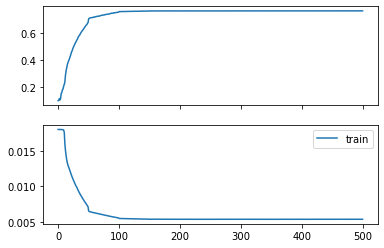

In [213]:
fig, ax = plt.subplots(2,sharex=True)

ax[0].plot(trajectories['train acc'], label='train')
# ax[0].plot(trajectories['val acc'], label='val')

ax[1].plot(trajectories['train loss'], label='train')
# ax[1].plot(trajectories['val loss'], label='val')

plt.legend()

In [6]:
(1600 + 400 + 1000)*12

36000

In [9]:
((462*4) + (3000))*12*30

1745280

In [10]:
2500*12*30

900000

In [11]:
25000/12.

2083.3333333333335

In [14]:
177.6*2

355.2